# **Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning**

#### 📌 Project Overview:
This project aims to enhance marketing campaign effectiveness through customer segmentation and personality analysis. By analyzing customer data including demographics, spending behavior, and engagement metrics, the company seek to develop targeted marketing strategies that improve campaign performance and customer satisfaction. Our task here as a data analyst work with cross-functional teams of marketing and sales department, where the Marketing team will use your segmentation to optimize campaigns and customer communication, while the Sales team can leverage your insights to personalize their approach to different customer types.

#### 📌 Problem Definitions:
1. Customer Segmentation: How can we group customers into meaningful segments based on their characteristics and behaviors?

2. Campaign Optimization: How can we tailor marketing campaigns to different customer segments to improve response rates and conversion?

<!-- (Optional) -->
<!-- 3. Customer Lifetime Value Prediction: Can we predict which customers are likely to be most valuable in the long term?
4. Churn Prevention: How can we identify customers at risk of churning and develop retention strategies?
5. Cross-selling Opportunities: Which products should we recommend to different customer segments? -->

#### 📌 Assumptions & Scope Limitations (based on extracted/provided dataset):
1. The data provided is accurate and representative of the customer base.

2. Past behavior (purchases, website visits, campaign responses) is indicative of future behavior.

3. Demographic factors (age, education, marital status) influence purchasing decisions.

4. Customer complaints within the last 2 years significantly impact their relationship with the company.

5. The recency of a customer's last purchase is related to their likelihood of future purchases.

6. Customers who engage more frequently (website visits, purchases) are more valuable to the company.

### Import Libraries and Settings

In [326]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


> For extracting packages requirements (run in project directory terminal)

    pipreqs .
    pipreqs . --force

    pip freeze > requirements.txt

## Load Dataset

In [327]:
df = pd.read_csv('marketing_campaign_data.csv', index_col=0)

# **Task 1 : Conversion Rate Analysis Based on Income, Spending and Age**

In stage 1, we are given the task to do conversion rate analysis based on Income, Spending and Age. We will continue to analyze all columns but at the end of task 1, we will be narrowed down to these features. Some suggested steps include:

- Perform Feature Engineering by calculating the conversion rate with the definition (#response / #visit). Not only conversion rate, but also find other representative features, such as age, number of children, total spending, total transactions, etc.

- Write down the Exploration Data Analysis (EDA) that you have done, starting from the plot you made to the interpretation analysis. Also write down the insights that can be used as recommendations (<u>as for the insights part will be done in the presentation part of task 1</u>).



## Data Understanding & Initial Transformation

In [328]:
df.sample(10)

ID  Year_Birth Education Marital_Status      Income  Kidhome  \
2075  10281        1970        S1          Cerai  64713000.0        1   
280    4669        1981       SMA        Menikah  24480000.0        1   
553    9460        1963        S1        Menikah  22419000.0        0   
1624   7019        1963        S1    Bertunangan  54414000.0        1   
1492   1763        1988        S1    Bertunangan  87679000.0        0   
1741   7610        1983        S1    Bertunangan  37292000.0        1   
311    2826        1967        S1        Menikah  22574000.0        2   
1100   5538        1975        S1          Cerai  83829000.0        0   
1309   6658        1972        S1    Bertunangan  59868000.0        0   
752    7094        1975        S1          Janda  58330000.0        0   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
2075         0  07-02-2014       11   180000      60000           241000   
280          0  11-02-2013       46     4000      19000             9000   
553          0  18-04-2013       74    30000       3000            47000   
1624         1  23-01-2013       49   109000      18000            16000   
1492         0  27-07-2013       62  1259000     172000           815000   
1741         0  18-04-2013       32   275000          0            86000   
311          1  28-10-2013       28    25000          0             8000   
1100         0  08-10-2013       78   897000     161000           430000   
1309         1  22-07-2013       37   771000      51000           154000   
752          1  25-12-2013       87   445000      53000           213000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2075            13000             54000         54000                  2   
280             28000             25000         17000                  3   
553             19000             21000         42000                  1   
1624            24000             26000         18000                  4   
1492            97000            148000         33000                  1   
1741            10000             23000         66000                  5   
311              2000                 0          2000                  2   
1100           186000            161000         27000                  0   
1309            54000             10000        154000                  7   
752            104000             98000        151000                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2075                5                    5                  7   
280                 3                    0                  4   
553                 3                    2                  2   
1624                3                    1                  5   
1492                7                   11                 10   
1741                6                    3                  5   
311                 2                    0                  3   
1100                4                    7                  6   
1309               11                    2                 12   
752                 6                    4                 13   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2075                  4             0             0             0   
280                   7             0             0             0   
553                   8             0             0             0   
1624                  4             0             0             0   
1492                  4             1             0             1   
1741                  8             0             0             0   
311                   7             0             0             0   
1100                  1             1             0             1   
1309                  6             0             0             0   
752                   4             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostConta

In [ ]:
# Checking shape of dataframe
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns {df.shape[1]}')

(2240, 29)

> The dataset have 2240 rows and 29 columns

In [330]:
# Checking basic data information
def check_data_information(df, cols):
    """
    This function provides detailed information about each column in a dataframe, including:
    - Data type of the column
    - Number of missing (null) values
    - Percentage of missing values
    - Total number of duplicated rows in the dataframe (not column-specific)
    - Number of unique values in the column
    - A sample of up to 5 unique values from the column

    Parameters:
    df (pd.DataFrame): The dataframe you want to check.
    cols (list): List of column names to check the information from.

    Returns:
    pd.DataFrame: A dataframe with detailed information for each column.
    """
    list_item = []
    for col in cols:
        list_item.append([col,                             # The column name
                          df[col].dtype,                   # The data type of the column
                          df[col].isna().sum(),            # The count of null values in the column
                          round(100 * df[col].isna().sum() / len(df[col]), 2),  # The percentage of null values
                          df.duplicated().sum(),           # The count of duplicated rows in the entire dataframe
                          df[col].nunique(),               # The count of unique values in the column
                          df[col].unique()[:5]])           # A sample of the first 5 unique values in the column

    desc_df = pd.DataFrame(data=list_item, columns='Feature, Data Type, Null Values, Null Percentage, Duplicated Values, Unique Values, Unique Sample'.split(","))
    return desc_df

columns_to_check = df.columns
check_data_information(df, columns_to_check)

Feature  Data Type   Null Values   Null Percentage  \
0                    ID      int64             0              0.00   
1            Year_Birth      int64             0              0.00   
2             Education     object             0              0.00   
3        Marital_Status     object             0              0.00   
4                Income    float64            24              1.07   
5               Kidhome      int64             0              0.00   
6              Teenhome      int64             0              0.00   
7           Dt_Customer     object             0              0.00   
8               Recency      int64             0              0.00   
9               MntCoke      int64             0              0.00   
10            MntFruits      int64             0              0.00   
11      MntMeatProducts      int64             0              0.00   
12      MntFishProducts      int64             0              0.00   
13     MntSweetProducts      int64             0              0.00   
14         MntGoldProds      int64             0              0.00   
15    NumDealsPurchases      int64             0              0.00   
16      NumWebPurchases      int64             0              0.00   
17  NumCatalogPurchases      int64             0              0.00   
18    NumStorePurchases      int64             0              0.00   
19    NumWebVisitsMonth      int64             0              0.00   
20         AcceptedCmp3      int64             0              0.00   
21         AcceptedCmp4      int64             0              0.00   
22         AcceptedCmp5      int64             0              0.00   
23         AcceptedCmp1      int64             0              0.00   
24         AcceptedCmp2      int64             0              0.00   
25             Complain      int64             0              0.00   
26        Z_CostContact      int64             0              0.00   
27            Z_Revenue      int64             0              0.00   
28             Response      int64             0              0.00   

     Duplicated Values   Unique Values  \
0                    0            2240   
1                    0              59   
2                    0               5   
3                    0               6   
4                    0            1974   
5                    0               3   
6                    0               3   
7                    0             663   
8                    0             100   
9                    0             776   
10                   0             158   
11                   0             558   
12                   0             182   
13                   0             177   
14                   0             213   
15                   0              15   
16                   0              15   
17                   0              14   
18                   0              14   
19                   0              16   
20                   0               2   
21                   0               2   
22                   0               2   
23                   0               2   
24                   0               2   
25                   0               2   
26                   0               1   
27                   0               1   
28                   0               2   

                                                   Unique Sample  
0                                 [5524, 2174, 4141, 6182, 5324]  
1                                 [1957, 1954, 1965, 1984, 1981]  
2                                          [S1, S3, S2, SMA, D3]  
3                   [Lajang, Bertunangan, Menikah, Cerai, Janda]  
4   [58138000.0, 46344000.0, 71613000.0, 26646000.0, 58293000.0]  
5                                                      [0, 1, 2]  
6                                                      [0, 1, 2]  
7   [04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014]  
8                                           [58, 38

**Feature Information**

| **Feature Name**       | **Description**                                                                  | **Data Type** | **Specific Data Type**   |
|------------------------|----------------------------------------------------------------------------------|----------------|-------------------------|
| `ID`                   | Unique identifier for each customer                                              | Categorical    | Nominal                 |
| `Year_Birth`           | Customer's year of birth                                                         | Numerical      | Discrete                |
| `Dt_Customer`          | Date of customer's registration with the company (joining date as a member)      | Datetime       | -                       |
| `Education`            | Customer's level of education                                                    | Categorical    | Ordinal                 |
| `Marital_Status`       | Customer's marital status                                                        | Categorical    | Nominal                 |
| `Kidhome`              | Number of small children in the customer's household                             | Numerical      | Discrete                |
| `Teenhome`             | Number of teenagers in the customer's household                                  | Numerical      | Discrete                |
| `Income`               | Customer's household income per year                                             | Numerical      | Continuous              |
| `MntFishProducts`      | Amount spent on fish products in the last 2 years                                | Numerical      | Continuous              |
| `MntMeatProducts`      | Amount spent on meat products in the last 2 years                                | Numerical      | Continuous              |
| `MntFruits`            | Amount spent on fruit products in the last 2 years                               | Numerical      | Continuous              |
| `MntSweetProducts`     | Amount spent on sweet products in the last 2 years                               | Numerical      | Continuous              |
| `MntCoke`              | Amount spent on coke products in the last 2 years                                | Numerical      | Continuous              |
| `MntGoldProds`         | Amount spent on gold products in the last 2 years                                | Numerical      | Continuous              |
| `NumDealsPurchases`    | Number of purchases made with a discount                                         | Numerical      | Discrete                |
| `NumCatalogPurchases`  | Number of purchases made using a catalog (buying items to be shipped via mail)   | Numerical      | Discrete                |
| `NumStorePurchases`    | Number of purchases made directly in stores                                      | Numerical      | Discrete                |
| `NumWebPurchases`      | Number of purchases made through the company's website                           | Numerical      | Discrete                |
| `AcceptedCmp1`         | Whether the customer acceppt the first campaign or not                           | Categorical    | Nominal                 |
| `AcceptedCmp2`         | Whether the customer acceppt the second campaign or not                          | Categorical    | Nominal                 |
| `AcceptedCmp3`         | Whether the customer acceppt the third campaign or not                           | Categorical    | Nominal                 |
| `AcceptedCmp4`         | Whether the customer acceppt the fourth campaign or not                          | Categorical    | Nominal                 |
| `AcceptedCmp5`         | Whether the customer acceppt the fifth campaign or not                           | Categorical    | Nominal                 |
| `Complain`             | 1 if the customer complained in the last 2 years                                 | Categorical    | Nominal                 |
| `Recency`              | Number of days since the customer's last purchase                                | Numerical      | Discrete                |
| `Response`             | 1 if the customer responded to the offer in the last campaign, 0 if not          | Categorical    | Nominal                 |

In [331]:
# Grouping columns based on data types (for column iteration later in EDA and others)
cats_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

nums_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

date_cols = ['Dt_Customer']

In [332]:
# # (Optional) Checking every unique values in categorical or numerical columns
# for col in cats_cols :
#     print()
#     print(f"{col} : {df[col].unique()}")

# for col in nums_cols :
#     print()
#     print(f"{col} : {df[col].unique()}")

Kinda curios about the `Response` column, it should be based on the last campaign (AcceptedCmp5) based on the definition, so we will just validate that first.

In [333]:
# Validate the value of `Response` column
response_validation = df[["AcceptedCmp5", "Response"]]
response_validation["Validate"] = response_validation.apply(lambda x: True if x["AcceptedCmp5"] == x["Response"] else False, axis=1)

print(f"Numebr of data : {len(df)}")
print(f"Number of correct hypothesis : {len(response_validation[response_validation['Validate'] == True])}")
response_validation

Numebr of data : 2240
Number of correct hypothesis : 1927


AcceptedCmp5  Response  Validate
0                0         1     False
1                0         0      True
2                0         0      True
3                0         0      True
4                0         0      True
...            ...       ...       ...
2235             0         0      True
2236             0         0      True
2237             0         0      True
2238             0         0      True
2239             0         1     False

[2240 rows x 3 columns]

Since it's not 100% true, so the definition of `Response` column is kinda confusing in this dataset, but we will move on for now. This problem could potentially arise from using the wrong logic in joining different dimension and fact tables.

Other than `Dt_Customer` that we will convert to datetime (currently string), every features have the correct data types.

In [334]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [335]:
# Change Dt_Customer to datetime type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')

`Income` column is the only column that have missing value and the percentage is small so we will handle it here rather than in the pre-processing step, we will do imputation based on the distribution.

<Axes: xlabel='Income', ylabel='Count'>

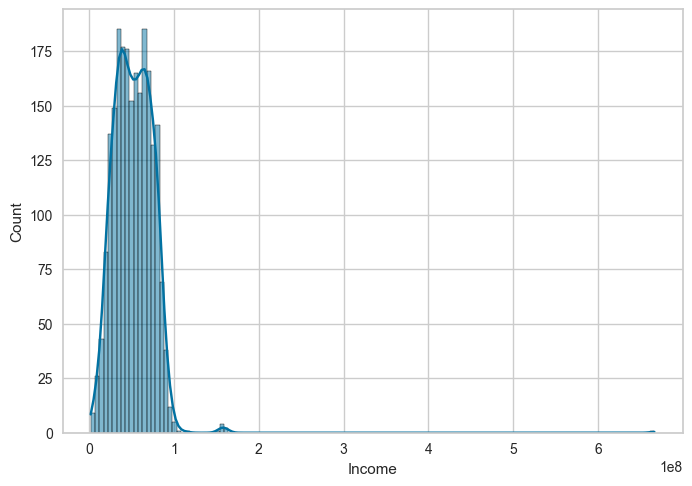

In [336]:
# Quick Check in income distribution for imputation method
sns.histplot(data=df, x='Income', kde=True)

Since the distribution is positive skewed then we will impute the missing values with median that is robust to outliers.

In [337]:
# Fill missing Income values with median 
df['Income'] = df['Income'].fillna(df['Income'].median())

## Handling Outliers

In [338]:
len(df[nums_cols].columns)

18

In [339]:
# Boxplot analysis
def plot_dynamic_boxplots(df, col_series, ncols=6, figsize=(26, 18), orientation='v'):
    """
    Plots a dynamic grid of boxplots for a list of numerical columns from a DataFrame with configurable orientation.
    
    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data to plot.
    cols : list of str
        List of column names to include in the boxplots.
    ncols : int, optional, default=6
        Number of columns in the subplot grid. Adjust this value to change grid width.
    figsize : tuple, optional, default=(26, 18)
        Size of the figure to control plot dimensions.
    orientation : str, optional, default='v'
        Orientation of the boxplots. Use 'v' for vertical and 'h' for horizontal.
    
    Returns:
    -------
    None
        Displays a grid of boxplots.
    
    Example:
    -------
    >>> plot_dynamic_boxplots(df=my_dataframe, col_series=['col1', 'col2', 'col3', ...], ncols=4, figsize=(20, 15), orientation='h')
    """
    
    # Calculate required number of rows based on number of plots and specified columns
    num_plots = len(col_series)
    nrows = math.ceil(num_plots / ncols)
    
    # Adjust figsize based on orientation
    if orientation == 'h':
        figsize = (figsize[1], figsize[0])  # Swap width and height for horizontal plots
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    ax = ax.flatten()  # Flatten the axes array for easy indexing

    # Generate boxplots for each column
    for i, col in enumerate(col_series):
        if orientation == 'v':
            sns.boxplot(data=df, ax=ax[i], y=col, orient='v')
            ax[i].set_title(f'Boxplot of {col}')
        else:  # orientation == 'h'
            sns.boxplot(data=df, ax=ax[i], x=col, orient='h')
            ax[i].set_title(f'Boxplot of {col}')

    # Remove any unused subplots if total subplots exceed columns in cols
    for j in range(num_plots, len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

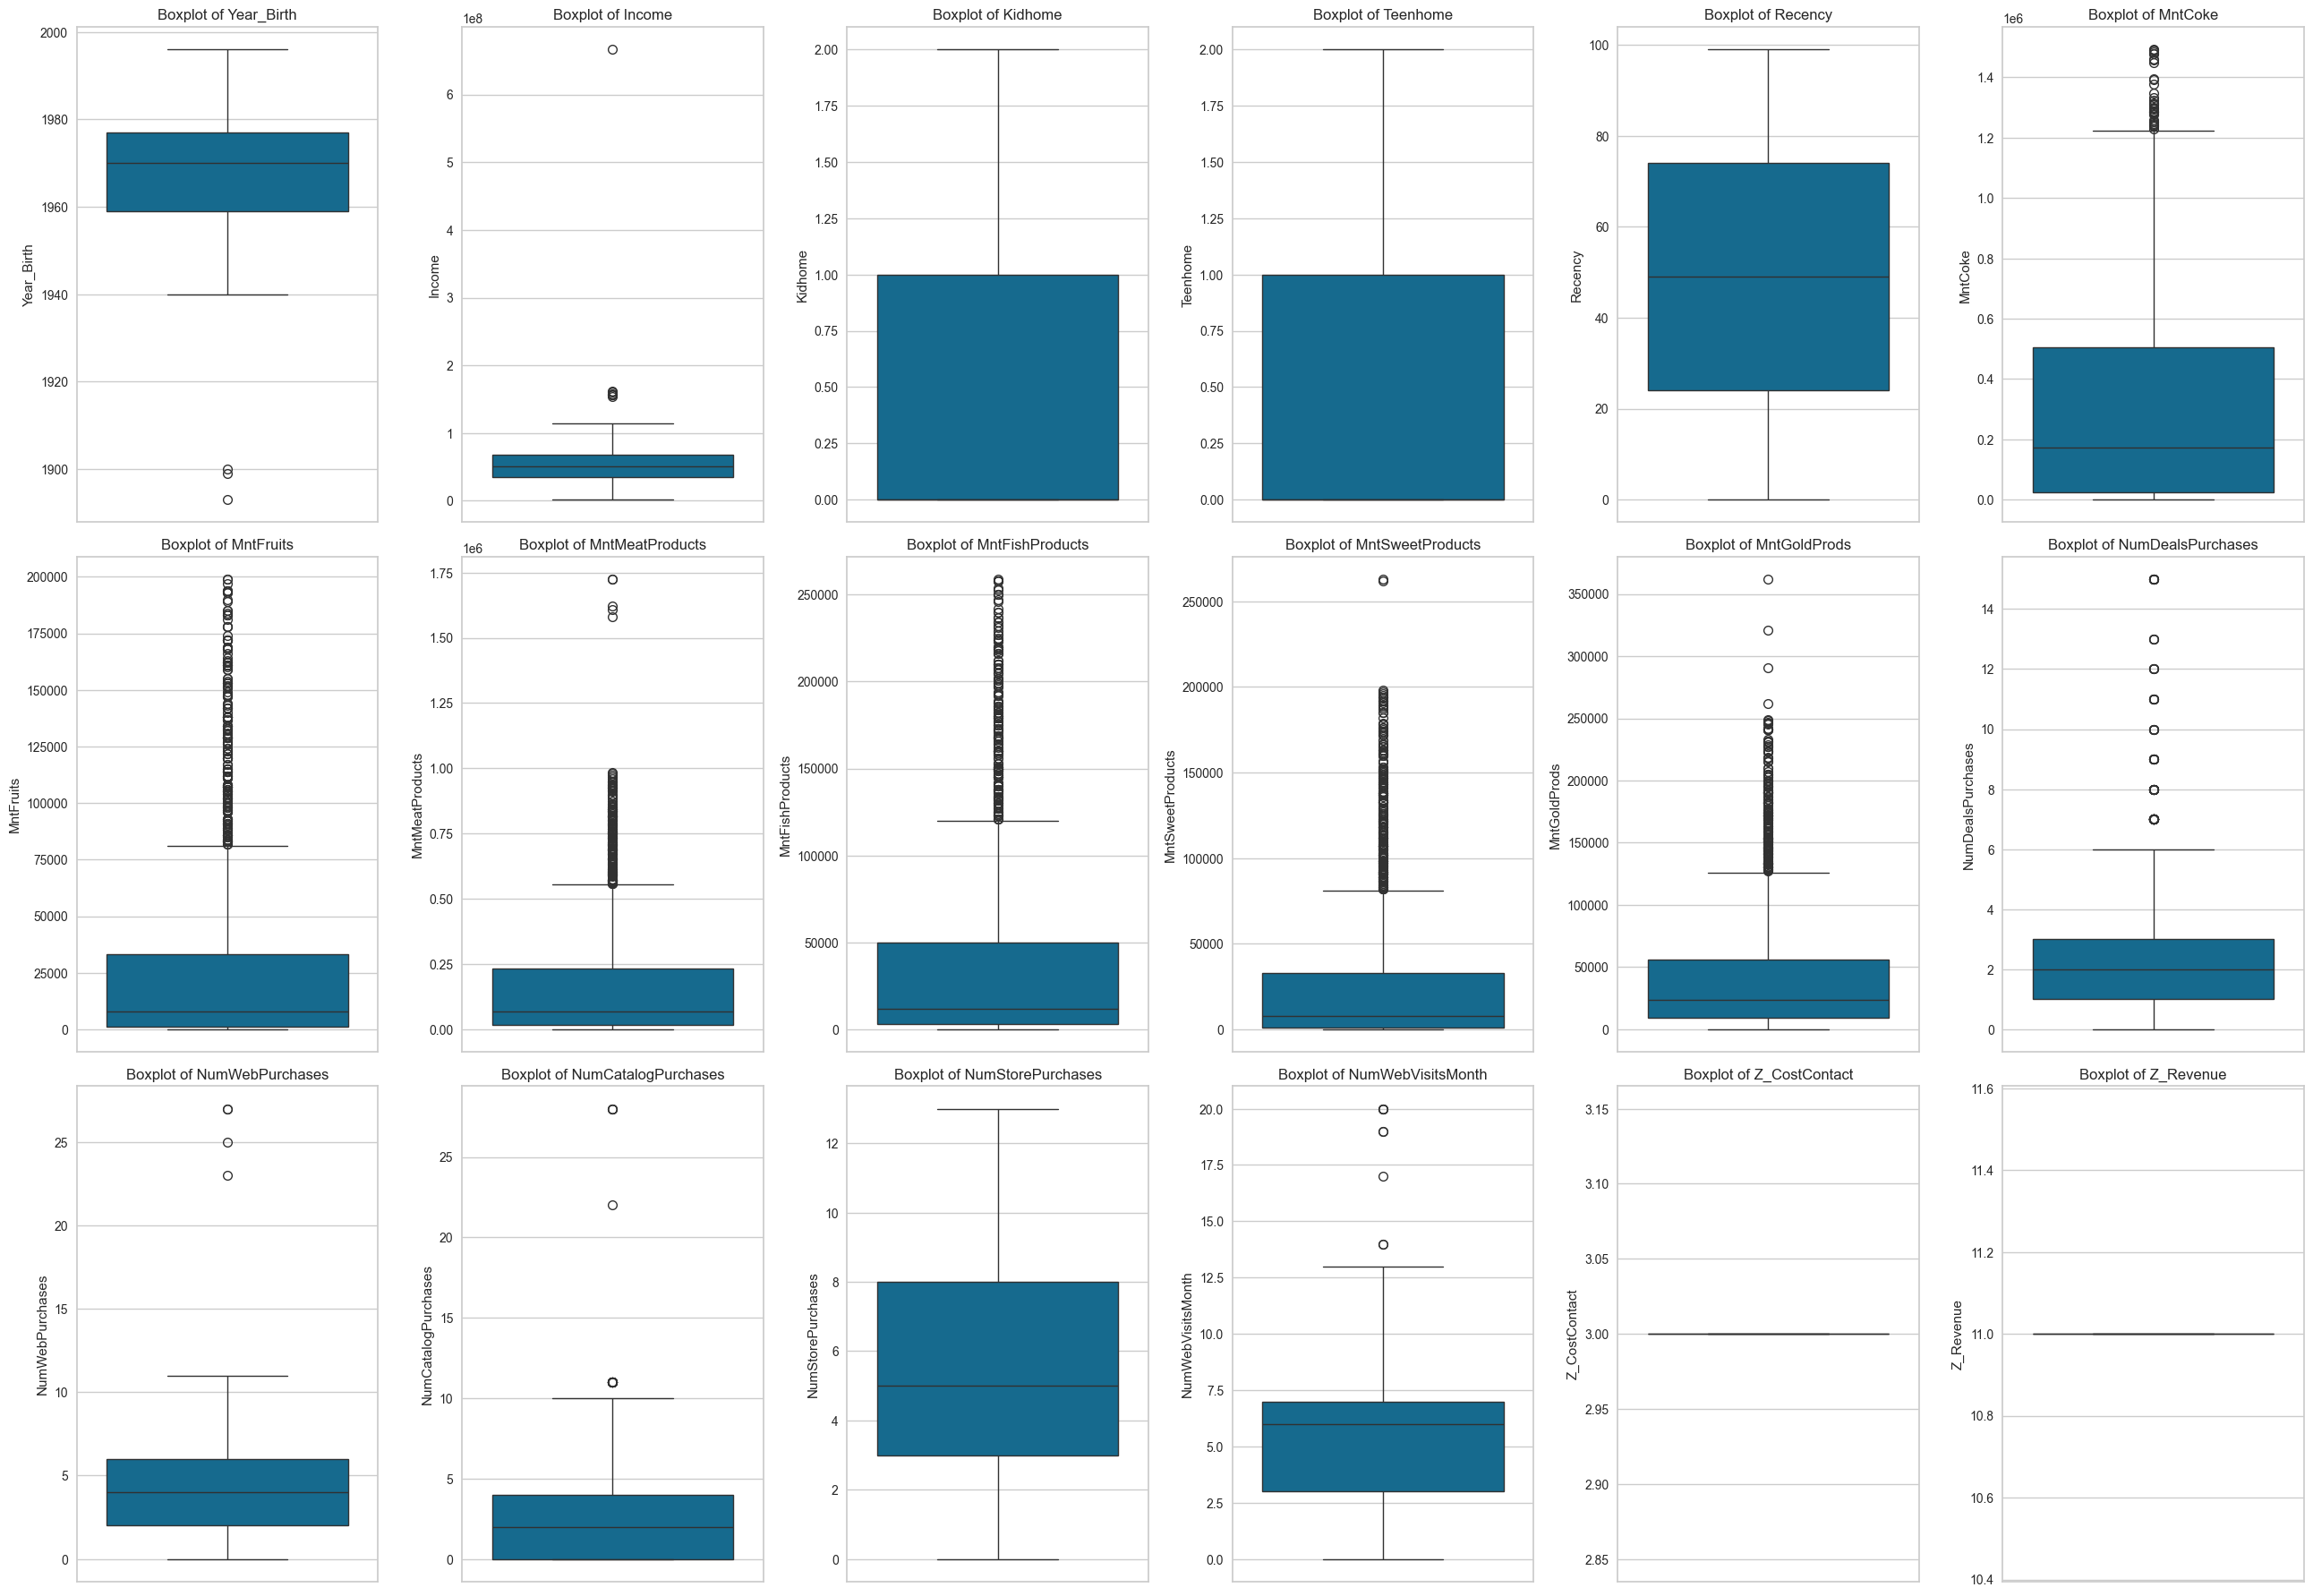

In [340]:
# Boxplot function implementation
plot_dynamic_boxplots(df, col_series=nums_cols, ncols=6, figsize=(26, 18), orientation='v')

In [341]:
# Detect outliers in dataframe using IQR method
def outlier_detection(df, col_series):
    """
    Function to detect outliers in a dataframe using the IQR method.
    
    Parameters:
    df : pd.DataFrame 
        The dataframe containing the data.
    col_series : list of str
        List of column names to include in the analysis.
    
    Returns:
    pd.DataFrame: A summary dataframe showing the number of outliers and non-outliers 
                  for each numeric column, along with the IQR bounds and outlier percentage.
    """
    print(f'Amount of Rows: {len(df)}')
    
    outlier = []  # Store the number of outlier rows per column
    no_outlier = []  # Store the number of non-outlier rows per column
    is_outlier = []  # Boolean indicating whether any outliers exist in the column
    low_bound = []  # Lower bound for outliers (Q1 - 1.5 * IQR)
    high_bound = []  # Upper bound for outliers (Q3 + 1.5 * IQR)
    outlier_percentage = []  # Percentage of outliers for each column

    # Start with all rows marked as True (non-outliers) in the cumulative filter
    filtered_entries = np.array([True] * len(df))

    for col in col_series:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (IQR * 1.5)
        upper_bound = Q3 + (IQR * 1.5)

        # Create a filter that identifies non-outliers for the current column
        filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

        # Append the statistics and filter results
        outlier_count = len(df[~filter_outlier])  # Count of outliers
        non_outlier_count = len(df[filter_outlier])  # Count of non-outliers
        outlier_percentage.append(round((outlier_count / len(df)) * 100, 2))  # Percentage of outliers
        outlier.append(outlier_count)
        no_outlier.append(non_outlier_count)
        is_outlier.append(df[col][~filter_outlier].any())  # Whether any outliers exist
        low_bound.append(lower_bound)  # Lower IQR bound
        high_bound.append(upper_bound)  # Upper IQR bound

        # Update the cumulative filter to only include rows that are non-outliers across all columns
        filtered_entries = filtered_entries & filter_outlier

    # Final printout of cumulative outlier statistics across all columns
    print(f'Amount of Outlier Rows (Across All Columns): {len(df[~filtered_entries])}')
    print(f'Amount of Non-Outlier Rows (Across All Columns): {len(df[filtered_entries])}')
    print(f'Percentage of Outliers: {round(len(df[~filtered_entries]) / len(df) * 100, 2)}%')
    print()

    # Create a summary dataframe
    check_outliers = pd.DataFrame({
        'Column Name': col_series,
        'Outlier Exist': is_outlier,
        'Lower Limit': low_bound,
        'Upper Limit': high_bound,
        'Outlier Data': outlier,
        'Non-Outlier Data': no_outlier,
        'Outlier Percentage (%)': outlier_percentage
    })

    return check_outliers

In [342]:
# Outliers cheking with IQR method function implementation
outlier_summary = outlier_detection(df, col_series=nums_cols)
outlier_summary

Amount of Rows: 2240
Amount of Outlier Rows (Across All Columns): 706
Amount of Non-Outlier Rows (Across All Columns): 1534
Percentage of Outliers: 31.52%



Column Name  Outlier Exist  Lower Limit  Upper Limit  \
0            Year_Birth           True       1932.0       2004.0   
1                Income           True  -13587750.0  117416250.0   
2               Kidhome          False         -1.5          2.5   
3              Teenhome          False         -1.5          2.5   
4               Recency          False        -51.0        149.0   
5               MntCoke           True    -697000.0    1225000.0   
6             MntFruits           True     -47000.0      81000.0   
7       MntMeatProducts           True    -308000.0     556000.0   
8       MntFishProducts           True     -67500.0     120500.0   
9      MntSweetProducts           True     -47000.0      81000.0   
10         MntGoldProds           True     -61500.0     126500.0   
11    NumDealsPurchases           True         -2.0          6.0   
12      NumWebPurchases           True         -4.0         12.0   
13  NumCatalogPurchases           True         -6.0         10.0   
14    NumStorePurchases          False         -4.5         15.5   
15    NumWebVisitsMonth           True         -3.0         13.0   
16        Z_CostContact          False          3.0          3.0   
17            Z_Revenue          False         11.0         11.0   

    Outlier Data  Non-Outlier Data  Outlier Percentage (%)  
0              3              2237                    0.13  
1              8              2232                    0.36  
2              0              2240                    0.00  
3              0              2240                    0.00  
4              0              2240                    0.00  
5             35              2205                    1.56  
6            227              2013                   10.13  
7            175              2065                    7.81  
8            223              2017                    9.96  
9            248              1992                   11.07  
10           207              2033                    9.24  
11            86              2154                    3.84  
12             4              2236                    0.18  
13            23              2217                    1.03  
14             0              2240                    0.00  
15             8              2232                    0.36  
16             0              2240                    0.00  
17             0              2240                    0.00

**Major Findings:**

There are outliers in the following columns: Year_Birth, Income, MntCoke, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, and NumWebVisitMonth.

- In the `Year_Birth` column, outliers are below 1932.
- In the `Income` column, outliers are above 117M.
- In the `MntCoke` column, outliers are above 1.2M.
- In the `MntFruits` column, outliers are around 81k.
- In the `MntMeatProducts` column, the farthest outlier is around 1.75M.
- In the `MntFishProducts` column, outliers are around 125k to above 250k.
- In the `MntSweetProducts` column, the farthest outlier is around 250k.
- In the `MntGoldProds` column, the farthest outlier is around 350k.
- In the `NumDealsPurchases` column, the farthest outlier is at 15.
- In the `NumWebPurchases` column, outliers are around 25.
- In the `NumCatalogPurchases` column, the farthest outlier is above 25.
- In the `NumWebVisitsMonth` column, the farthest outlier is at 20.

**Steps to be taken in this initial data pre-Processing:**
- Apply `log transformation` for feature scaling and handling outliers, as this transformation minimizes outliers and potentially helps to obtain a bell-shaped/normal distribution. This choice is maybe appropriate due to the limited data available that is only 2240 rows, and it avoids the need to delete data points.

- Alternatively, cleaning the data by removing outliers based on IQR or Z-score, but it will reduce the amount of available data.

In this case, since we want to keep the data as it is because transforming the whole values in many columns will result in changing the conclusion of our data, so the choice will be removing outliers with Z-score method **but not in all of the columns**, only several columns that have really extreme outliers like `Year_Birth`, `Income`, `MntMeatProducts`, `MntSweetProducts`, `NumWebPurchases`, `NumCatalogPurchases`.

In [343]:
# Handling the outliers in dataframe using IQR method
def outlier_handling(df, col_series):
    """
    Function to remove outliers from specific columns of a dataframe using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    col_series (list): List of column names to remove outliers from.
    
    Returns:
    pd.DataFrame: A new dataframe with outliers removed for the specified columns.
    """
    print(f'Rows before removing outliers: {len(df)}')

    # Start with all rows marked as True (non-outliers)
    filtered_entries = np.array([True] * len(df))
    
    # Loop through each column and apply IQR outlier detection
    for col in col_series:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - (IQR * 1.5)  # Lower bound for outliers
        upper_bound = Q3 + (IQR * 1.5)  # Upper bound for outliers

        # Create a filter that identifies non-outliers for the current column
        filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

        # Update the filter to exclude rows that have outliers in the current column
        filtered_entries = filtered_entries & filter_outlier

    # Create a new dataframe by applying the cumulative filter
    df_filtered_outliers = df[filtered_entries]

    print(f'Rows after removing outliers: {len(df_filtered_outliers)}')
    
    return df_filtered_outliers

In [344]:
# Outliers handling with IQR method function implementation
columns_to_filter = ['Year_Birth', 'Income', 'MntMeatProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases']
df_filtered_outliers = outlier_handling(df, col_series=columns_to_filter)
df_filtered_outliers

Rows before removing outliers: 2240
Rows after removing outliers: 1861


ID  Year_Birth Education Marital_Status      Income  Kidhome  \
1     2174        1954        S1         Lajang  46344000.0        1   
2     4141        1965        S1    Bertunangan  71613000.0        0   
3     6182        1984        S1    Bertunangan  26646000.0        1   
4     5324        1981        S3        Menikah  58293000.0        1   
5     7446        1967        S2    Bertunangan  62513000.0        0   
...    ...         ...       ...            ...         ...      ...   
2234  8372        1974        S1        Menikah  34421000.0        1   
2236  4001        1946        S3    Bertunangan  64014000.0        2   
2237  7270        1981        S1          Cerai  56981000.0        0   
2238  8235        1956        S2    Bertunangan  69245000.0        0   
2239  9405        1954        S3        Menikah  52869000.0        1   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
1            1  2014-03-08       38    11000       1000             6000   
2            0  2013-08-21       26   426000      49000           127000   
3            0  2014-02-10       26    11000       4000            20000   
4            0  2014-01-19       94   173000      43000           118000   
5            1  2013-09-09       16   520000      42000            98000   
...        ...         ...      ...      ...        ...              ...   
2234         0  2013-07-01       81     3000       3000             7000   
2236         1  2014-06-10       56   406000          0            30000   
2237         0  2014-01-25       91   908000      48000           217000   
2238         1  2014-01-24        8   428000      30000           214000   
2239         1  2012-10-15       40    84000       3000            61000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1                2000              1000          6000                  2   
2              111000             21000         42000                  1   
3               10000              3000          5000                  2   
4               46000             27000         15000                  5   
5                   0             42000         14000                  2   
...               ...               ...           ...                ...   
2234             6000              2000          9000                  1   
2236                0                 0          8000                  7   
2237            32000             12000         24000                  1   
2238            80000             30000         61000                  2   
2239             2000              1000         21000                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
5                   6                    4                 10   
...               ...                  ...                ...   
2234                1                    0                  2   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
5                     6             0             0             0   
...                 ...           ...           ...           ...   
2234                  7             0             0  

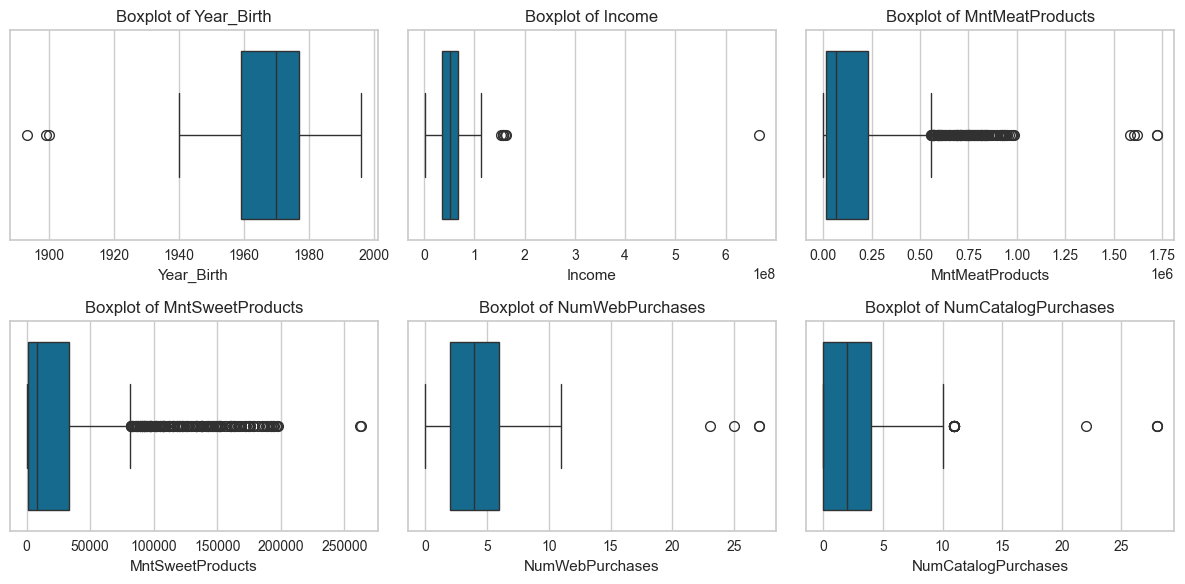

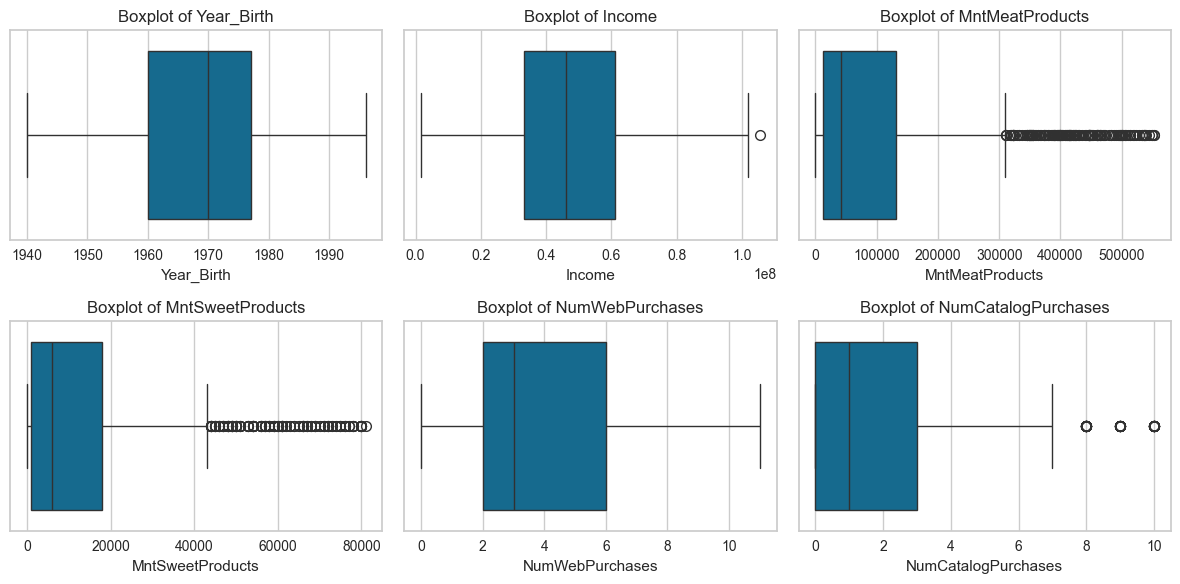

In [345]:
# Check data after filtered
plot_dynamic_boxplots(df=df, col_series=columns_to_filter, ncols=3, figsize=(6,12), orientation='h')
plot_dynamic_boxplots(df=df_filtered_outliers, col_series=columns_to_filter, ncols=3, figsize=(6,12), orientation='h')

The extreme range of the data has been filtered which can be seen from the change in value range of the plot.

## Feature Engineering

### Age Column

The `Age` column is created by calculating the age of each customer based on their birth year and current time. But since we don't really have the year information in the data for this purpose, so we will just use the year now

In [346]:
# Age feature engineering
from datetime import datetime
year_data = datetime.now().year

df_filtered_outliers['Age'] = year_data - df_filtered_outliers['Year_Birth']

### Age Group Column

The `Age_Group` column is created by grouping the `age` column. But first we need check the distribution of age to help with the grouping range.

<Axes: xlabel='Age', ylabel='Count'>

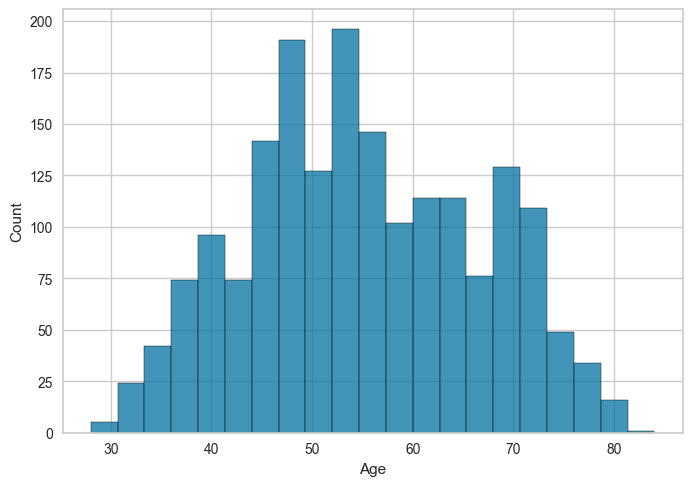

In [347]:
sns.histplot(data=df_filtered_outliers, x='Age')

In [348]:
# Age grouping
def age_group(x):
    if x >= 60:
        return 'Senior Adult'
    elif x >= 40:
        return 'Middle Adult'
    else:
        return 'Young Adult'

df_filtered_outliers['Age_Group'] = df_filtered_outliers['Age'].apply(age_group)

In [349]:
df_filtered_outliers['Age_Group'].value_counts()

Age_Group
Middle Adult    1045
Senior Adult     642
Young Adult      174
Name: count, dtype: int64

### Num_Child Column

The `Num_Child` column is created by summing the values of Kidhome and Teenhome, representing the total number of dependents or children a customer has.

In [350]:
df_filtered_outliers['Num_Child'] = df_filtered_outliers['Kidhome'] + df_filtered_outliers['Teenhome']

In [351]:
df_filtered_outliers['Num_Child'].value_counts()

Num_Child
1    1037
2     410
0     362
3      52
Name: count, dtype: int64

### Membership_Duration Column

The `Membership_Duration` column represents duration of customer membership in year.

In [352]:
df_filtered_outliers['Membership_Duration'] = year_data - df_filtered_outliers['Dt_Customer'].dt.year

In [353]:
df_filtered_outliers['Membership_Duration'].value_counts()

Membership_Duration
11    989
10    475
12    397
Name: count, dtype: int64

### Total_Acc_Camp Column

The `Total_Acc_Camp` column represents the total number of times each customer responded to the 5 campaigns that were conducted (AcceptedCmp 1 - 5).

In [354]:
df_filtered_outliers['Total_Acc_Camp'] = df_filtered_outliers.loc[:, ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']] \
                                                             .sum(axis=1) \
                                                             .astype('int64')

# df_filtered_outliers['Total_Acc_Camp'] = df_filtered_outliers.filter(like='AcceptedCmp').sum(axis=1).astype("int64")

In [355]:
df_filtered_outliers['Total_Acc_Camp'].value_counts()

Total_Acc_Camp
0    1539
1     245
2      55
3      15
4       7
Name: count, dtype: int64

### Total_Spending Column

The `Total_Spending` column represents the total purchase amount of each customer across all products.

In [356]:
df_filtered_outliers['Total_Spending'] = df_filtered_outliers.loc[:, ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']] \
                                                             .sum(axis=1) \
                                                             .astype('int64')

### Total_Purchases Column

The `Total_Purchases` column represents the total purchase amount of each customer across all types of transactions.

In [357]:
df_filtered_outliers['Total_Purchases'] = df_filtered_outliers.loc[:, ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']] \
                                                              .sum(axis=1) \
                                                              .astype('int64')

### CVR (Conversion Rate) Column

The `CVR` column is calculated as the ratio of `Total Purchases` to the `Number of Web Visits` for each customer. It represents the percentage of website visitors who made purchases.

In [358]:
df_filtered_outliers['CVR'] = np.round(df_filtered_outliers['Total_Purchases'] / df_filtered_outliers['NumWebVisitsMonth'], 2)
df_filtered_outliers['CVR'].fillna(0, inplace=True)
df_filtered_outliers['CVR'].replace([np.inf, -np.inf], 0, inplace=True)

#### Additional Information related to Calculation of CVR

- **CVR (Conversion Rate)**: This metric is a key performance indicator in marketing and e-commerce that measures the effectiveness of a campaign or a website in converting visitors into customers. It indicates the percentage of visitors who complete a desired action (e.g., making a purchase).
  
The Conversion Rate (CVR) is calculated as:

$$
\text{CVR} = \left(\frac{\text{Number of Conversions}}{\text{Total Visitors}}\right) \times 100
$$

#### Interpretation
- A higher CVR indicates that a larger percentage of visitors are converting, which is typically a positive sign for marketing effectiveness.
- Conversely, a low CVR might suggest issues with the website's usability, targeting, or product appeal.

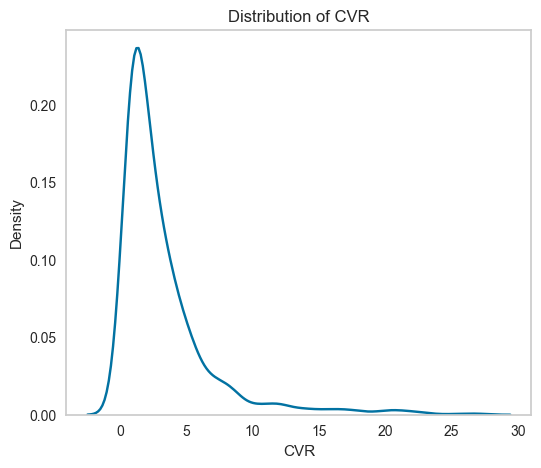

In [359]:
# Plot the CVR distribution
plt.figure(figsize=(6, 5))
sns.kdeplot(data=df_filtered_outliers, x='CVR')
plt.title("Distribution of CVR")
plt.grid()
plt.show()

# Further Exploratory Data Analysis (EDA)

> Usually this step is done first and the original data is kept still raw. But since for the task 1 requirement steps for answering the main question related to CVR, then only for this case we applied some data processing steps (handling outliers and feature engineering) in the beginning.

## Statistical Summary

In [360]:
df_filtered_outliers.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Age_Group', 'Num_Child', 'Membership_Duration',
       'Total_Acc_Camp', 'Total_Spending', 'Total_Purchases', 'CVR'],
      dtype='object')

In [361]:
# Grouping columns based on data types with new featured engineered columns
new_nums_cols = ['Age', 'Num_Child', 'Total_Acc_Camp', 'Total_Spending', 'Total_Purchases', 'CVR']
new_cats_cols = ['Age_Group']

# Important numerical columns grouping that we will use most of the time
desc_cols = ['Income', 'Recency', 'Membership_Duration', 'Age', 'Num_Child', 'Total_Acc_Camp', 'Total_Spending', 'Total_Purchases', 'CVR']

# Additional columns grouping only for easily visible comparison
product_spending_cols = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
purchase_type_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

In [362]:
# Product spending statistics
desc_stats_spending = df_filtered_outliers[product_spending_cols + ['Total_Spending']].describe().transpose()
sum_stats_spending = pd.DataFrame(df_filtered_outliers[product_spending_cols + ['Total_Spending']].sum().rename('sum'))

# Combine the descriptive statistics and the sum into one DataFrame
combined_stats = pd.concat([desc_stats_spending, sum_stats_spending], axis=1)
combined_stats

count           mean            std     min      25%  \
MntCoke           1861.0  250929.607738  315826.131031     0.0  18000.0   
MntFruits         1861.0   17241.805481   29502.972217     0.0   1000.0   
MntMeatProducts   1861.0   97452.982268  124804.873802     0.0  13000.0   
MntFishProducts   1861.0   25399.247716   42295.989533     0.0   2000.0   
MntSweetProducts  1861.0   13378.291241   18221.128038     0.0   1000.0   
MntGoldProds      1861.0   36454.594304   45760.957987     0.0   7000.0   
Total_Spending    1861.0  440856.528748  477667.786596  5000.0  57000.0   

                       50%       75%        max        sum  
MntCoke           100000.0  390000.0  1493000.0  466980000  
MntFruits           5000.0   19000.0   199000.0   32087000  
MntMeatProducts    42000.0  132000.0   553000.0  181360000  
MntFishProducts     8000.0   28000.0   258000.0   47268000  
MntSweetProducts    6000.0   18000.0    81000.0   24897000  
MntGoldProds       19000.0   43000.0   262000.0   67842000  
Total_Spending    231000.0  734000.0  2231000.0  820434000

In [363]:
# Purchase type statistics
desc_stats_purchase = df_filtered_outliers[purchase_type_cols + ['Total_Purchases']].describe().transpose()
sum_stats_purchase = df_filtered_outliers[purchase_type_cols + ['Total_Purchases']].sum().rename('sum')

# Combine the descriptive statistics and the sum into one DataFrame
combined_stats = pd.concat([desc_stats_purchase, sum_stats_purchase], axis=1)
combined_stats

count       mean       std  min  25%   50%   75%   max  \
NumDealsPurchases    1861.0   2.465879  1.865228  0.0  1.0   2.0   3.0  15.0   
NumWebPurchases      1861.0   3.787211  2.619379  0.0  2.0   3.0   6.0  11.0   
NumCatalogPurchases  1861.0   2.002687  2.328527  0.0  0.0   1.0   3.0  10.0   
NumStorePurchases    1861.0   5.309511  3.066794  0.0  3.0   4.0   7.0  13.0   
Total_Purchases      1861.0  13.565287  7.418566  0.0  7.0  12.0  20.0  35.0   

                       sum  
NumDealsPurchases     4589  
NumWebPurchases       7048  
NumCatalogPurchases   3727  
NumStorePurchases     9881  
Total_Purchases      25245

In [364]:
# Important metric column statistics
df_filtered_outliers[desc_cols].describe().transpose()

count          mean           std        min  \
Income               1861.0  4.699597e+07  1.856569e+07  1730000.0   
Recency              1861.0  4.867544e+01  2.893846e+01        0.0   
Membership_Duration  1861.0  1.095809e+01  6.834176e-01       10.0   
Age                  1861.0  5.500430e+01  1.146692e+01       28.0   
Num_Child            1861.0  1.081677e+00  7.212538e-01        0.0   
Total_Acc_Camp       1861.0  2.299839e-01  5.743472e-01        0.0   
Total_Spending       1861.0  4.408565e+05  4.776678e+05     5000.0   
Total_Purchases      1861.0  1.356529e+01  7.418566e+00        0.0   
CVR                  1861.0  3.285562e+00  3.657562e+00        0.0   

                             25%         50%         75%          max  
Income               33178000.00  46102000.0  61209000.0  105471000.0  
Recency                    24.00        49.0        74.0         99.0  
Membership_Duration        10.00        11.0        11.0         12.0  
Age                        47.00        54.0        64.0         84.0  
Num_Child                   1.00         1.0         1.0          3.0  
Total_Acc_Camp              0.00         0.0         0.0          4.0  
Total_Spending          57000.00    231000.0    734000.0    2231000.0  
Total_Purchases             7.00        12.0        20.0         35.0  
CVR                         1.12         2.0         4.0         27.0

**Major Findings:**

- The majority of customers have an income of Rp46,999,597 per year.
- Most customers will shop again approximately 1.5 months after their last purchase.
- The majority of customers have been members for 11 years.
- Most customers have only one child.
- The majority of customers make 12 purchase transactions, with the highest number through Store Purchase.
- Most customers spend Rp.231,000, with the highest spending on Coke.
- The majority of customers did not receive the campaign.
- The conversion rate from web visits to purchases for the majority of customers is only 2.0%.

In [365]:
# Categorical column statistics
df_filtered_outliers[cats_cols + new_cats_cols].describe(exclude='int64').transpose()

count unique           top  freq
Education       1861      5            S1   914
Marital_Status  1861      6       Menikah   725
Age_Group       1861      3  Middle Adult  1045

In [366]:
# Datetime column statistics
df_filtered_outliers[date_cols].describe().transpose()

count                           mean                  min  \
Dt_Customer  1861  2013-07-15 00:58:48.425577728  2012-07-30 00:00:00   

                             25%                  50%                  75%  \
Dt_Customer  2013-01-22 00:00:00  2013-07-17 00:00:00  2014-01-05 00:00:00   

                             max  
Dt_Customer  2014-06-29 00:00:00

## Univariate Analysis

In [367]:
len(desc_cols)

9

### Numerical Columns

In [368]:
# Hisplot and kdeplot analysis
def plot_dynamic_hisplots_kdeplots(df, col_series, plot_type='histplot', ncols=6, figsize=(26, 18)):
    """
    Plots a dynamic grid of either histplots with kde or kdeplots for a list of numerical columns from a DataFrame.
    
    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data to plot.
    col_series : list of str
        List of column names to include in the plots.
    plot_type : str, optional, default='histplot'
        Type of plot to generate. Options are 'histplot' or 'kdeplot'.
    ncols : int, optional, default=6
        Number of columns in the subplot grid. Adjust this value to change grid width.
    figsize : tuple, optional, default=(26, 18)
        Size of the figure to control plot dimensions.
    
    Returns:
    -------
    None
        Displays a grid of plots.
    
    Example:
    -------
    >>> plot_dynamic_distributions(df=my_dataframe, col_series=['col1', 'col2', 'col3'], plot_type='kdeplot', ncols=4)
    """
    
    # Validate plot_type parameter
    if plot_type not in ['histplot', 'kdeplot']:
        raise ValueError("plot_type must be either 'histplot' or 'kdeplot'")
    
    # Calculate required number of rows based on number of plots and specified columns
    num_plots = len(col_series)
    nrows = math.ceil(num_plots / ncols)
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    ax = ax.flatten()  # Flatten the axes array for easy indexing

    # Generate plots for each column
    for i, col in enumerate(col_series):
        if plot_type == 'histplot':
            sns.histplot(data=df, ax=ax[i], x=col, kde=True)
        else:  # kdeplot
            sns.kdeplot(data=df, ax=ax[i], x=col)
            
        ax[i].set_title(f'Distribution of {col}')
        ax[i].set_ylabel(f'{"Count and Density" if plot_type == "histplot" else "Density"} of {col}')
        ax[i].set_xlabel(f'{col}')

    # Remove any unused subplots if total subplots exceed columns in cols
    for j in range(num_plots, len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

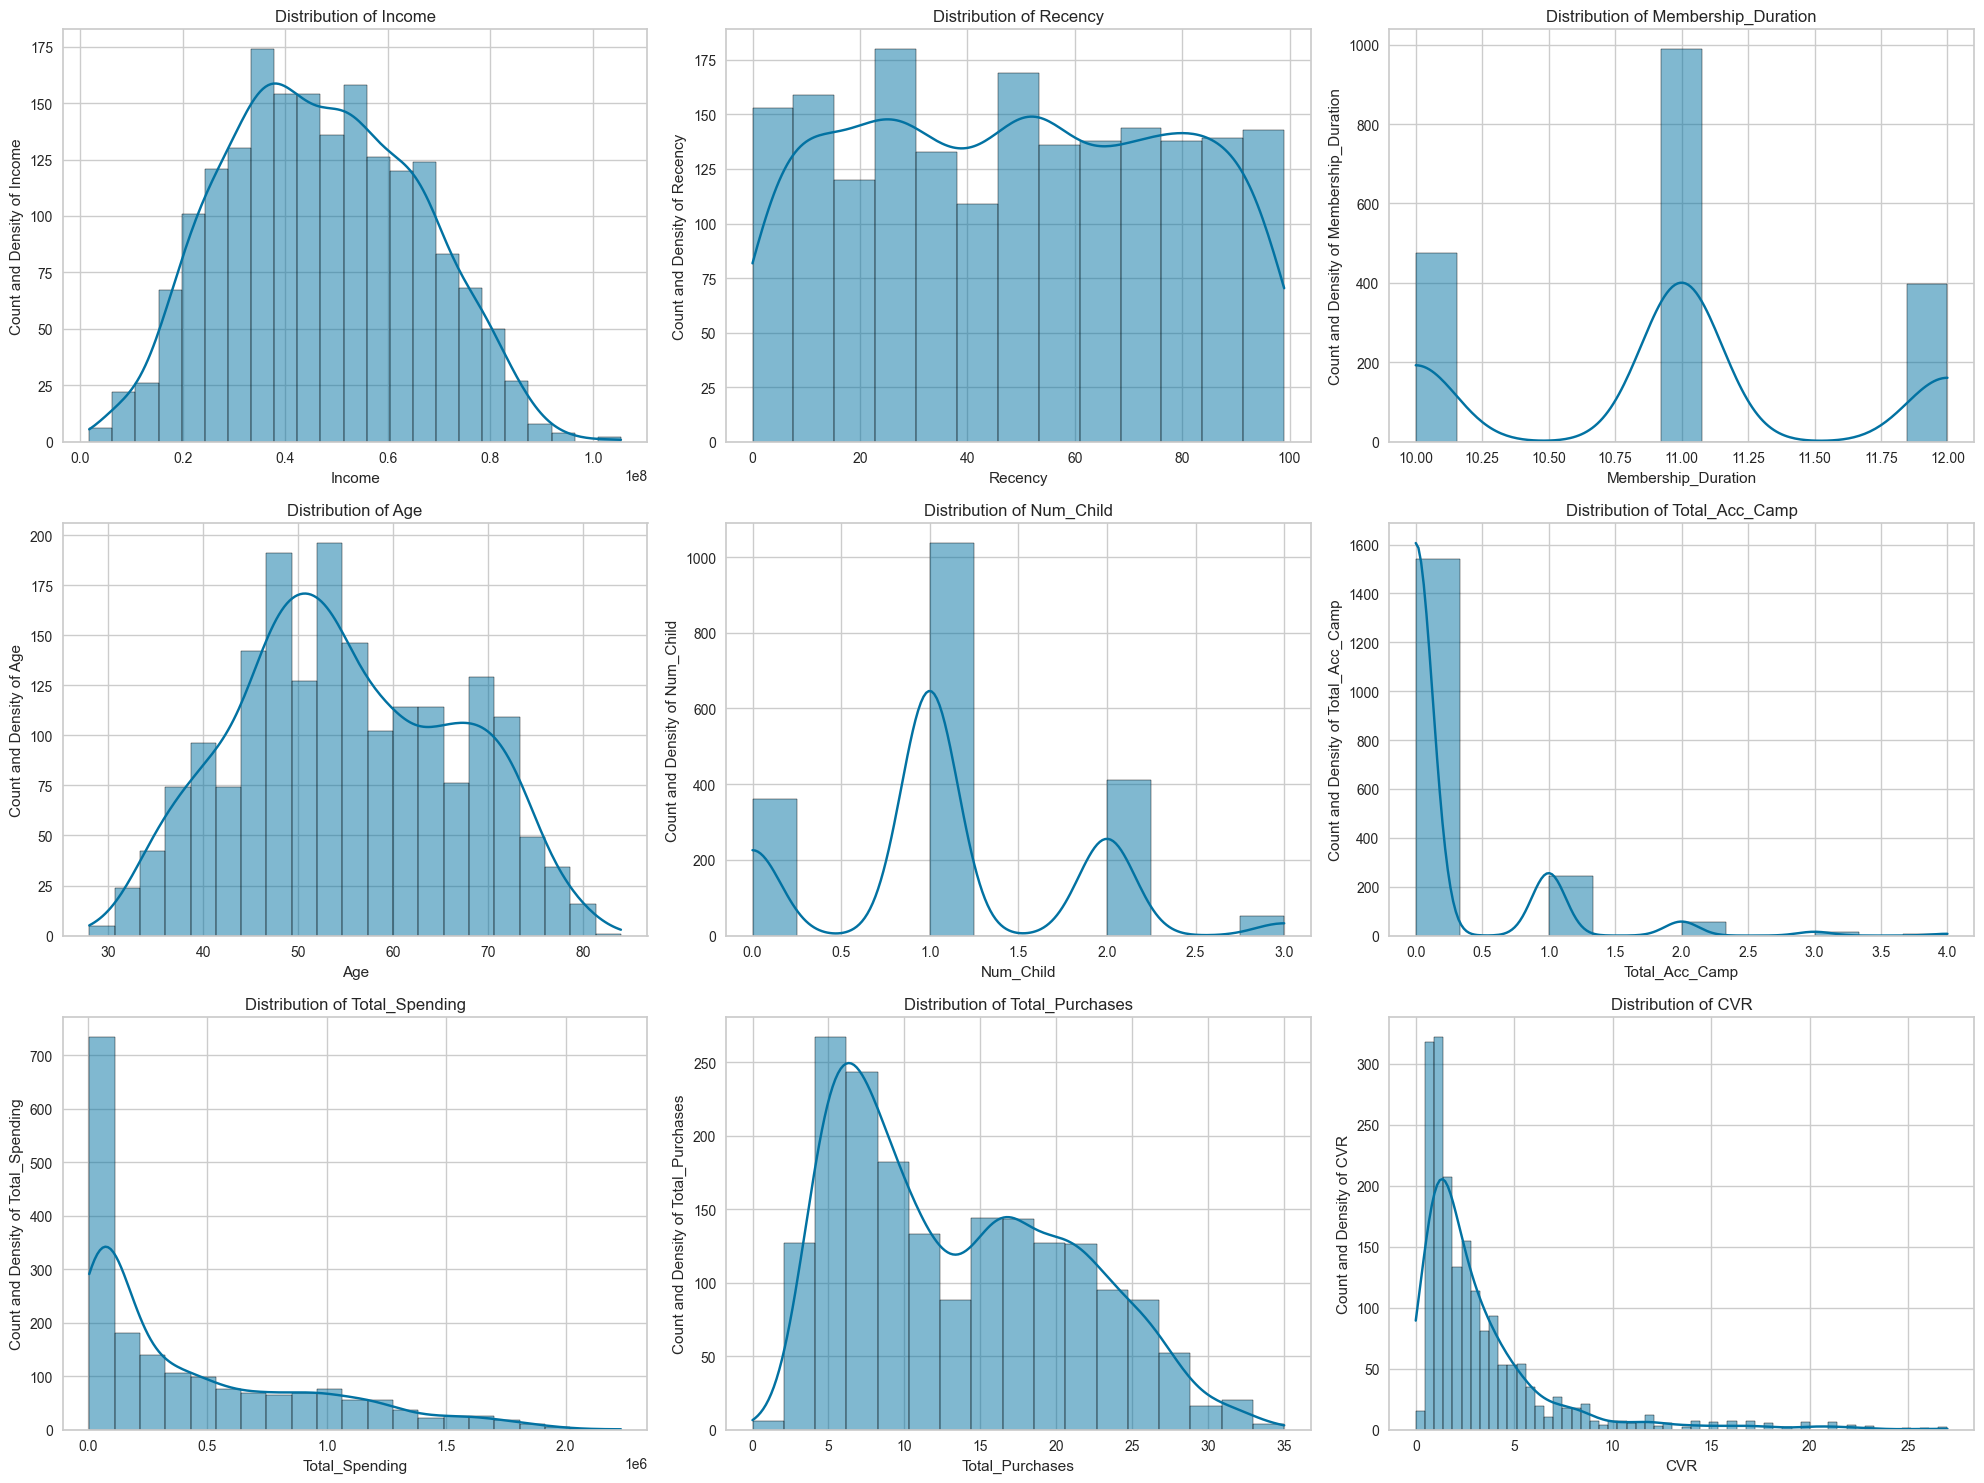

In [369]:
# Hisplot function implementation
plot_dynamic_hisplots_kdeplots(df=df_filtered_outliers, col_series=desc_cols, ncols=3, figsize=(20, 15))

In [370]:
from scipy.stats import skew, kurtosis

def identify_distribution_types(df, col_series, uniform_cols=None, multimodal_cols=None):
    """
    Identifies and categorizes the distribution type of each numerical column in the DataFrame based on skewness and kurtosis.
    Allows manual specification of columns suspected to be uniform or bimodal/multimodal.

    Parameters:
    df : pd.DataFrame
        The input DataFrame containing the data.
    col_series : list of str 
        List of column names to analyze for distribution type.
    uniform_cols : list of str, optional
        List of column names suspected to be uniform. Default is None.
    bimodal_cols : list of str, optional
        List of column names suspected to be bimodal/multimodal. Default is None.

    Returns:
    pd.DataFrame: A DataFrame containing the columns' names, skewness values, kurtosis values, and identified distribution type.
    """
    # Initialize lists to store results
    skew_type_list = []
    skew_val_list = []
    kurtosis_val_list = []

    # Loop through each column to calculate distribution metrics
    for col in col_series:
        data = df[col].dropna()  # Remove any NaN values

        # Calculate summary statistics
        mean = round(data.mean(), 3)
        median = data.median()
        mode = data.mode()[0] if not data.mode().empty else median  # Handle case where mode is empty
        skew_val = round(skew(data, nan_policy="omit"), 3)
        kurtosis_val = round(kurtosis(data, nan_policy="omit"), 3)

        # Identify distribution type based on skewness and summary statistics
        if (mean == median == mode) or (-0.2 < skew_val < 0.2):
            skew_type = "Normal Distribution (Symmetric)"
        elif mean < median < mode:
            if skew_val <= -1:
                skew_type = "Highly Negatively Skewed"
            elif -0.5 >= skew_val > -1:
                skew_type = "Moderately Negatively Skewed"
            else:
                skew_type = "Moderately Normal Distribution (Symmetric)"
        else:
            if skew_val >= 1:
                skew_type = "Highly Positively Skewed"
            elif 0.5 <= skew_val < 1:
                skew_type = "Moderately Positively Skewed"
            else:
                skew_type = "Moderately Normal Distribution (Symmetric)"
        
        # Append the results to the lists
        skew_type_list.append(skew_type)
        skew_val_list.append(skew_val)
        kurtosis_val_list.append(kurtosis_val)
    
    # Create a DataFrame to store the results
    dist = pd.DataFrame({
        "Column Name": col_series,
        "Skewness": skew_val_list,
        "Kurtosis": kurtosis_val_list,
        "Type of Distribution": skew_type_list
    })

    # Manually assign specific distributions based on user-provided column names
    if uniform_cols:
        dist.loc[dist['Column Name'].isin(uniform_cols), 'Type of Distribution'] = 'Uniform Distribution'
    if multimodal_cols:
        dist.loc[dist['Column Name'].isin(multimodal_cols), 'Type of Distribution'] = 'Multi-modal Distribution'

    return dist

In [371]:
# Distribution type function implementation
columns_to_check = desc_cols # List of columns to check distribution
uniform_columns = []  # List of uniform columns (special case)
multimodal_columns = ['Membership_Duration', 'Num_Child', 'Total_Acc_Camp']  # List of multi-modal columns (special case)

identify_distribution_types(df_filtered_outliers, col_series=columns_to_check, uniform_cols=uniform_columns, multimodal_cols=multimodal_columns)

Column Name  Skewness  Kurtosis  \
0               Income     0.127    -0.648   
1              Recency     0.018    -1.203   
2  Membership_Duration     0.053    -0.859   
3                  Age     0.110    -0.793   
4            Num_Child     0.324    -0.035   
5       Total_Acc_Camp     3.100    11.472   
6       Total_Spending     1.150     0.353   
7      Total_Purchases     0.468    -0.868   
8                  CVR     2.892    10.327   

                         Type of Distribution  
0             Normal Distribution (Symmetric)  
1             Normal Distribution (Symmetric)  
2                    Multi-modal Distribution  
3             Normal Distribution (Symmetric)  
4                    Multi-modal Distribution  
5                    Multi-modal Distribution  
6                    Highly Positively Skewed  
7  Moderately Normal Distribution (Symmetric)  
8                    Highly Positively Skewed

Distribution types of each column can be seen in above dataframe. This align with the previous statistical summary and will give us information about further data processing process (mainly feature scalling) later.

### Categorical Columns

In [372]:
len(df_filtered_outliers[cats_cols].columns)

10

In [373]:
# Countplot analysis
def plot_dynamic_countplot(df, col_series, ncols=6, figsize=(26, 18)):
    """
    Plots a dynamic grid of countplot for a list of categorical columns from a DataFrame.
    
    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data to plot.
    col_series : list of str
        List of column names to include in the countplots.
    ncols : int, optional, default=6
        Number of columns in the subplot grid. Adjust this value to change grid width.
    figsize : tuple, optional, default=(26, 18)
        Size of the figure to control plot dimensions.
    
    Returns:
    -------
    None
        Displays a grid of countplots.
    
    Example:
    -------
    >>> plot_dynamic_countplot(df=my_dataframe, col_series=['col1', 'col2', 'col3', ...], ncols=4, figsize=(20, 15))
    """
    
    # Calculate required number of rows based on number of plots and specified columns
    num_plots = len(col_series)
    nrows = math.ceil(num_plots / ncols)
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    ax = ax.flatten()  # Flatten the axes array for easy indexing

    # Generate countplot for each column
    for i, col in enumerate(col_series):
        sns.countplot(data=df, ax=ax[i], x=col)
        ax[i].set_title(f'Countplot of {col}')
        ax[i].set_ylabel(f'Count of {col}')
        ax[i].set_xlabel(f'{col}')

    # Remove any unused subplots if total subplots exceed columns in cols
    for j in range(num_plots, len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

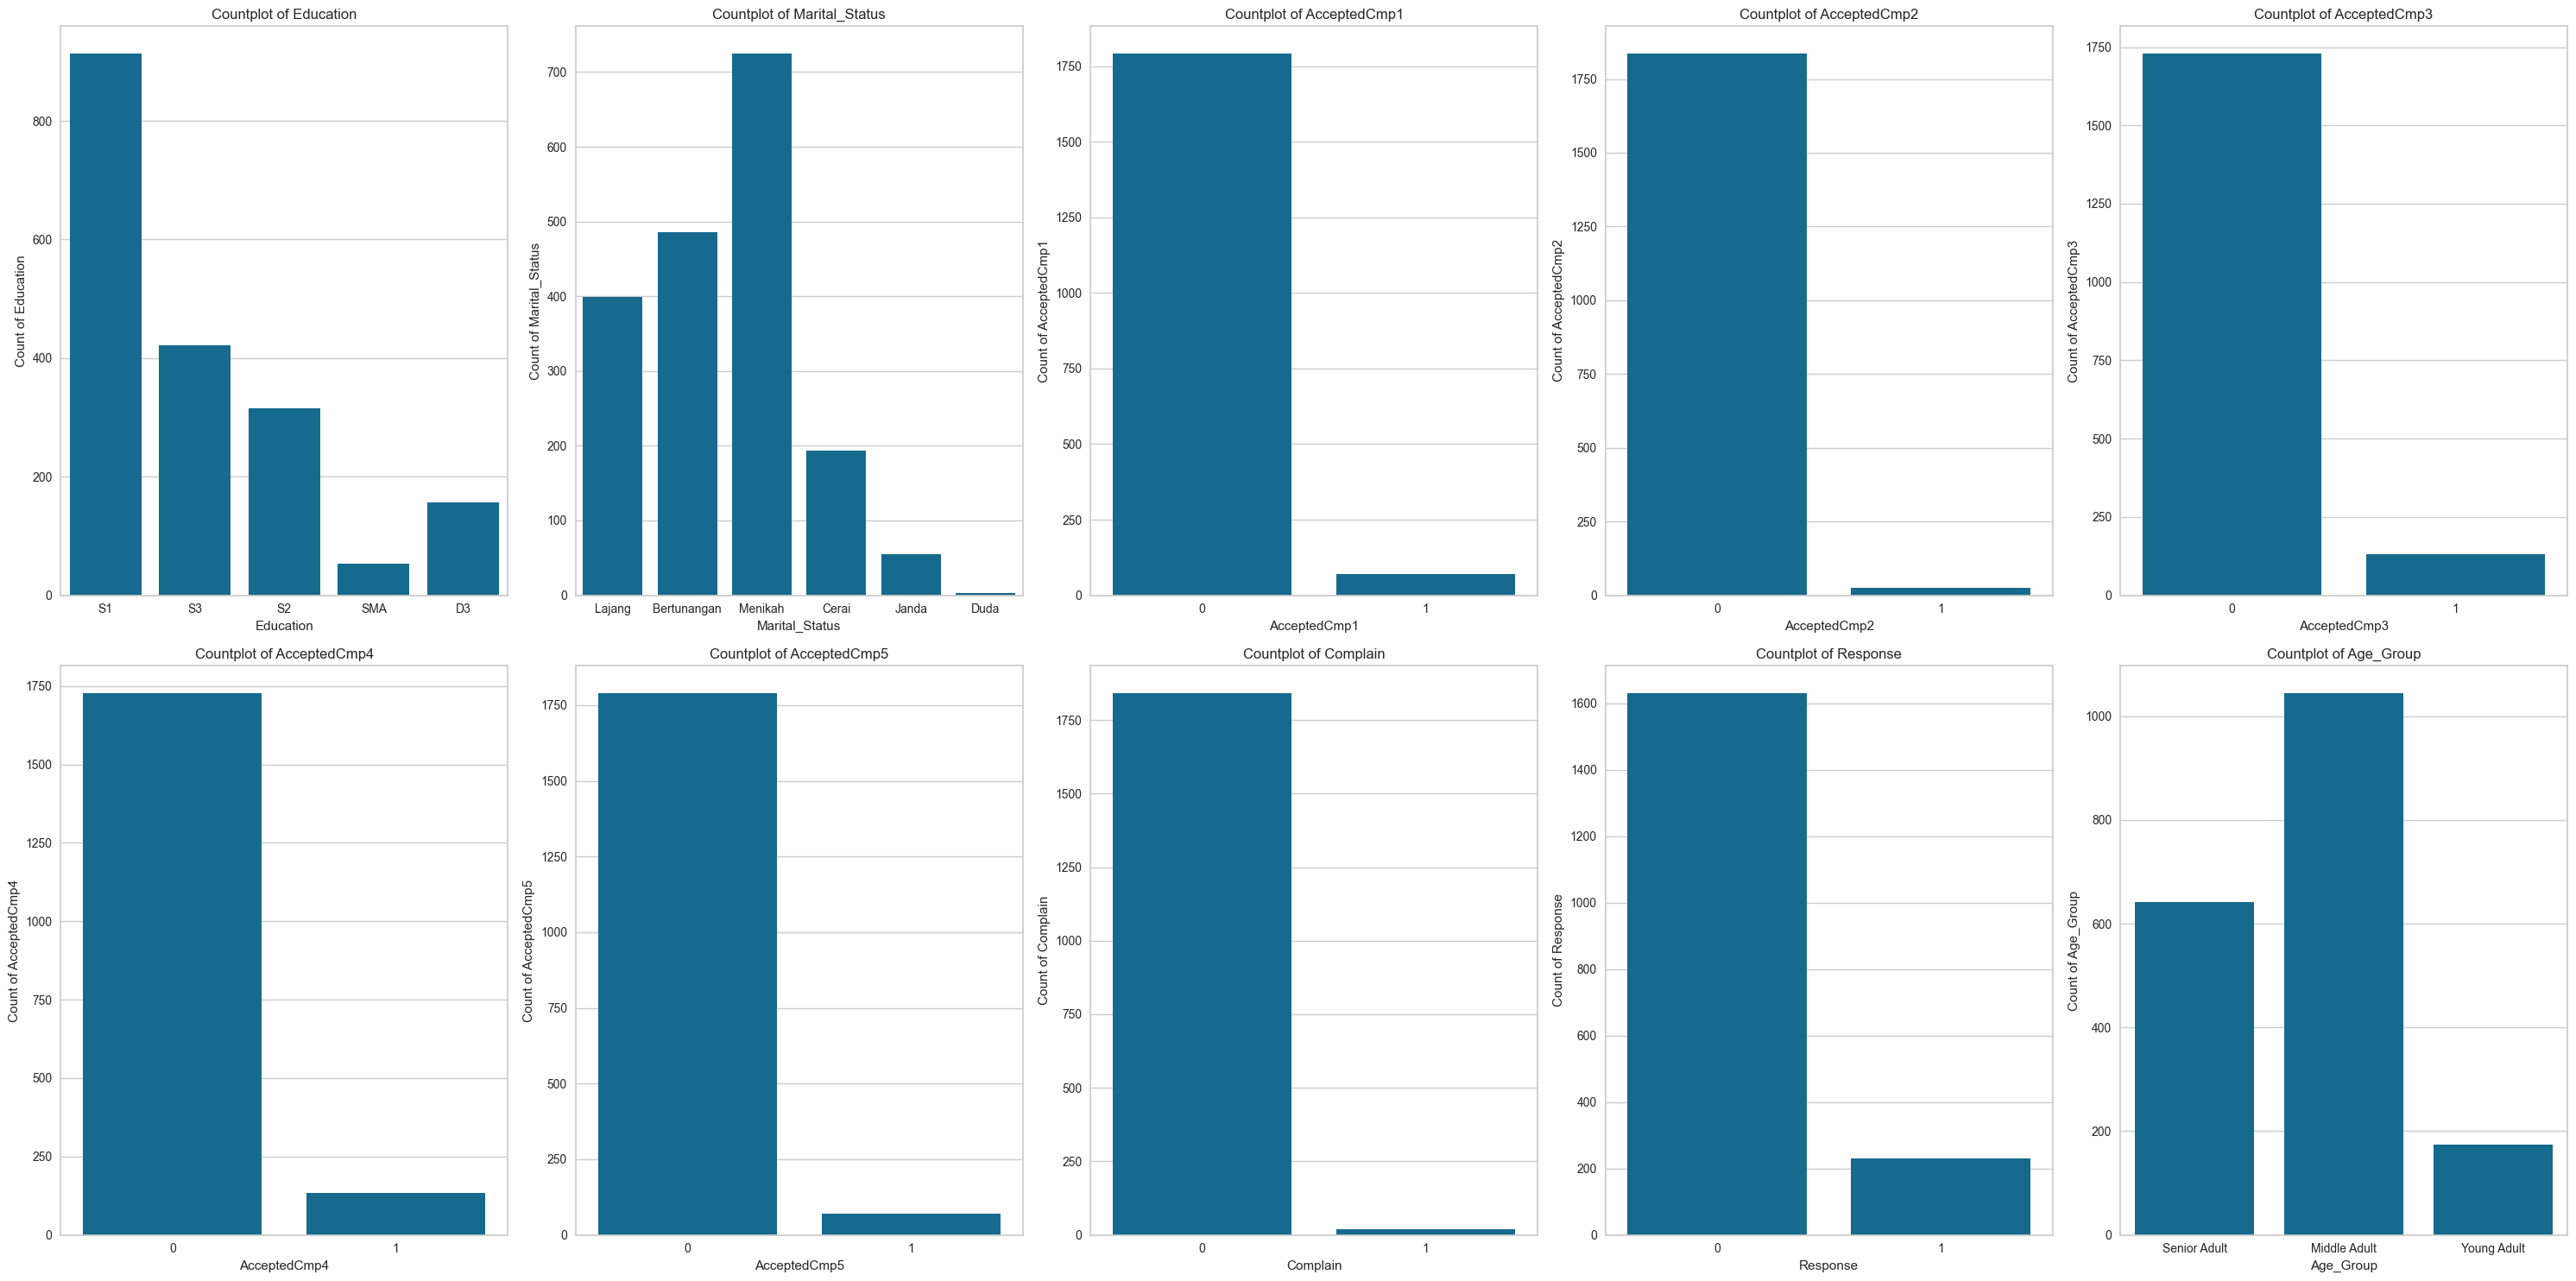

In [374]:
# Countplot function implementation
cats_cols_excluding_id = [col for col in cats_cols if col != 'ID']
cats_cols_excluding_id.extend(new_cats_cols)

plot_dynamic_countplot(df=df_filtered_outliers, col_series=cats_cols_excluding_id, ncols=5, figsize=(30, 15))

**Major Findings :**

- The majority of customers have at least a Bachelor's degree.
- The majority of customers are married.
- The majority of customers do not file complaints.
- The majority of customers do not respond to the campaign.
- The majority of customers are middle adults (age 40-60).

## Bivariate Analysis

In [375]:
# Correlation heatmap analysis on numerical features and target (implementation specific for task 1)
def plot_correlation_heatmap(df, col_series, corr_method='pearson', figsize=(8, 6), cmap='coolwarm'):
    """
    Plots a correlation heatmap for the specified columns in a dataframe.

    Parameters:
    - df : pd.DataFrame
        The input dataframe containing the data.
    - col_series : list
        List of column names to include in the correlation matrix.
    - corr_method : str 
        Correlation method ('pearson', 'spearman', or 'kendall'). Default is 'pearson'.
    - figsize : tuple
        Size of the heatmap figure (width, height). Default is (8, 6).
    - cmap : str
        Color map for the heatmap. Default is 'coolwarm'.

    Returns:
    - None: Displays the correlation heatmap.
    """
    
    # Compute correlation matrix
    correlation_matrix = df[col_series].corr(method=corr_method)
    
    # Plot heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(data=correlation_matrix, cmap=cmap, annot=True, fmt='.3f', vmin=-1, vmax=1)
    plt.title(f'{corr_method.capitalize()} Correlation')
    
    plt.tight_layout()
    plt.show()

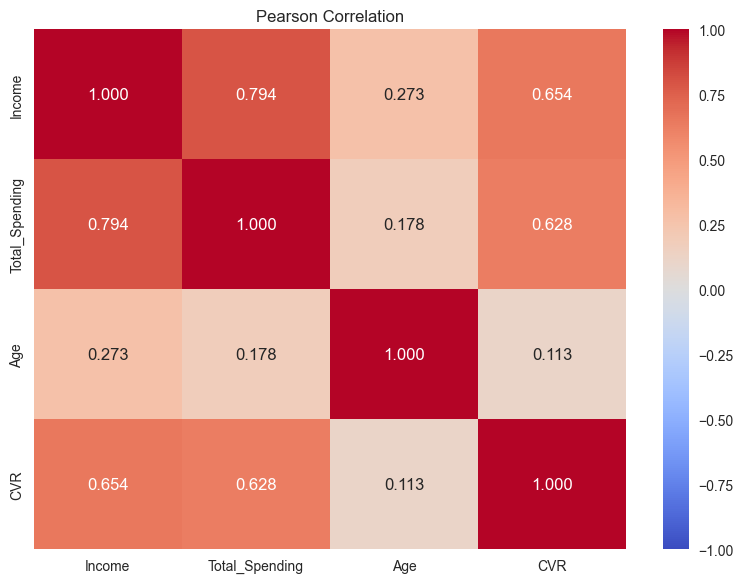

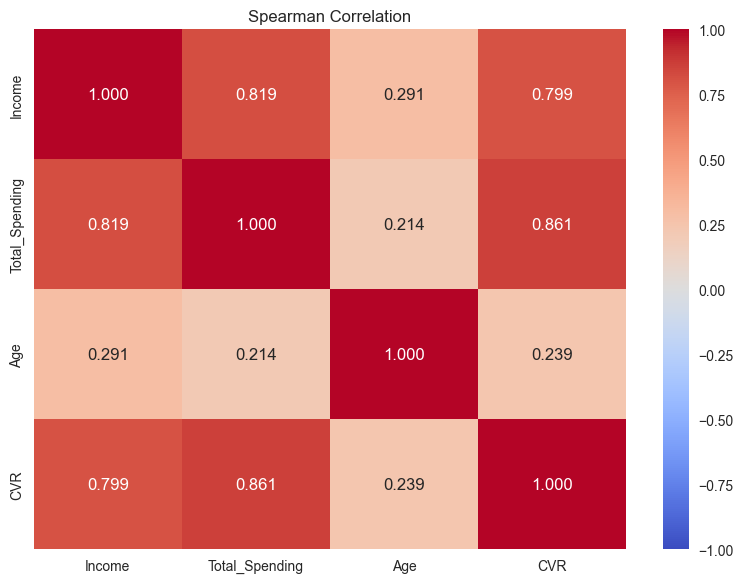

In [376]:
# Correlation heatmap function implementation
included_col = ['Income', 'Total_Spending', 'Age', 'CVR']
plot_correlation_heatmap(df_filtered_outliers, col_series=included_col, corr_method='pearson')
plot_correlation_heatmap(df_filtered_outliers, col_series=included_col, corr_method='spearman')

**Major Findings :**

- Most of the features have positive correlation to each other.
- `Income` and `Total_Spending` have high/strong positive correlation to `CVR` while `Age` have low/weak positive correlation to `CVR`.

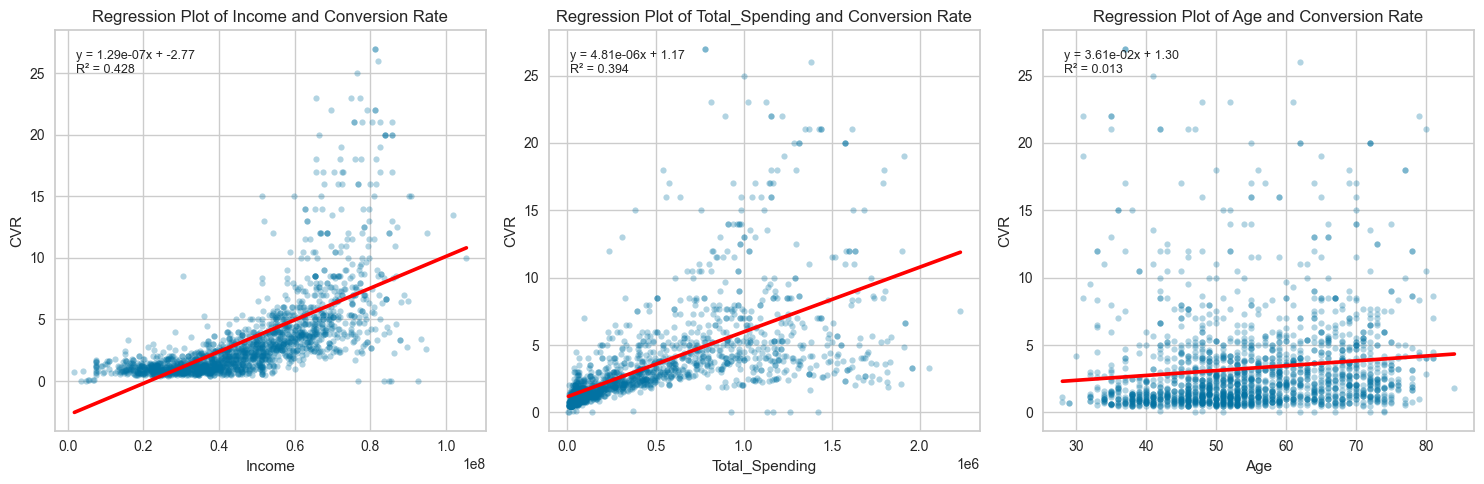

In [377]:
# Regplot of CVR vs Income, Total Spending, and Age
from scipy import stats

included_col = ['Income', 'Total_Spending', 'Age']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax = ax.flatten()

for i, col in enumerate(included_col):
    # Create regplot
    sns.regplot(data=df_filtered_outliers, ax=ax[i], x=col, y='CVR',
                scatter_kws={'s':20, 'alpha':0.3}, 
                line_kws={'color':'red'}, 
                ci=False)
    
    # Calculate regression parameters
    x = df_filtered_outliers[col]
    y = df_filtered_outliers['CVR']
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r_squared = r_value**2
    
    # Add equation and R² text
    equation = f'y = {slope:.2e}x + {intercept:.2f}'  # Using scientific notation for small coefficients
    r2_text = f'R² = {r_squared:.3f}'
    
    # Add text to plot
    ax[i].text(0.05, 0.95, equation + '\n' + r2_text, 
               transform=ax[i].transAxes,
               fontsize=9,
               verticalalignment='top')
    
    ax[i].set_title(f'Regression Plot of {col} and Conversion Rate')
    ax[i].grid(True)

plt.tight_layout()
plt.show()

**Reminder note to self - Relationship between r and R²:**

- R² is square of Pearson's r
- R² removes negative signs
- Example: r(Income, CVR) = 0.654, R² = r² = 0.428
- Both measure relationship strength but interpret differently

**Major Findings :**

> The findings are the further explanation from heatmap correlation before

- Overall, income and total spending have a positive correlation with purchase conversion rate (CVR).
    - This means that the higher the income and total spending, the higher the likelihood of conversion or purchase from potential consumers.
    - This positive correlation may be caused by several factors, such as better financial ability to meet the needs or desires of customers, as well as a high perceived value of the products or services offered. Therefore, companies can pay attention to and optimize their marketing strategies by considering target audiences with higher incomes and total spending, thereby increasing conversion opportunities and the overall success of marketing campaigns.

- Meanwhile, age features tend to have a non-significant correlation with the conversion rate. This means that age is not a dominant factor influencing consumer decisions to convert or make purchases but we can use this feature in terms of the grouped version for another insight later.

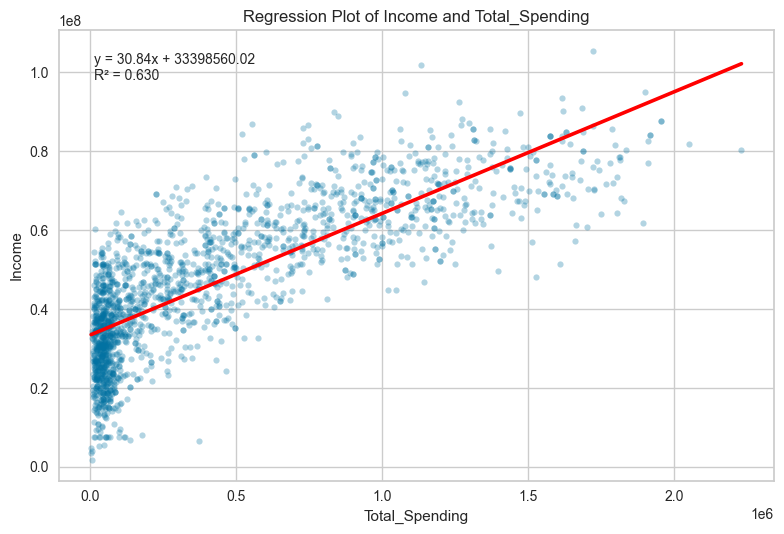

In [378]:
# Regplot of Income vs Total Spending

# Create the plot
sns.regplot(data=df_filtered_outliers, x='Total_Spending', y='Income', 
            scatter_kws={'s':20, 'alpha':0.3}, 
            line_kws={'color':'red'}, 
            ci=False)

# Calculate the line equation and R²
x = df_filtered_outliers['Total_Spending']
y = df_filtered_outliers['Income']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value**2

# Add text with equation and R² to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r2_text = f'R² = {r_squared:.3f}'

# Position the text in the upper left corner
plt.text(0.05, 0.95, equation + '\n' + r2_text, 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         verticalalignment='top')

plt.title('Regression Plot of Income and Total_Spending')
plt.grid(True)
plt.tight_layout()
plt.show()

**Major Findings :**

> The findings are the further explanation from heatmap correlation before

- Income and total spending have a strong positive correlation.
- This indicates a significant relationship between an individual's income level and their spending patterns. The higher someone's income, the more likely they are to have higher spending (kinda obvious here).

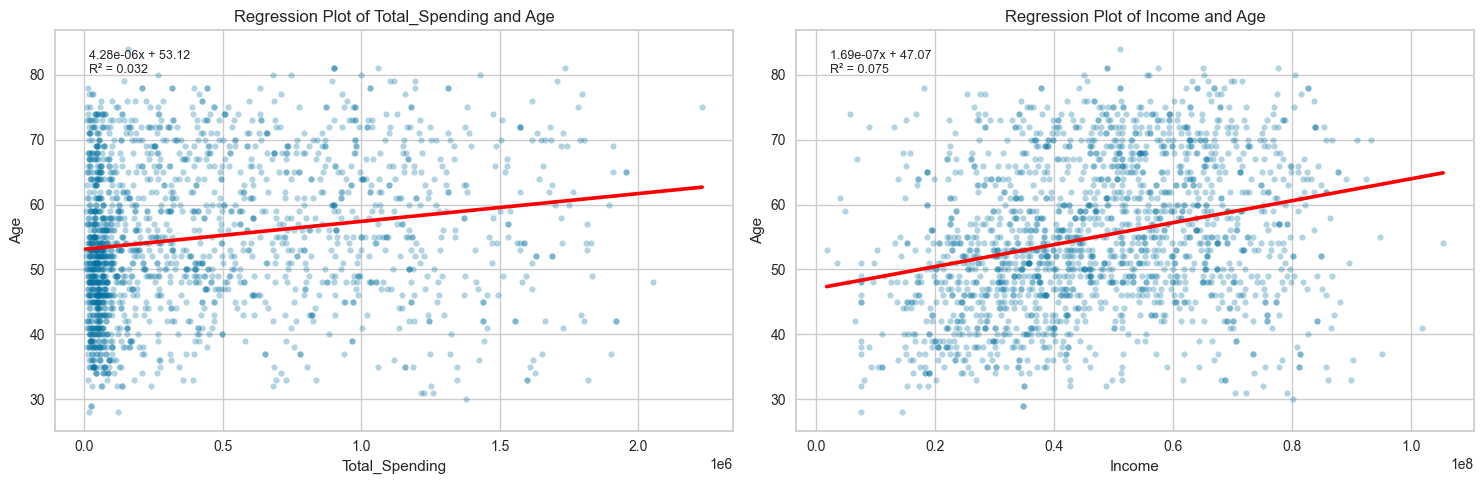

In [379]:
# Regplot of Age vs Total Spending and Income
included_col = ['Total_Spending', 'Income']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax = ax.flatten()

for i, col in enumerate(included_col):
    # Create regplot
    sns.regplot(data=df_filtered_outliers, ax=ax[i], x=col, y='Age',
                scatter_kws={'s':20, 'alpha':0.3},
                line_kws={'color':'red'},
                ci=False)
    
    # Calculate regression parameters
    x = df_filtered_outliers[col]
    y = df_filtered_outliers['Age']
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r_squared = r_value**2

    # Add equation and R² text
    equation = f'{slope:.2e}x + {intercept:.2f}'
    r2_text = f'R² = {r_squared:.3f}'

    # Add text to plot
    ax[i].text(0.05, 0.95, equation + '\n' + r2_text,
               transform=ax[i].transAxes,
               fontsize=9,
               verticalalignment='top')    
    
    ax[i].set_title(f'Regression Plot of {col} and Age')
    ax[i].grid(True)
    
plt.tight_layout()
plt.show()

**Major Findings :**

> The findings are the further explanation from heatmap correlation before

- Age has a weak positive correlation and even lacks significant correlation with the income (Income) or total spending features.
- This means that age (just in the number) does not directly influence an individual's income level or spending patterns. However, companies still need to consider age as part of their marketing strategy. Although the weak correlation suggests that age may not be a primary determinant factor in consumer decisions.

## Multivariate Analysis

<Figure size 1500x1500 with 0 Axes>

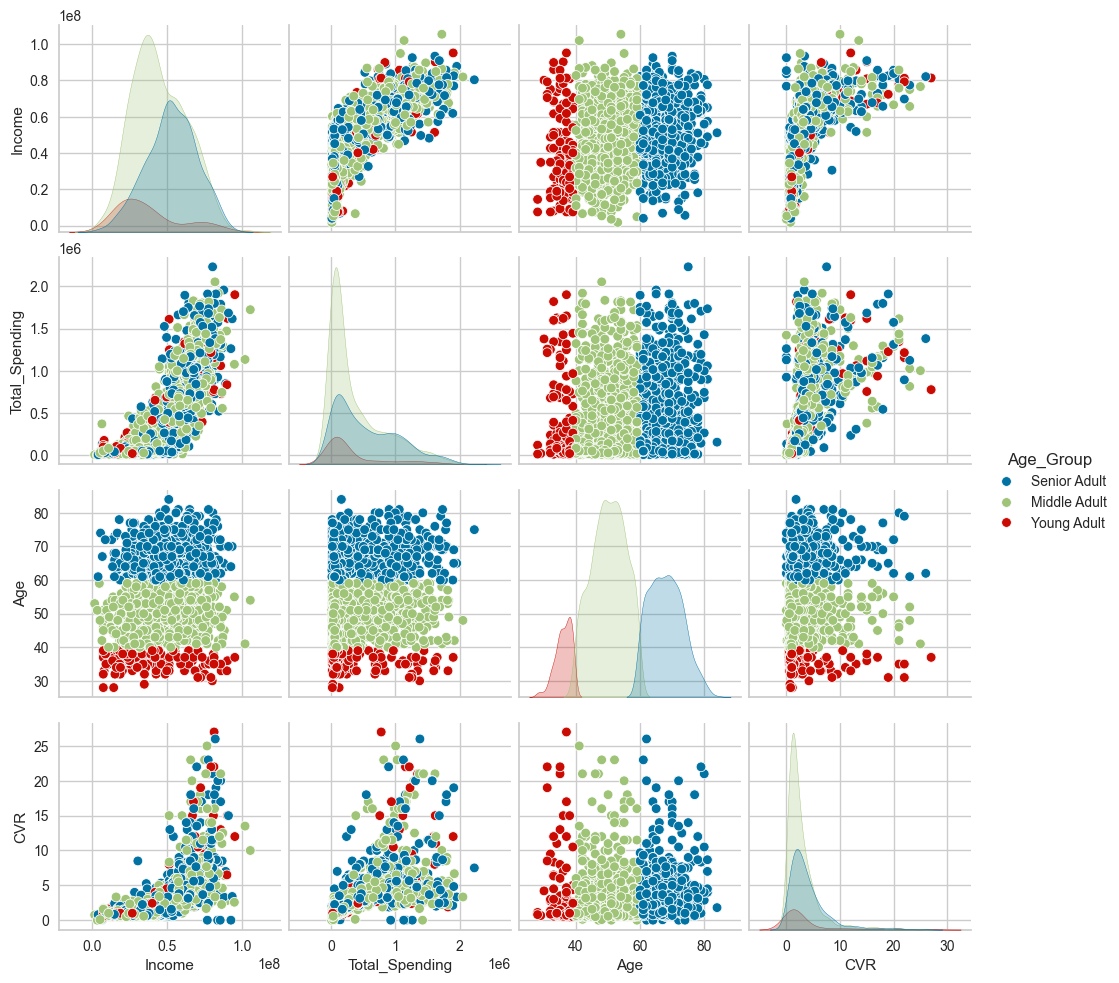

In [380]:
# Pairplot with hue Age Group
included_col = ['Income', 'Total_Spending', 'Age', 'CVR', 'Age_Group']

plt.figure(figsize=(15, 15))
sns.pairplot(data=df_filtered_outliers[included_col], hue='Age_Group', diag_kind='kde')
plt.show()

Based on the graph above and also from insights from regplots before (focusing on CVR):

- Middle adults appear to be the most valuable segment, with good income levels and higher conversion rates
- Senior adults have spending power but more moderate conversion rates
- Young adults might need different targeting strategies due to lower income and conversion rates
- There might be opportunity to improve conversion rates among senior adults given their higher spending potential

### Additional Analysis (Outside of the focused task 1 columns)

In [381]:
help(plot_dynamic_countplot)

Help on function plot_dynamic_countplot in module __main__:

plot_dynamic_countplot(df, col_series, ncols=6, figsize=(26, 18))
    Plots a dynamic grid of countplot for a list of categorical columns from a DataFrame.

    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data to plot.
    col_series : list of str
        List of column names to include in the countplots.
    ncols : int, optional, default=6
        Number of columns in the subplot grid. Adjust this value to change grid width.
    figsize : tuple, optional, default=(26, 18)
        Size of the figure to control plot dimensions.

    Returns:
    -------
    None
        Displays a grid of countplots.

    Example:
    -------
    >>> plot_dynamic_countplot(df=my_dataframe, col_series=['col1', 'col2', 'col3', ...], ncols=4, figsize=(20, 15))



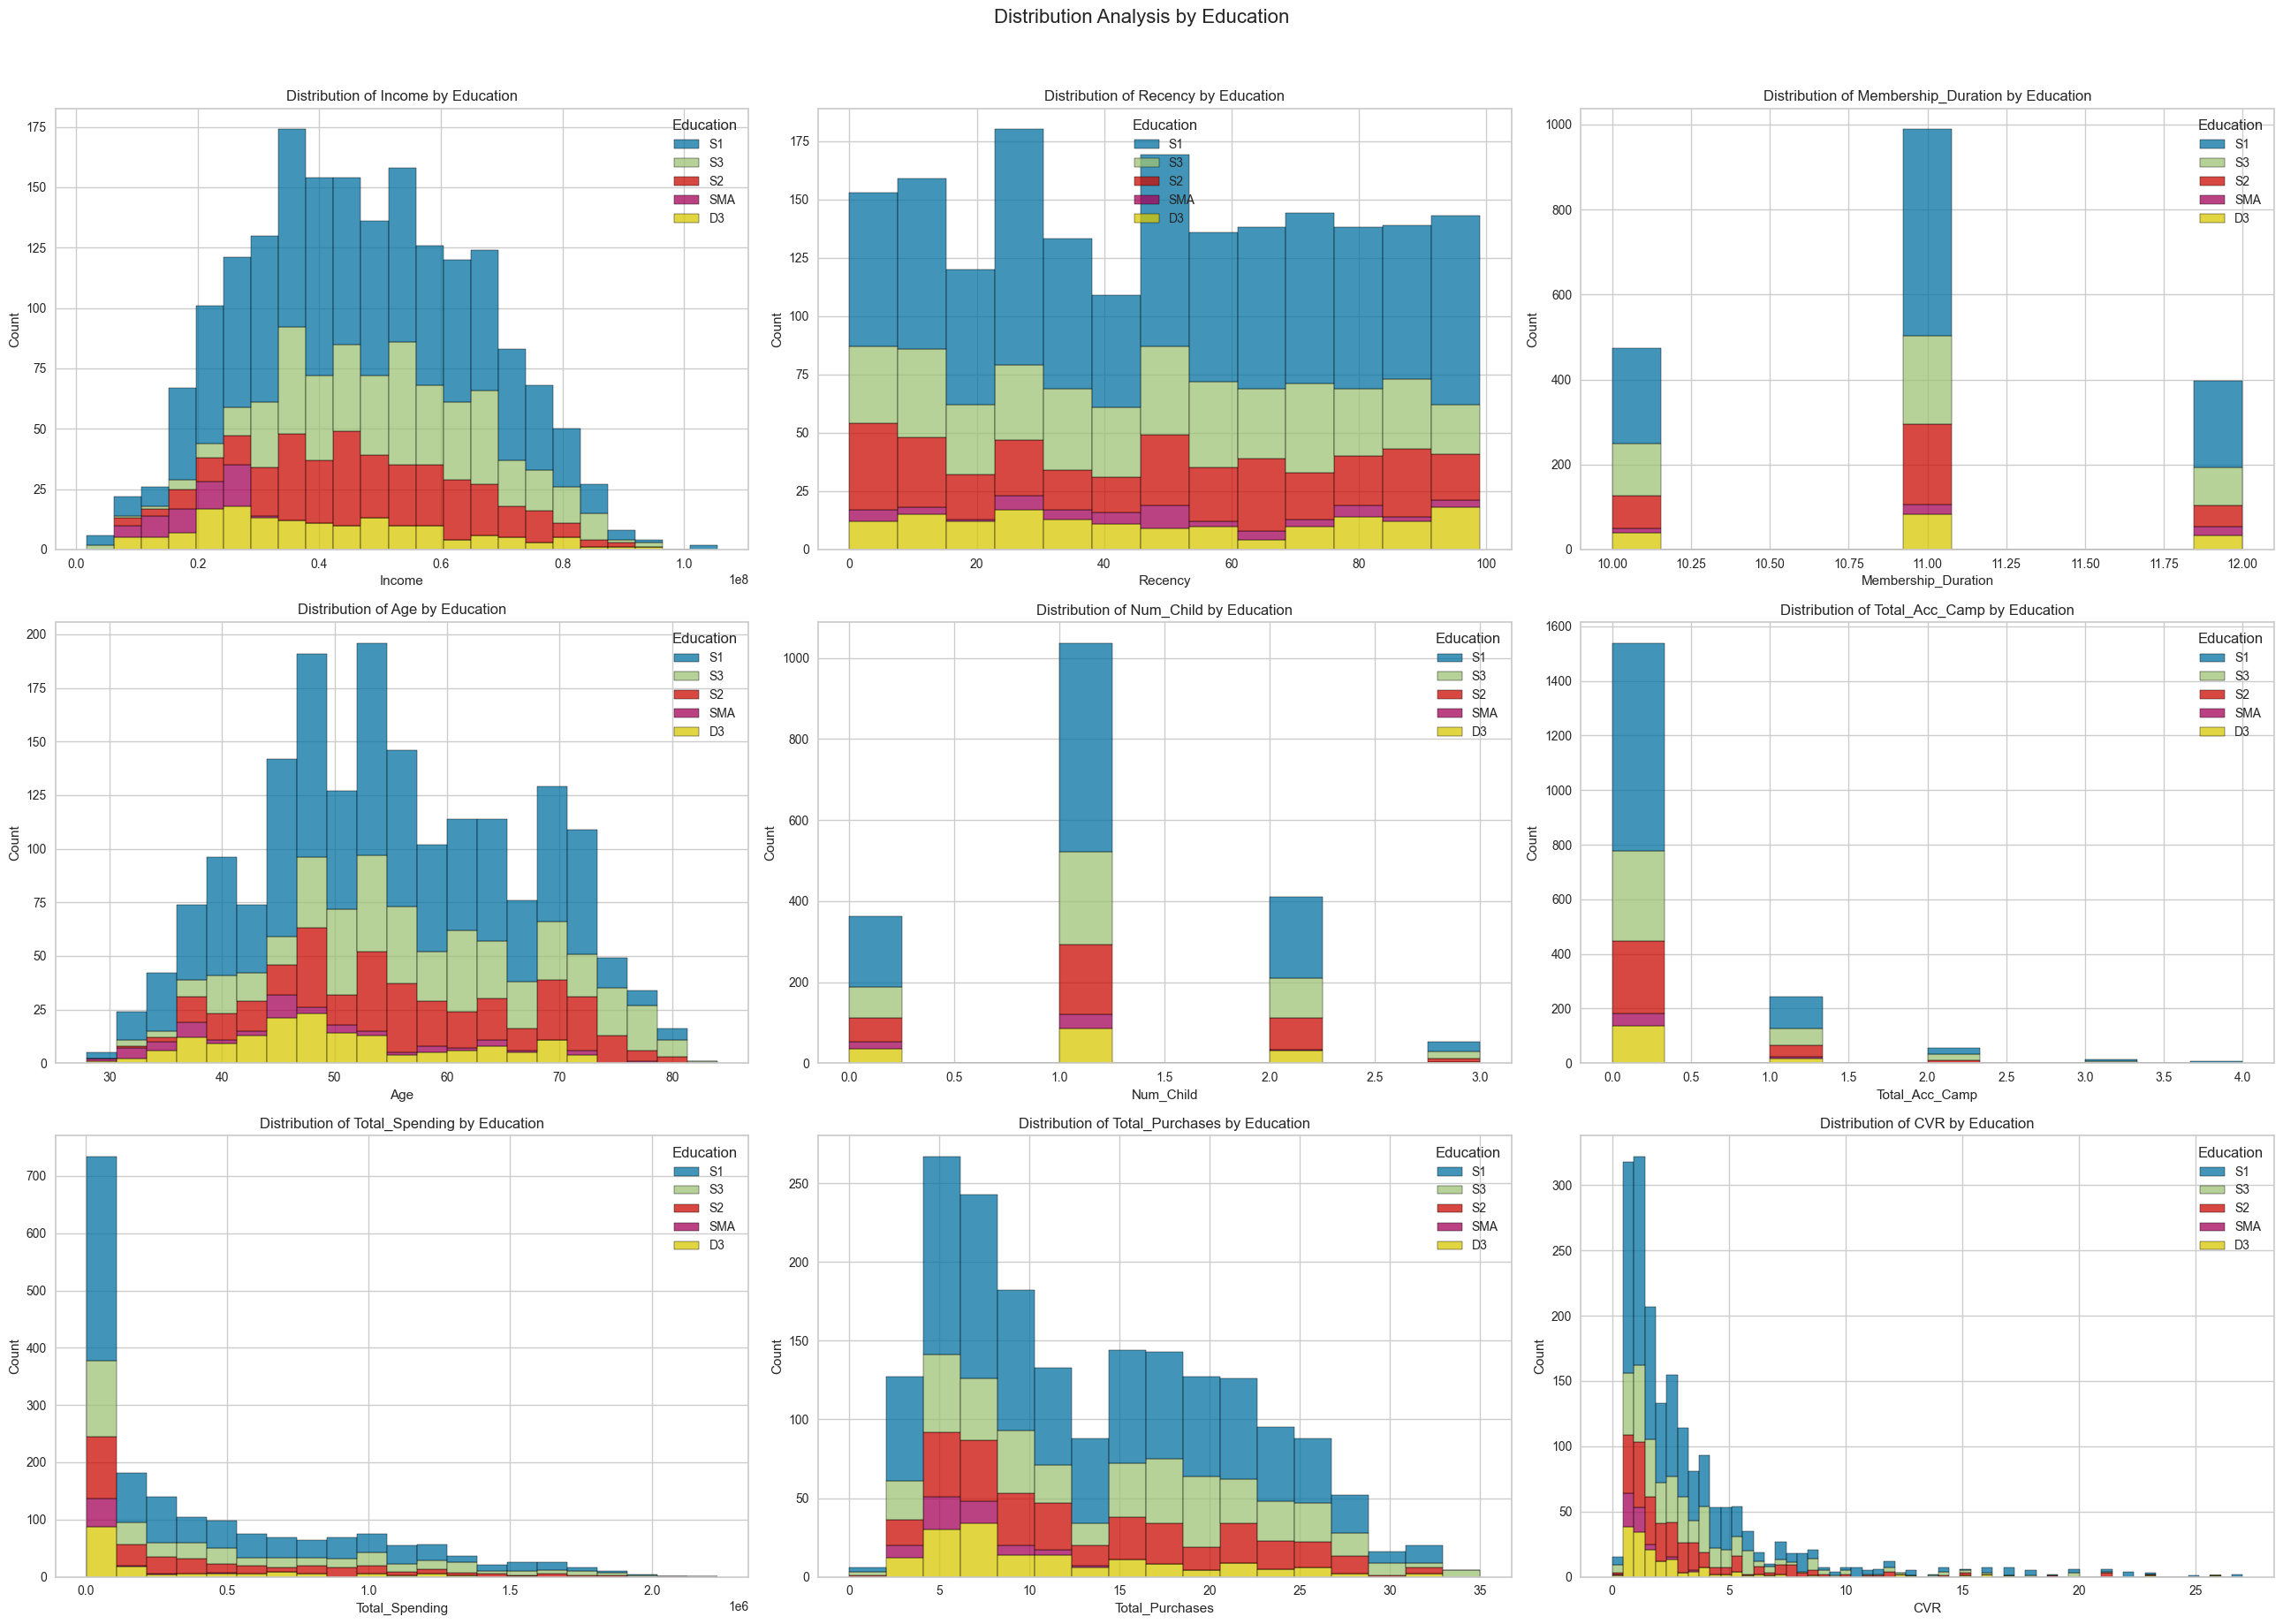

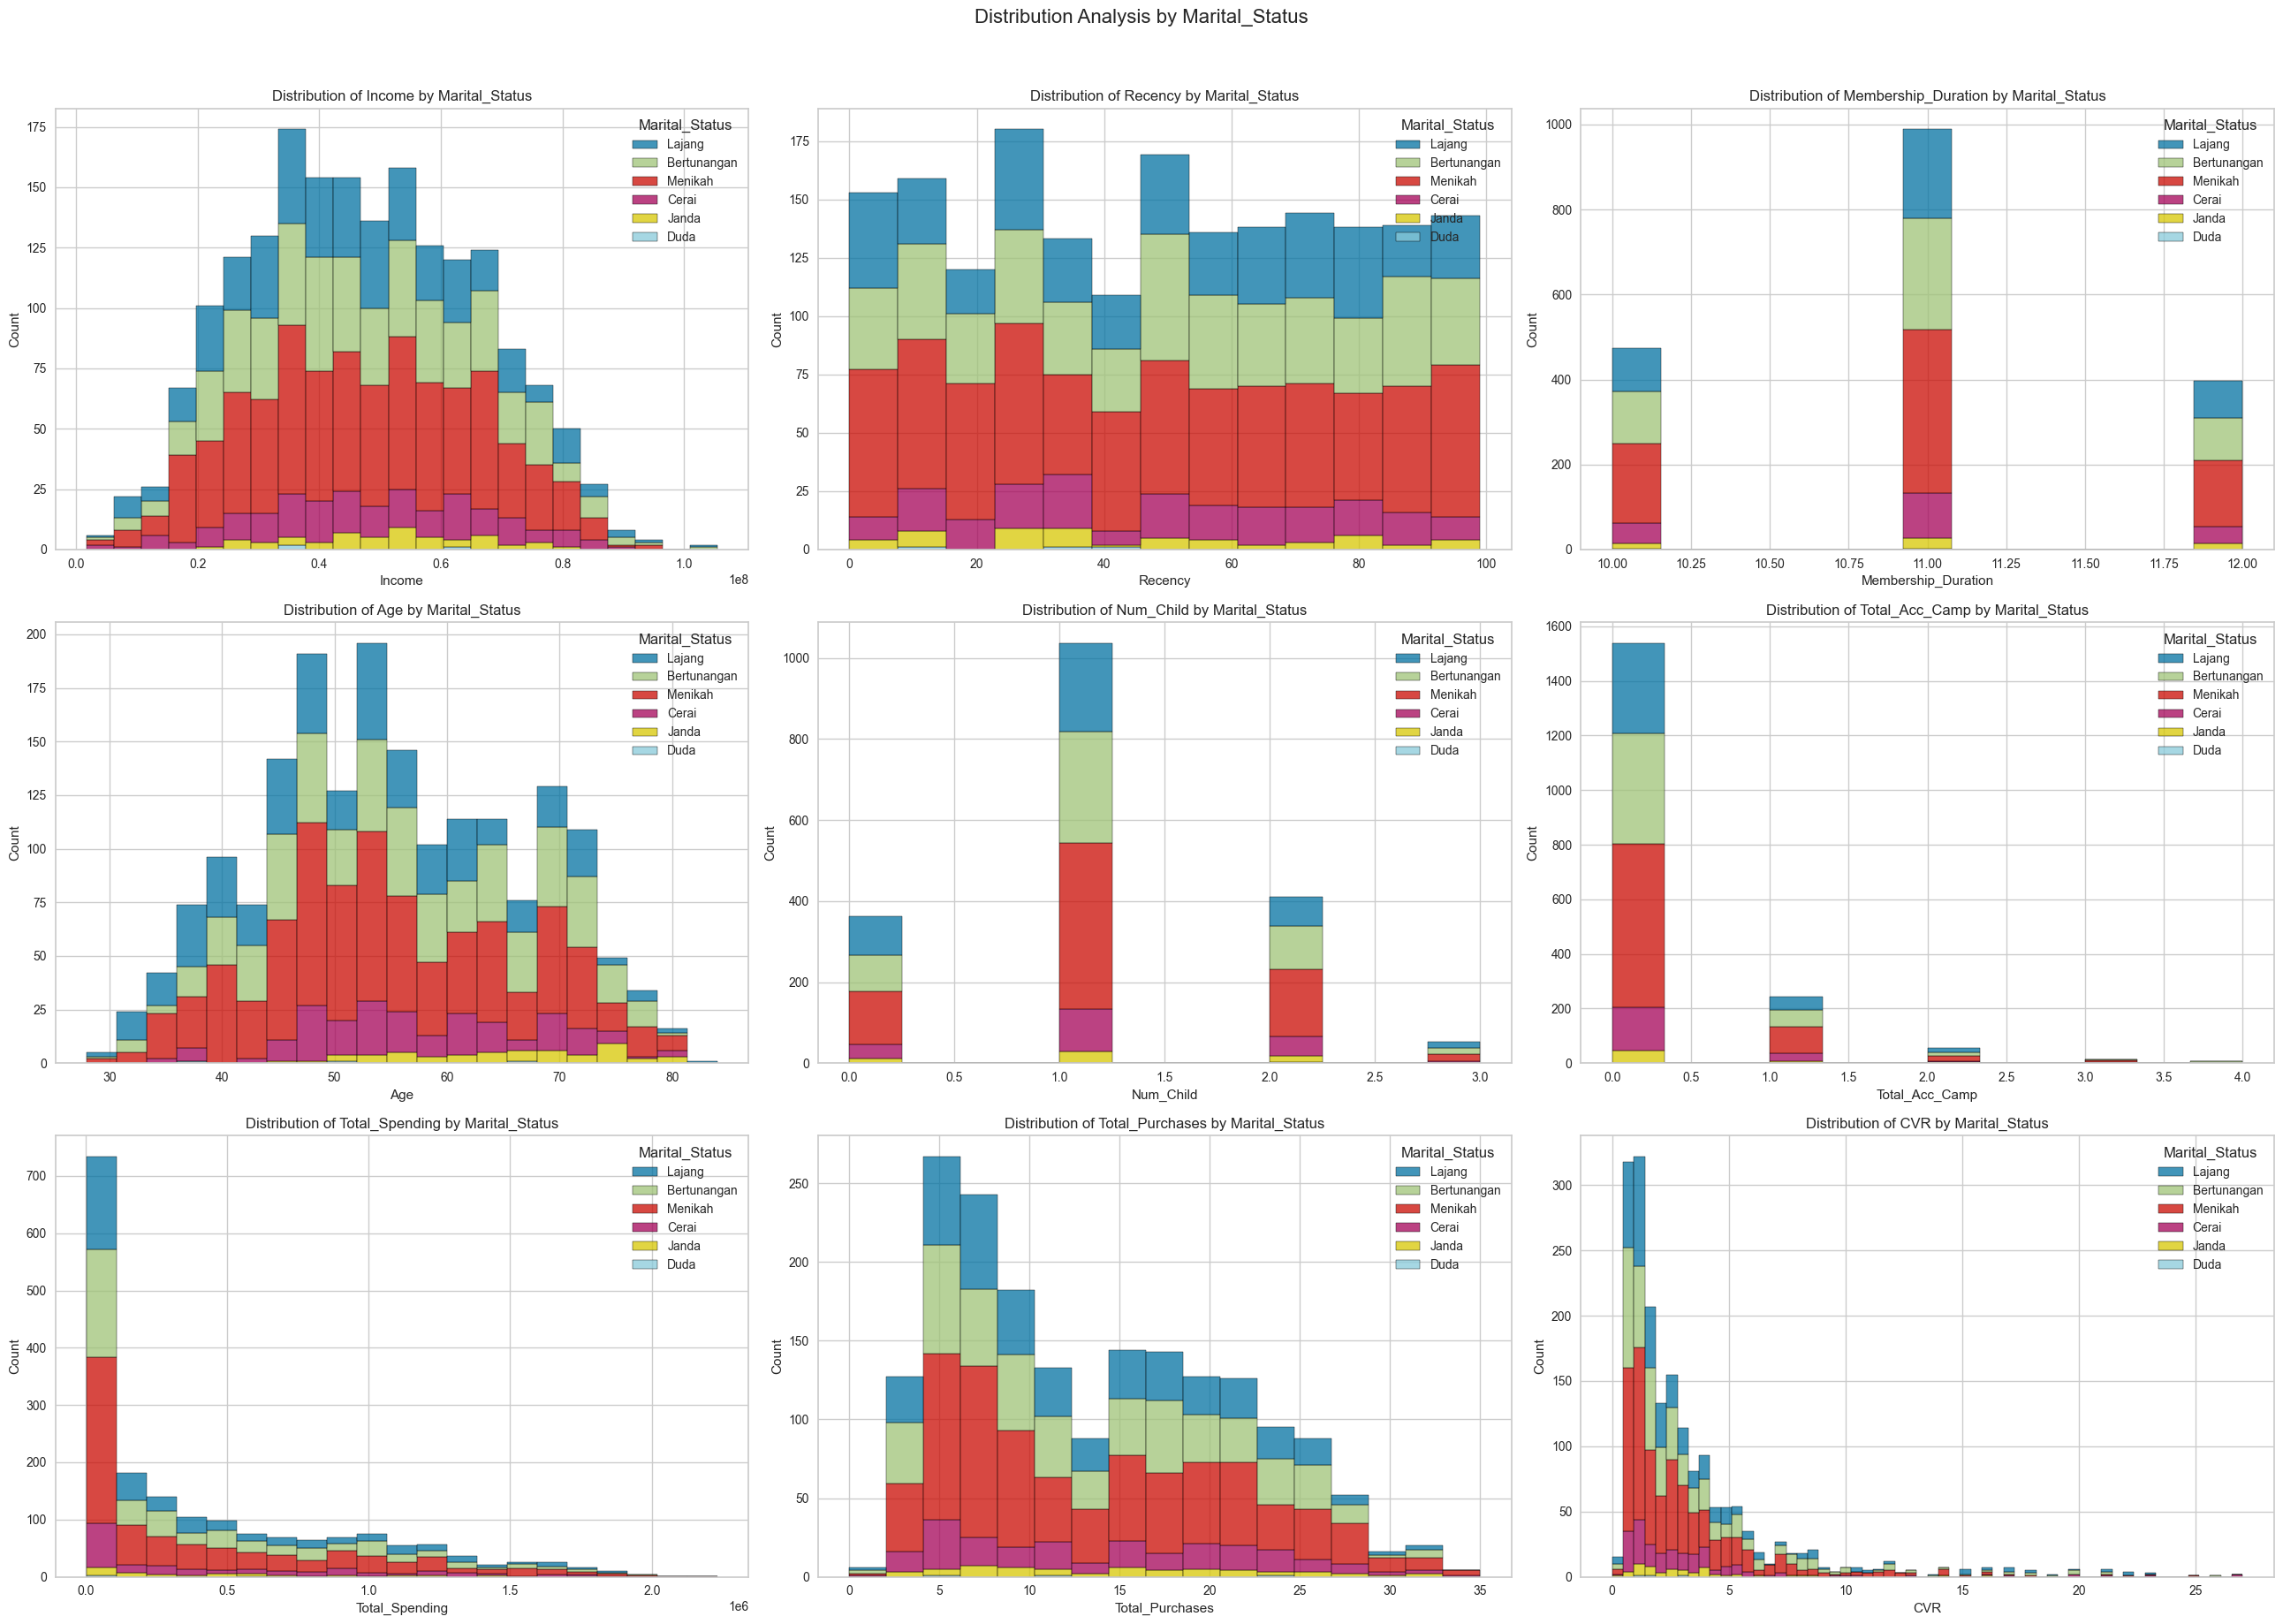

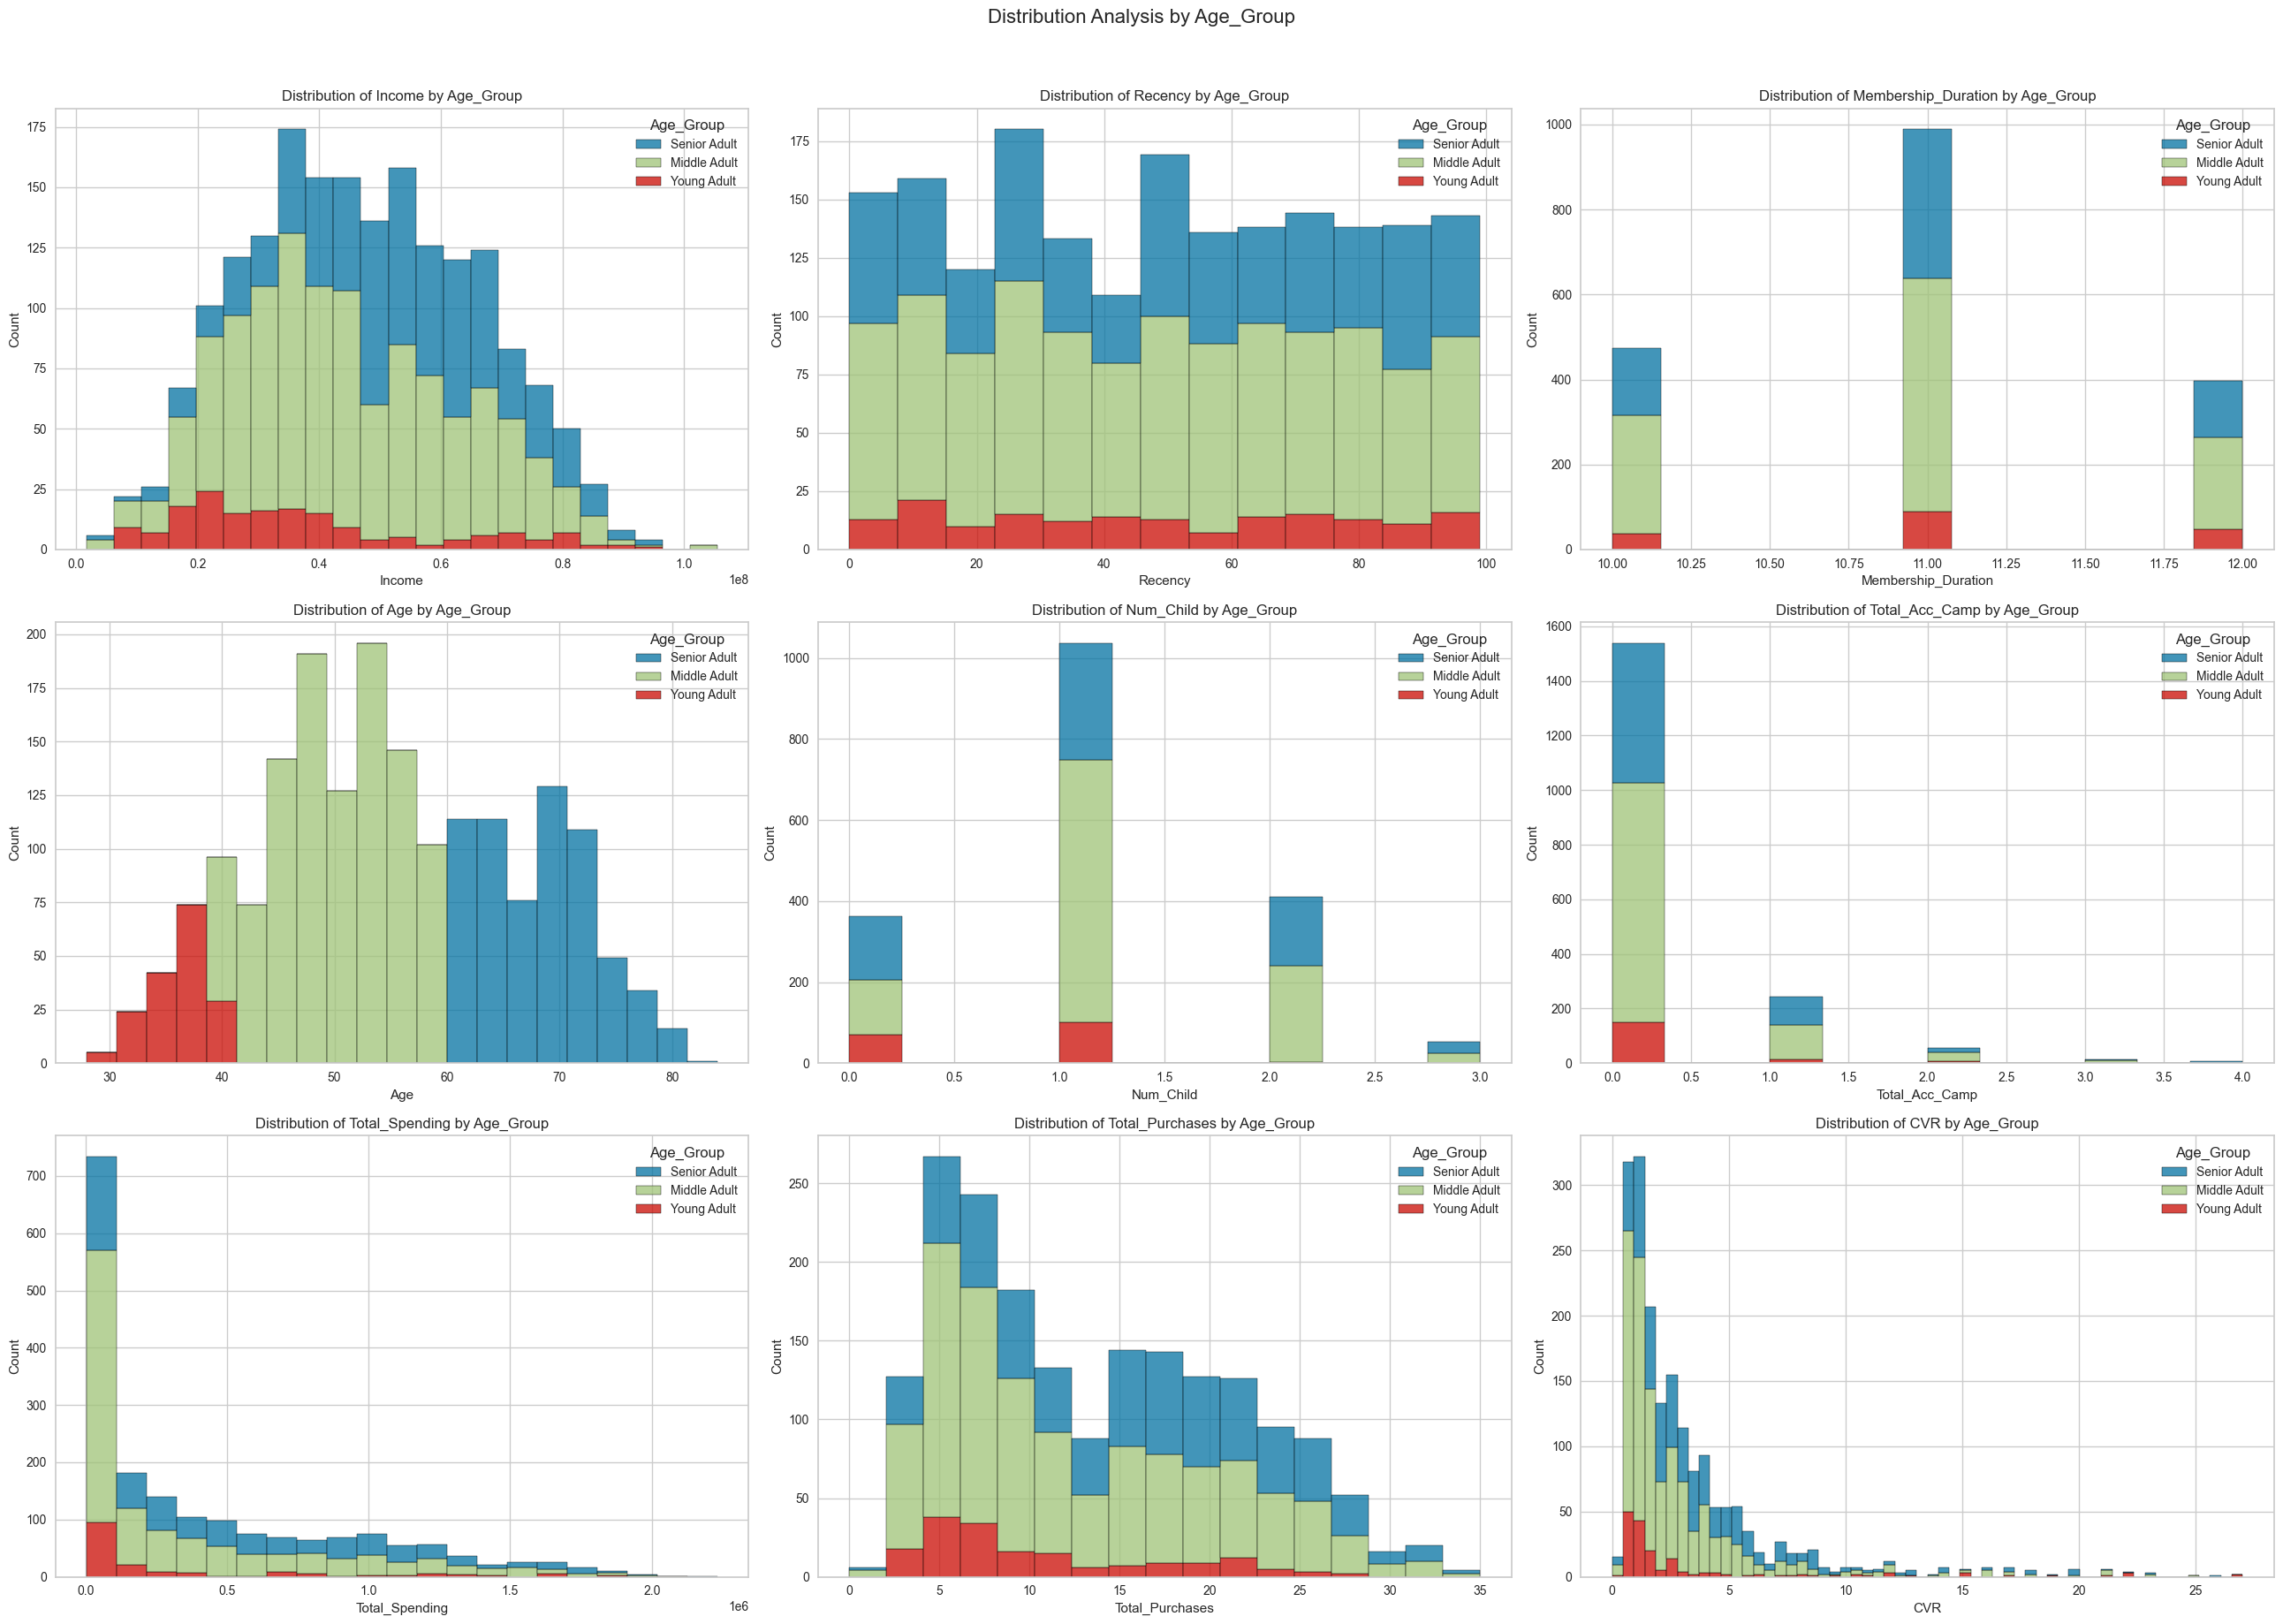

In [382]:
# Hisplot with kde of each categorical variable
categorical_vars = ['Education', 'Marital_Status', 'Age_Group']

for cat_var in categorical_vars:

    # Calculate required number of rows based on number of plots and specified columns
    num_plots = len(desc_cols)
    nrows = math.ceil(num_plots / 3)

    # Create a figure for each categorical variable
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(26, 18))
    ax = ax.flatten()
    
    # Plot histograms for each numerical column
    for i, col in enumerate(desc_cols):
        sns.histplot(data=df_filtered_outliers, ax=ax[i], 
                     x=col,
                     hue=cat_var,
                     multiple="stack")
        ax[i].set_title(f'Distribution of {col} by {cat_var}')
        ax[i].set_ylabel(f'Count')
        ax[i].set_xlabel(f'{col}')
    
    # Remove any unused subplots if total subplots exceed columns in cols
    for j in range(num_plots, len(ax)):
        fig.delaxes(ax[j])
    
    plt.suptitle(f'Distribution Analysis by {cat_var}', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# **Task 2 : Further Data Pre-Processing**

This section covers data preparation procedures for clustering, focusing on feature encoding, feature scaling, and feature selection to make the data more suitable for the algorithm to learn effectively.

In [383]:
# Make a copy of the dataframe
df_preprocessed = df_filtered_outliers.copy().reset_index(drop=True)
df_preprocessed

ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0     2174        1954        S1         Lajang  46344000.0        1   
1     4141        1965        S1    Bertunangan  71613000.0        0   
2     6182        1984        S1    Bertunangan  26646000.0        1   
3     5324        1981        S3        Menikah  58293000.0        1   
4     7446        1967        S2    Bertunangan  62513000.0        0   
...    ...         ...       ...            ...         ...      ...   
1856  8372        1974        S1        Menikah  34421000.0        1   
1857  4001        1946        S3    Bertunangan  64014000.0        2   
1858  7270        1981        S1          Cerai  56981000.0        0   
1859  8235        1956        S2    Bertunangan  69245000.0        0   
1860  9405        1954        S3        Menikah  52869000.0        1   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
0            1  2014-03-08       38    11000       1000             6000   
1            0  2013-08-21       26   426000      49000           127000   
2            0  2014-02-10       26    11000       4000            20000   
3            0  2014-01-19       94   173000      43000           118000   
4            1  2013-09-09       16   520000      42000            98000   
...        ...         ...      ...      ...        ...              ...   
1856         0  2013-07-01       81     3000       3000             7000   
1857         1  2014-06-10       56   406000          0            30000   
1858         0  2014-01-25       91   908000      48000           217000   
1859         1  2014-01-24        8   428000      30000           214000   
1860         1  2012-10-15       40    84000       3000            61000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                2000              1000          6000                  2   
1              111000             21000         42000                  1   
2               10000              3000          5000                  2   
3               46000             27000         15000                  5   
4                   0             42000         14000                  2   
...               ...               ...           ...                ...   
1856             6000              2000          9000                  1   
1857                0                 0          8000                  7   
1858            32000             12000         24000                  1   
1859            80000             30000         61000                  2   
1860             2000              1000         21000                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   1                    1                  2   
1                   8                    2                 10   
2                   2                    0                  4   
3                   5                    3                  6   
4                   6                    4                 10   
...               ...                  ...                ...   
1856                1                    0                  2   
1857                8                    2                  5   
1858                2                    3                 13   
1859                6                    5                 10   
1860                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     5             0             0             0   
1                     4             0             0             0   
2                     6             0             0             0   
3                     5             0             0             0   
4                     6             0             0             0   
...                 ...           ...           ...           ...   
1856                  7             0             0  

## Feature Encoding

In [384]:
# Checking for categorical features that needs to be encoded
encoded_features = ['Education', 'Marital_Status', 'Age_Group']

for col in encoded_features :
    print(col)
    print(df_preprocessed[col].unique())
    print()

Education
['S1' 'S3' 'S2' 'SMA' 'D3']

Marital_Status
['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']

Age_Group
['Senior Adult' 'Middle Adult' 'Young Adult']



In [385]:
# Before encoding
df_preprocessed[['Education', 'Age_Group', 'Marital_Status']].head()

Education     Age_Group Marital_Status
0        S1  Senior Adult         Lajang
1        S1  Middle Adult    Bertunangan
2        S1  Middle Adult    Bertunangan
3        S3  Middle Adult        Menikah
4        S2  Middle Adult    Bertunangan

### Ordinal Column Encoding

#### Plan A : Using Pandas replace Method

In [386]:
# df_preprocessed['Education'] = df_preprocessed['Education'].replace({'SMA' : 0,
#                                                                      'D3' : 1,
#                                                                      'S1' : 2,
#                                                                      'S2' : 3,
#                                                                      'S3' : 4})


# df_preprocessed['Age_Group'] = df_preprocessed['Age_Group'].replace({'Young Adult' : 0,
#                                                                      'Middle Adult' : 1,
#                                                                      'Senior Adult' : 2})

#### Plan B : Using Sklearn Ordinal Encoder

In [387]:
# from sklearn.preprocessing import OrdinalEncoder

# # Define the order of education degress and age group
# degree_order = [['SMA', 'D3', 'S1', 'S2', 'S3']]
# age_group_order = [['Young Adult', 'Middle Adult', 'Senior Adult']]

# # Initialize and apply OrdinalEncoder for 'Education' column
# education_encoder = OrdinalEncoder(categories=degree_order)
# df_preprocessed['Education'] = education_encoder.fit_transform(df_preprocessed[['Education']])

# # Initialize and apply OrdinalEncoder for 'Age_Group' column
# age_group_encoder = OrdinalEncoder(categories=age_group_order)
# df_preprocessed['Age_Group'] = age_group_encoder.fit_transform(df_preprocessed[['Age_Group']])

#### Plan C : Combining Wrapping Sklearn Ordinal Encoder Inside Sklearn Column Transformer 

In [388]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OrdinalEncoder

# # Define the order for each categorical column
# degree_order = ['SMA', 'D3', 'S1', 'S2', 'S3']
# age_group_order = ['Young Adult', 'Middle Adult', 'Senior Adult']

# # Define the transformer to apply OrdinalEncoder with specific orders
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('edu', OrdinalEncoder(categories=[degree_order]), ['Education']),
#         ('age', OrdinalEncoder(categories=[age_group_order]), ['Age_Group'])
#     ],
#     remainder='passthrough'  # Keeps other columns unchanged
# )

# # Fit and transform the data
# df_preprocessed[['Education', 'Age_Group']] = preprocessor.fit_transform(df_preprocessed[['Education', 'Age_Group']])

### Nominal Column Encoding

#### Plan A : Using Pandas get_dummies Method

In [389]:
# onehots_df = pd.get_dummies(df_preprocessed['Marital_Status'], prefix='Marital_Status', drop_first=True)
# onehots_df = onehots_df.astype(int)
# df_preprocessed = pd.concat([df_preprocessed, onehots_df], axis=1)
# df_preprocessed = df_preprocessed.drop('Marital_Status', axis=1)

#### Plan B : Using Sklearn Onehotencoder

In [390]:
# from sklearn.preprocessing import OneHotEncoder

# # Verify initial number of rows
# print(f"Initial rows: {df_preprocessed.shape[0]}")

# # Initialize OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False, drop='first')  # 'drop' can help avoid the dummy variable trap

# # Apply encoding and convert to a DataFrame
# onehots = encoder.fit_transform(df_preprocessed[['Marital_Status']])

# # Verify the shape of the one-hot encoded data
# print(f"Shape after OneHotEncoder: {onehots.shape}")

# # Convert the result into a DataFrame with appropriate column names
# onehots_df = pd.DataFrame(onehots, columns=encoder.get_feature_names_out(['Marital_Status']))

# # Concatenate the one-hot encoded columns with the original DataFrame
# df_preprocessed = pd.concat([df_preprocessed, onehots_df], axis=1)

# # Verify the number of rows after concatenation
# print(f"Rows after concat: {df_preprocessed.shape[0]}")

### Experiment with Column Transformer for All Encoding Steps

In [391]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Encoding categorical data function
def encoding_categorical_data(df, degree_order=None, age_group_order=None, marital_status_order=None):
    """
    Preprocesses categorical data in a DataFrame using ordinal and one-hot encoding.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing the data to be preprocessed
    degree_order : list, optional
        List defining the order of education degrees for ordinal encoding.
        Default is ['SMA', 'D3', 'S1', 'S2', 'S3']
    age_group_order : list, optional
        List defining the order of age groups for ordinal encoding.
        Default is ['Young Adult', 'Middle Adult', 'Senior Adult']
    marital_status_order : list, optional
        List of marital status categories for one-hot encoding.
        Default is unique values from the Marital_Status column
        
    Returns:
    --------
    pandas.DataFrame
        Preprocessed DataFrame with encoded categorical variables and preserved data types
        
    Notes:
    ------
    - Applies ordinal encoding to Education and Age_Group columns
    - Applies one-hot encoding to Marital_Status column
    - Preserves datetime columns and original data types for non-encoded columns
    - Converts encoded columns to float64 type
    - Performs validation checks for unexpected categories
    """
    # Create a copy of the input DataFrame to avoid modifying the original
    df_preprocessed = df.copy()
    
    # Set default orders if not provided
    if degree_order is None:
        degree_order = ['SMA', 'D3', 'S1', 'S2', 'S3']
    if age_group_order is None:
        age_group_order = ['Young Adult', 'Middle Adult', 'Senior Adult']
    if marital_status_order is None:
        marital_status_order = df_preprocessed['Marital_Status'].unique()

    # Store original data types before preprocessing
    original_dtypes = df_preprocessed.dtypes

    # First, identify datetime columns
    datetime_columns = df_preprocessed.select_dtypes(include=['datetime64']).columns.tolist()

    # Store datetime columns separately before preprocessing
    datetime_data = df_preprocessed[datetime_columns].copy() if datetime_columns else None

    # Check if there are any unexpected categories in the data
    unique_degrees = df_preprocessed['Education'].unique()
    unique_age_groups = df_preprocessed['Age_Group'].unique()
    unique_marital = df_preprocessed['Marital_Status'].unique()

    # Validation checks
    if not all(deg in degree_order for deg in unique_degrees):
        print("Warning: Some education degrees in the data are not in the specified order list")
    if not all(age in age_group_order for age in unique_age_groups):
        print("Warning: Some age groups in the data are not in the specified order list")
    if not all(status in marital_status_order for status in unique_marital):
        print("Warning: Some marital status categories in the data are not in the specified order list")

    # Create the column transformer for each pre-processing steps
    preprocessor = ColumnTransformer(
        transformers=[
            # For OrdinalEncoder, the categories parameter needs to be a list of lists or wrapped in double brackets to convert it to a 2D array, where each inner list contains the categories for each feature
            ('education', OrdinalEncoder(categories=[degree_order], dtype=np.float64), ['Education']),
            ('age_group', OrdinalEncoder(categories=[age_group_order], dtype=np.float64), ['Age_Group']),
            
            # drop='first': Drops the first column to avoid the dummy variable trap (optional, depending on whether you want all categories or not).
            # sparse_output=False: This argument controls whether the encoder outputs a sparse matrix. Setting it to False returns a dense array instead of a sparse matrix.
            # dtype=np.float64 : This ensures the transformers output numeric data instead of strings
            ('marital_status', OneHotEncoder(drop='first', sparse_output=False, dtype=np.float64), ['Marital_Status'])
        ],
        # remainder='passthrough' ensures that other columns that are not specified for transformation remain unchanged.
        remainder='passthrough'
    )

    # Remove datetime columns before transformation
    df_for_transform = df_preprocessed.drop(columns=datetime_columns) if datetime_columns else df_preprocessed

    # Apply the transformer
    df_encoded = preprocessor.fit_transform(df_for_transform)

    # Get the non-transformed column names
    passthrough_features = list(df_for_transform.columns.drop(['Education', 'Age_Group', 'Marital_Status']))

    # Create the list of column names
    transformed_features = (
        ['Education', 'Age_Group'] +  # Ordinal encoded columns
        [f'Marital_Status_{cat}' for cat in marital_status_order[1:]] + # One-hot encoded columns (excluding first category)
        passthrough_features  # Remaining columns
    )

    # Convert the result back to a DataFrame
    df_encoded = pd.DataFrame(df_encoded, columns=transformed_features)

    # Convert all columns to float64 except those that should remain as other types
    numeric_columns = df_encoded.columns
    df_encoded[numeric_columns] = df_encoded[numeric_columns].astype(np.float64)

    # Add back datetime columns if they exist
    if datetime_columns:
        for col in datetime_columns:
            df_encoded[col] = datetime_data[col]

    # Define columns that should stay as float64 (encoded columns)
    encoded_columns = ['Education', 'Age_Group'] + [col for col in df_encoded.columns if col.startswith('Marital_Status_')]

    # Reapply original data types for non-encoded columns
    for col in df_encoded.columns:
        if col in original_dtypes and col not in encoded_columns:
            try:
                df_encoded[col] = df_encoded[col].astype(original_dtypes[col])
            except Exception as e:
                print(f"Could not convert column {col} back to {original_dtypes[col]}. Error: {e}")

    return df_encoded

In [392]:
df_preprocessed = encoding_categorical_data(df=df_preprocessed)
df_preprocessed

Education  Age_Group  Marital_Status_Bertunangan  \
0           2.0        2.0                         0.0   
1           2.0        1.0                         0.0   
2           2.0        1.0                         0.0   
3           4.0        1.0                         0.0   
4           3.0        1.0                         0.0   
...         ...        ...                         ...   
1856        2.0        1.0                         0.0   
1857        4.0        2.0                         0.0   
1858        2.0        1.0                         1.0   
1859        3.0        2.0                         0.0   
1860        4.0        2.0                         0.0   

      Marital_Status_Menikah  Marital_Status_Cerai  Marital_Status_Janda  \
0                        0.0                   0.0                   1.0   
1                        0.0                   0.0                   0.0   
2                        0.0                   0.0                   0.0   
3                        0.0                   0.0                   0.0   
4                        0.0                   0.0                   0.0   
...                      ...                   ...                   ...   
1856                     0.0                   0.0                   0.0   
1857                     0.0                   0.0                   0.0   
1858                     0.0                   0.0                   0.0   
1859                     0.0                   0.0                   0.0   
1860                     0.0                   0.0                   0.0   

      Marital_Status_Duda    ID  Year_Birth      Income  Kidhome  Teenhome  \
0                     0.0  2174        1954  46344000.0        1         1   
1                     0.0  4141        1965  71613000.0        0         0   
2                     0.0  6182        1984  26646000.0        1         0   
3                     1.0  5324        1981  58293000.0        1         0   
4                     0.0  7446        1967  62513000.0        0         1   
...                   ...   ...         ...         ...      ...       ...   
1856                  1.0  8372        1974  34421000.0        1         0   
1857                  0.0  4001        1946  64014000.0        2         1   
1858                  0.0  7270        1981  56981000.0        0         0   
1859                  0.0  8235        1956  69245000.0        0         1   
1860                  1.0  9405        1954  52869000.0        1         1   

      Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  \
0          38    11000       1000             6000             2000   
1          26   426000      49000           127000           111000   
2          26    11000       4000            20000            10000   
3          94   173000      43000           118000            46000   
4          16   520000      42000            98000                0   
...       ...      ...        ...              ...              ...   
1856       81     3000       3000             7000             6000   
1857       56   406000          0            30000                0   
1858       91   908000      48000           217000            32000   
1859        8   428000      30000           214000            80000   
1860       40    84000       3000            61000             2000   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                 1000          6000                  2                1   
1                21000         42000                  1                8   
2                 3000          5000                  2                2   
3                27000         15000                  5                5   
4                42000         14000                  2                6   
...                ...           ...                ...              ...   
1856              2000          9000                  1                1  

In [393]:
# Check if all features are all in numeric
pd.DataFrame(df_preprocessed.dtypes, columns=['Data Types'])

Data Types
Education                          float64
Age_Group                          float64
Marital_Status_Bertunangan         float64
Marital_Status_Menikah             float64
Marital_Status_Cerai               float64
Marital_Status_Janda               float64
Marital_Status_Duda                float64
ID                                   int64
Year_Birth                           int64
Income                             float64
Kidhome                              int64
Teenhome                             int64
Recency                              int64
MntCoke                              int64
MntFruits                            int64
MntMeatProducts                      int64
MntFishProducts                      int64
MntSweetProducts                     int64
MntGoldProds                         int64
NumDealsPurchases                    int64
NumWebPurchases                      int64
NumCatalogPurchases                  int64
NumStorePurchases                    int64
NumWebVisitsMonth                    int64
AcceptedCmp3                         int64
AcceptedCmp4                         int64
AcceptedCmp5                         int64
AcceptedCmp1                         int64
AcceptedCmp2                         int64
Complain                             int64
Z_CostContact                        int64
Z_Revenue                            int64
Response                             int64
Age                                  int64
Num_Child                            int64
Membership_Duration                  int32
Total_Acc_Camp                       int64
Total_Spending                       int64
Total_Purchases                      int64
CVR                                float64
Dt_Customer                 datetime64[ns]

In [394]:
# After encoding
df_preprocessed[['Education', 'Age_Group', 'Marital_Status_Bertunangan', 'Marital_Status_Cerai',
                 'Marital_Status_Duda', 'Marital_Status_Janda', 'Marital_Status_Menikah']].head()

Education  Age_Group  Marital_Status_Bertunangan  Marital_Status_Cerai  \
0        2.0        2.0                         0.0                   0.0   
1        2.0        1.0                         0.0                   0.0   
2        2.0        1.0                         0.0                   0.0   
3        4.0        1.0                         0.0                   0.0   
4        3.0        1.0                         0.0                   0.0   

   Marital_Status_Duda  Marital_Status_Janda  Marital_Status_Menikah  
0                  0.0                   1.0                     0.0  
1                  0.0                   0.0                     0.0  
2                  0.0                   0.0                     0.0  
3                  1.0                   0.0                     0.0  
4                  0.0                   0.0                     0.0

## Feature Selection

In [395]:
df_preprocessed

Education  Age_Group  Marital_Status_Bertunangan  \
0           2.0        2.0                         0.0   
1           2.0        1.0                         0.0   
2           2.0        1.0                         0.0   
3           4.0        1.0                         0.0   
4           3.0        1.0                         0.0   
...         ...        ...                         ...   
1856        2.0        1.0                         0.0   
1857        4.0        2.0                         0.0   
1858        2.0        1.0                         1.0   
1859        3.0        2.0                         0.0   
1860        4.0        2.0                         0.0   

      Marital_Status_Menikah  Marital_Status_Cerai  Marital_Status_Janda  \
0                        0.0                   0.0                   1.0   
1                        0.0                   0.0                   0.0   
2                        0.0                   0.0                   0.0   
3                        0.0                   0.0                   0.0   
4                        0.0                   0.0                   0.0   
...                      ...                   ...                   ...   
1856                     0.0                   0.0                   0.0   
1857                     0.0                   0.0                   0.0   
1858                     0.0                   0.0                   0.0   
1859                     0.0                   0.0                   0.0   
1860                     0.0                   0.0                   0.0   

      Marital_Status_Duda    ID  Year_Birth      Income  Kidhome  Teenhome  \
0                     0.0  2174        1954  46344000.0        1         1   
1                     0.0  4141        1965  71613000.0        0         0   
2                     0.0  6182        1984  26646000.0        1         0   
3                     1.0  5324        1981  58293000.0        1         0   
4                     0.0  7446        1967  62513000.0        0         1   
...                   ...   ...         ...         ...      ...       ...   
1856                  1.0  8372        1974  34421000.0        1         0   
1857                  0.0  4001        1946  64014000.0        2         1   
1858                  0.0  7270        1981  56981000.0        0         0   
1859                  0.0  8235        1956  69245000.0        0         1   
1860                  1.0  9405        1954  52869000.0        1         1   

      Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  \
0          38    11000       1000             6000             2000   
1          26   426000      49000           127000           111000   
2          26    11000       4000            20000            10000   
3          94   173000      43000           118000            46000   
4          16   520000      42000            98000                0   
...       ...      ...        ...              ...              ...   
1856       81     3000       3000             7000             6000   
1857       56   406000          0            30000                0   
1858       91   908000      48000           217000            32000   
1859        8   428000      30000           214000            80000   
1860       40    84000       3000            61000             2000   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                 1000          6000                  2                1   
1                21000         42000                  1                8   
2                 3000          5000                  2                2   
3                27000         15000                  5                5   
4                42000         14000                  2                6   
...                ...           ...                ...              ...   
1856              2000          9000                  1                1  

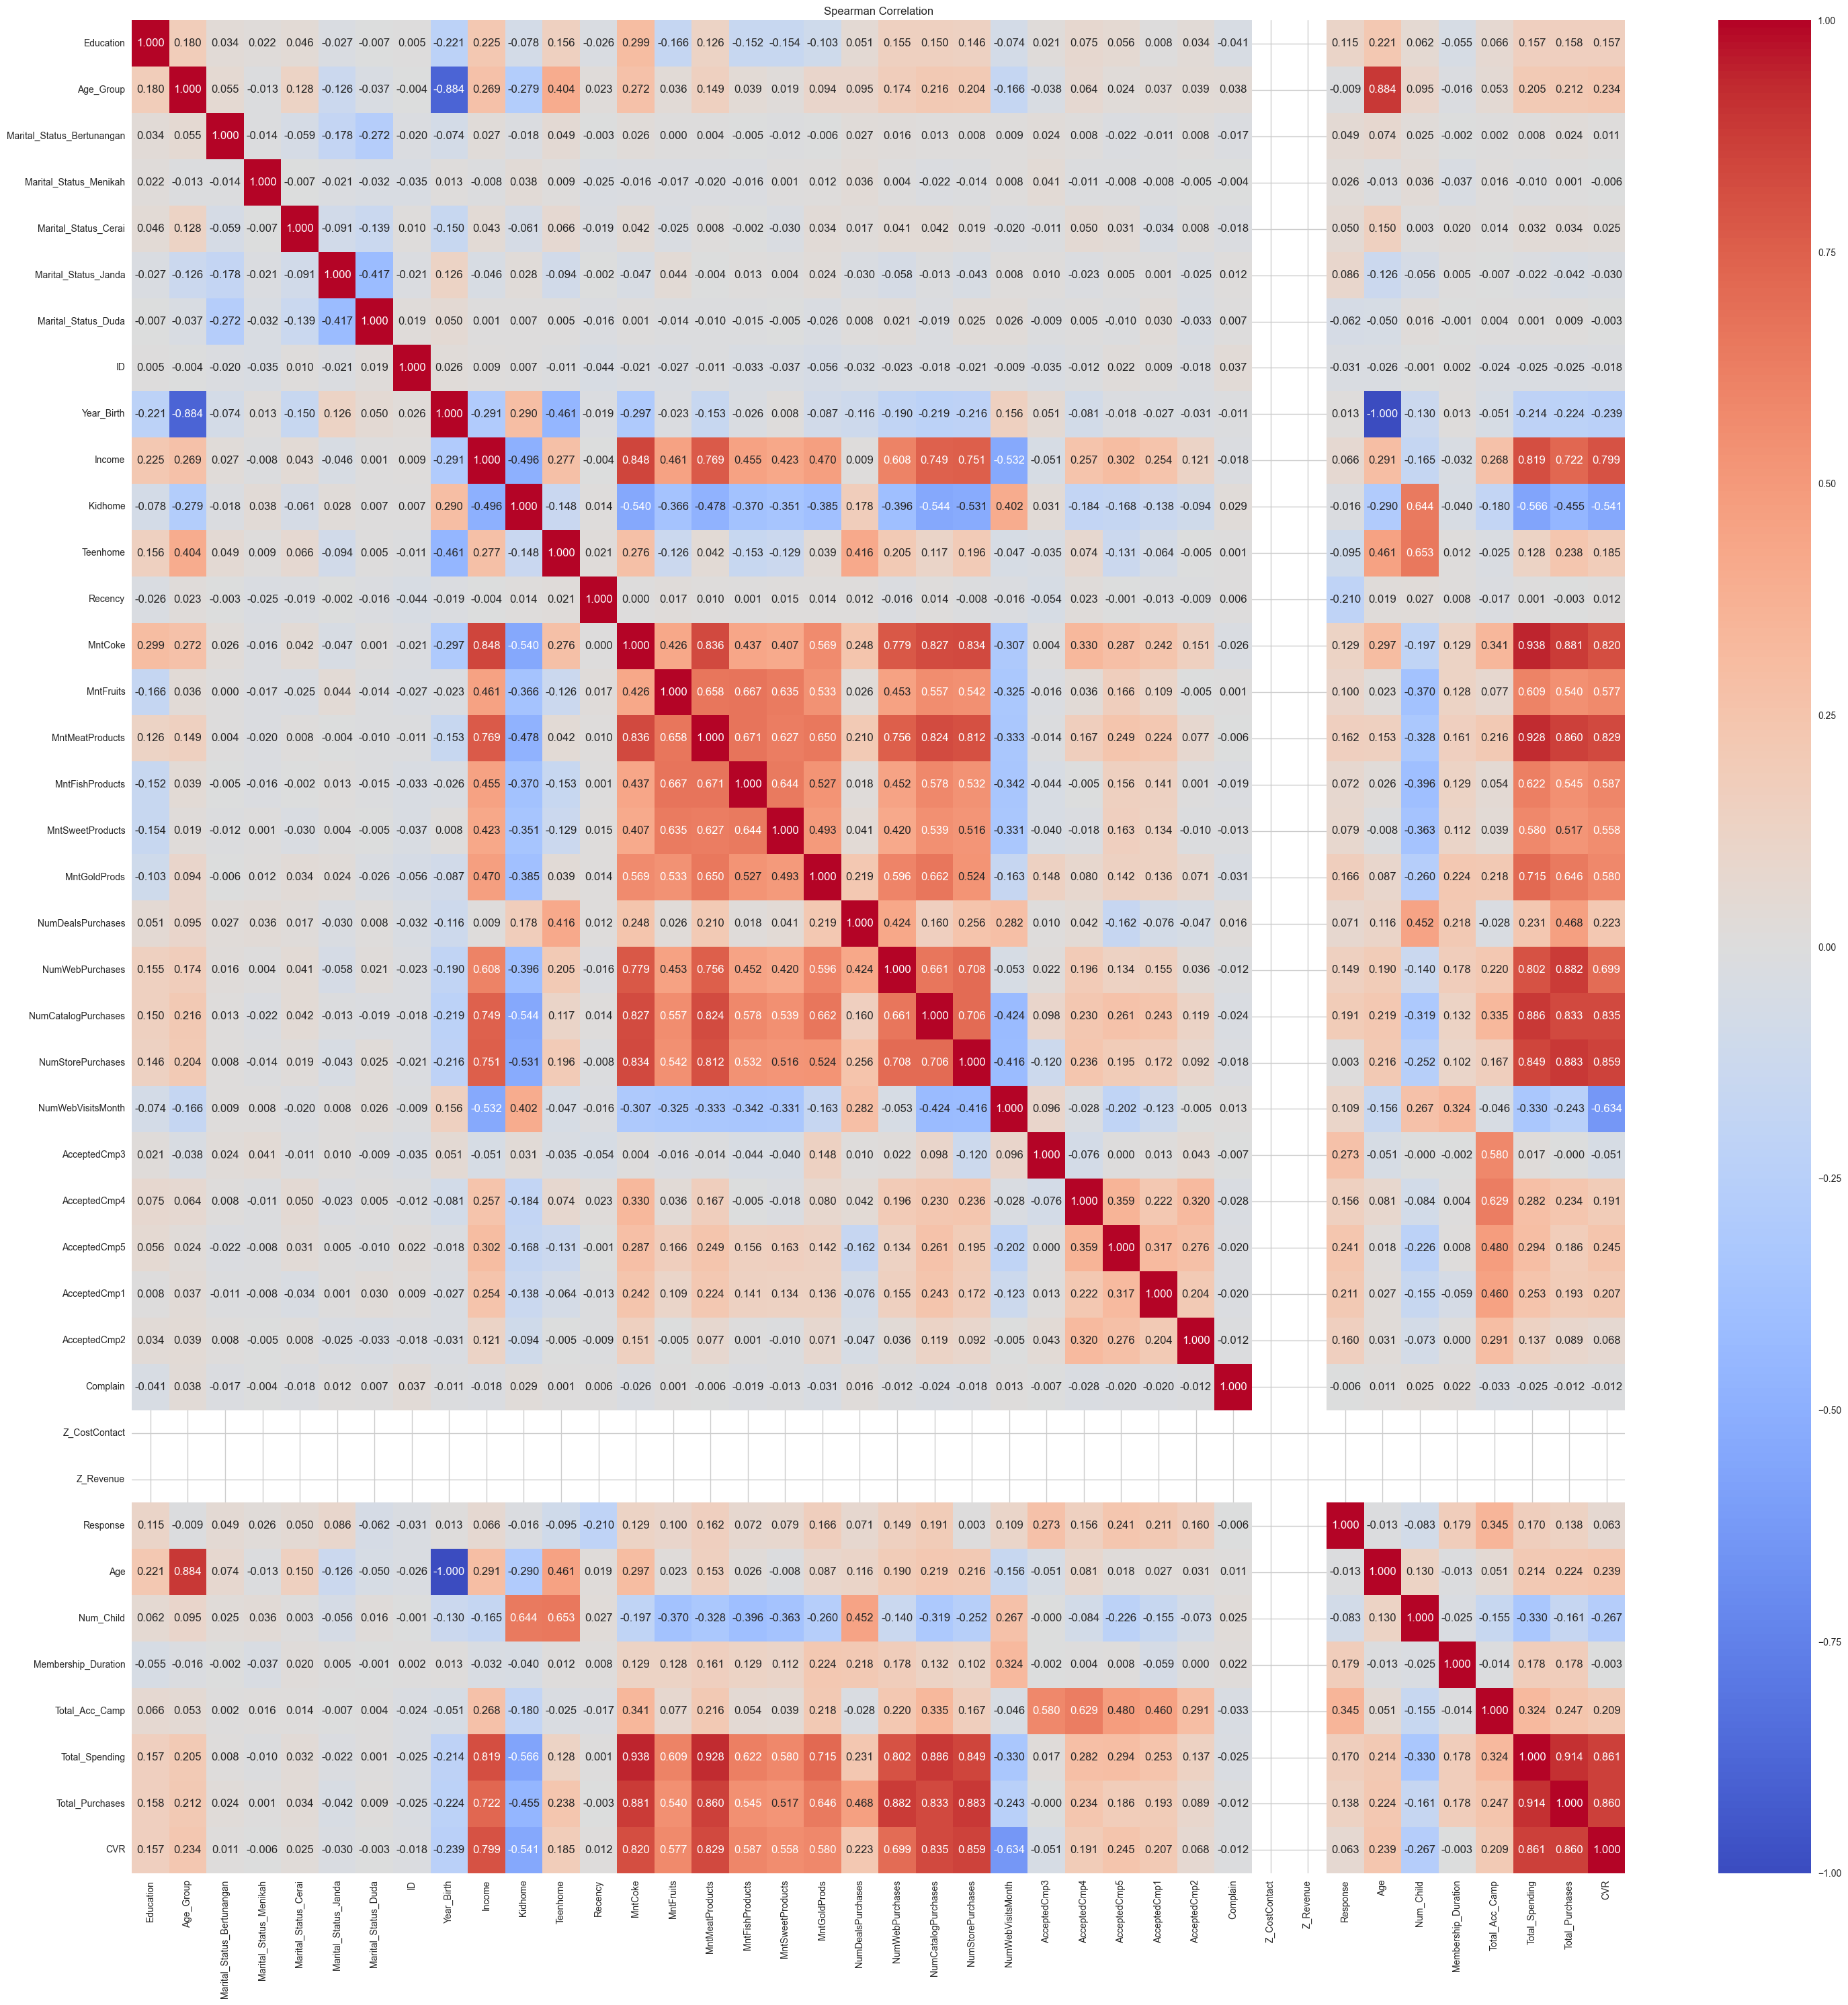

In [396]:
# Correlation heatmap of numerical features
plot_correlation_heatmap(df=df_preprocessed,
                         col_series=df_preprocessed.select_dtypes(['int', 'float']).columns,
                         corr_method='spearman',
                         figsize=(30, 30))

Now we would need to drop some unnecessary/unrelated/unclear definition columns before building our model, features that will be drop are :
> `ID`, `Year_Birth`, `Dt_Customer`, `Z_CostContact`, `Z_Revenue`, `Response`

It's still unsure at this point whether we should keep the related column for
- Individual items of spendings (`'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'`)

- Purchases (`'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'`)

- Individual level accepted campaign (`'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'`)

- Amount of kids (`Kidhome`, `Teenhome`)

We will just experiment with both of the cases where they are included and not.

In [397]:
# Drop unnecessary columns
df_preprocessed.drop(columns=['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Response'], inplace=True)

## Feature Scaling

In [398]:
len(df_preprocessed.columns)

35

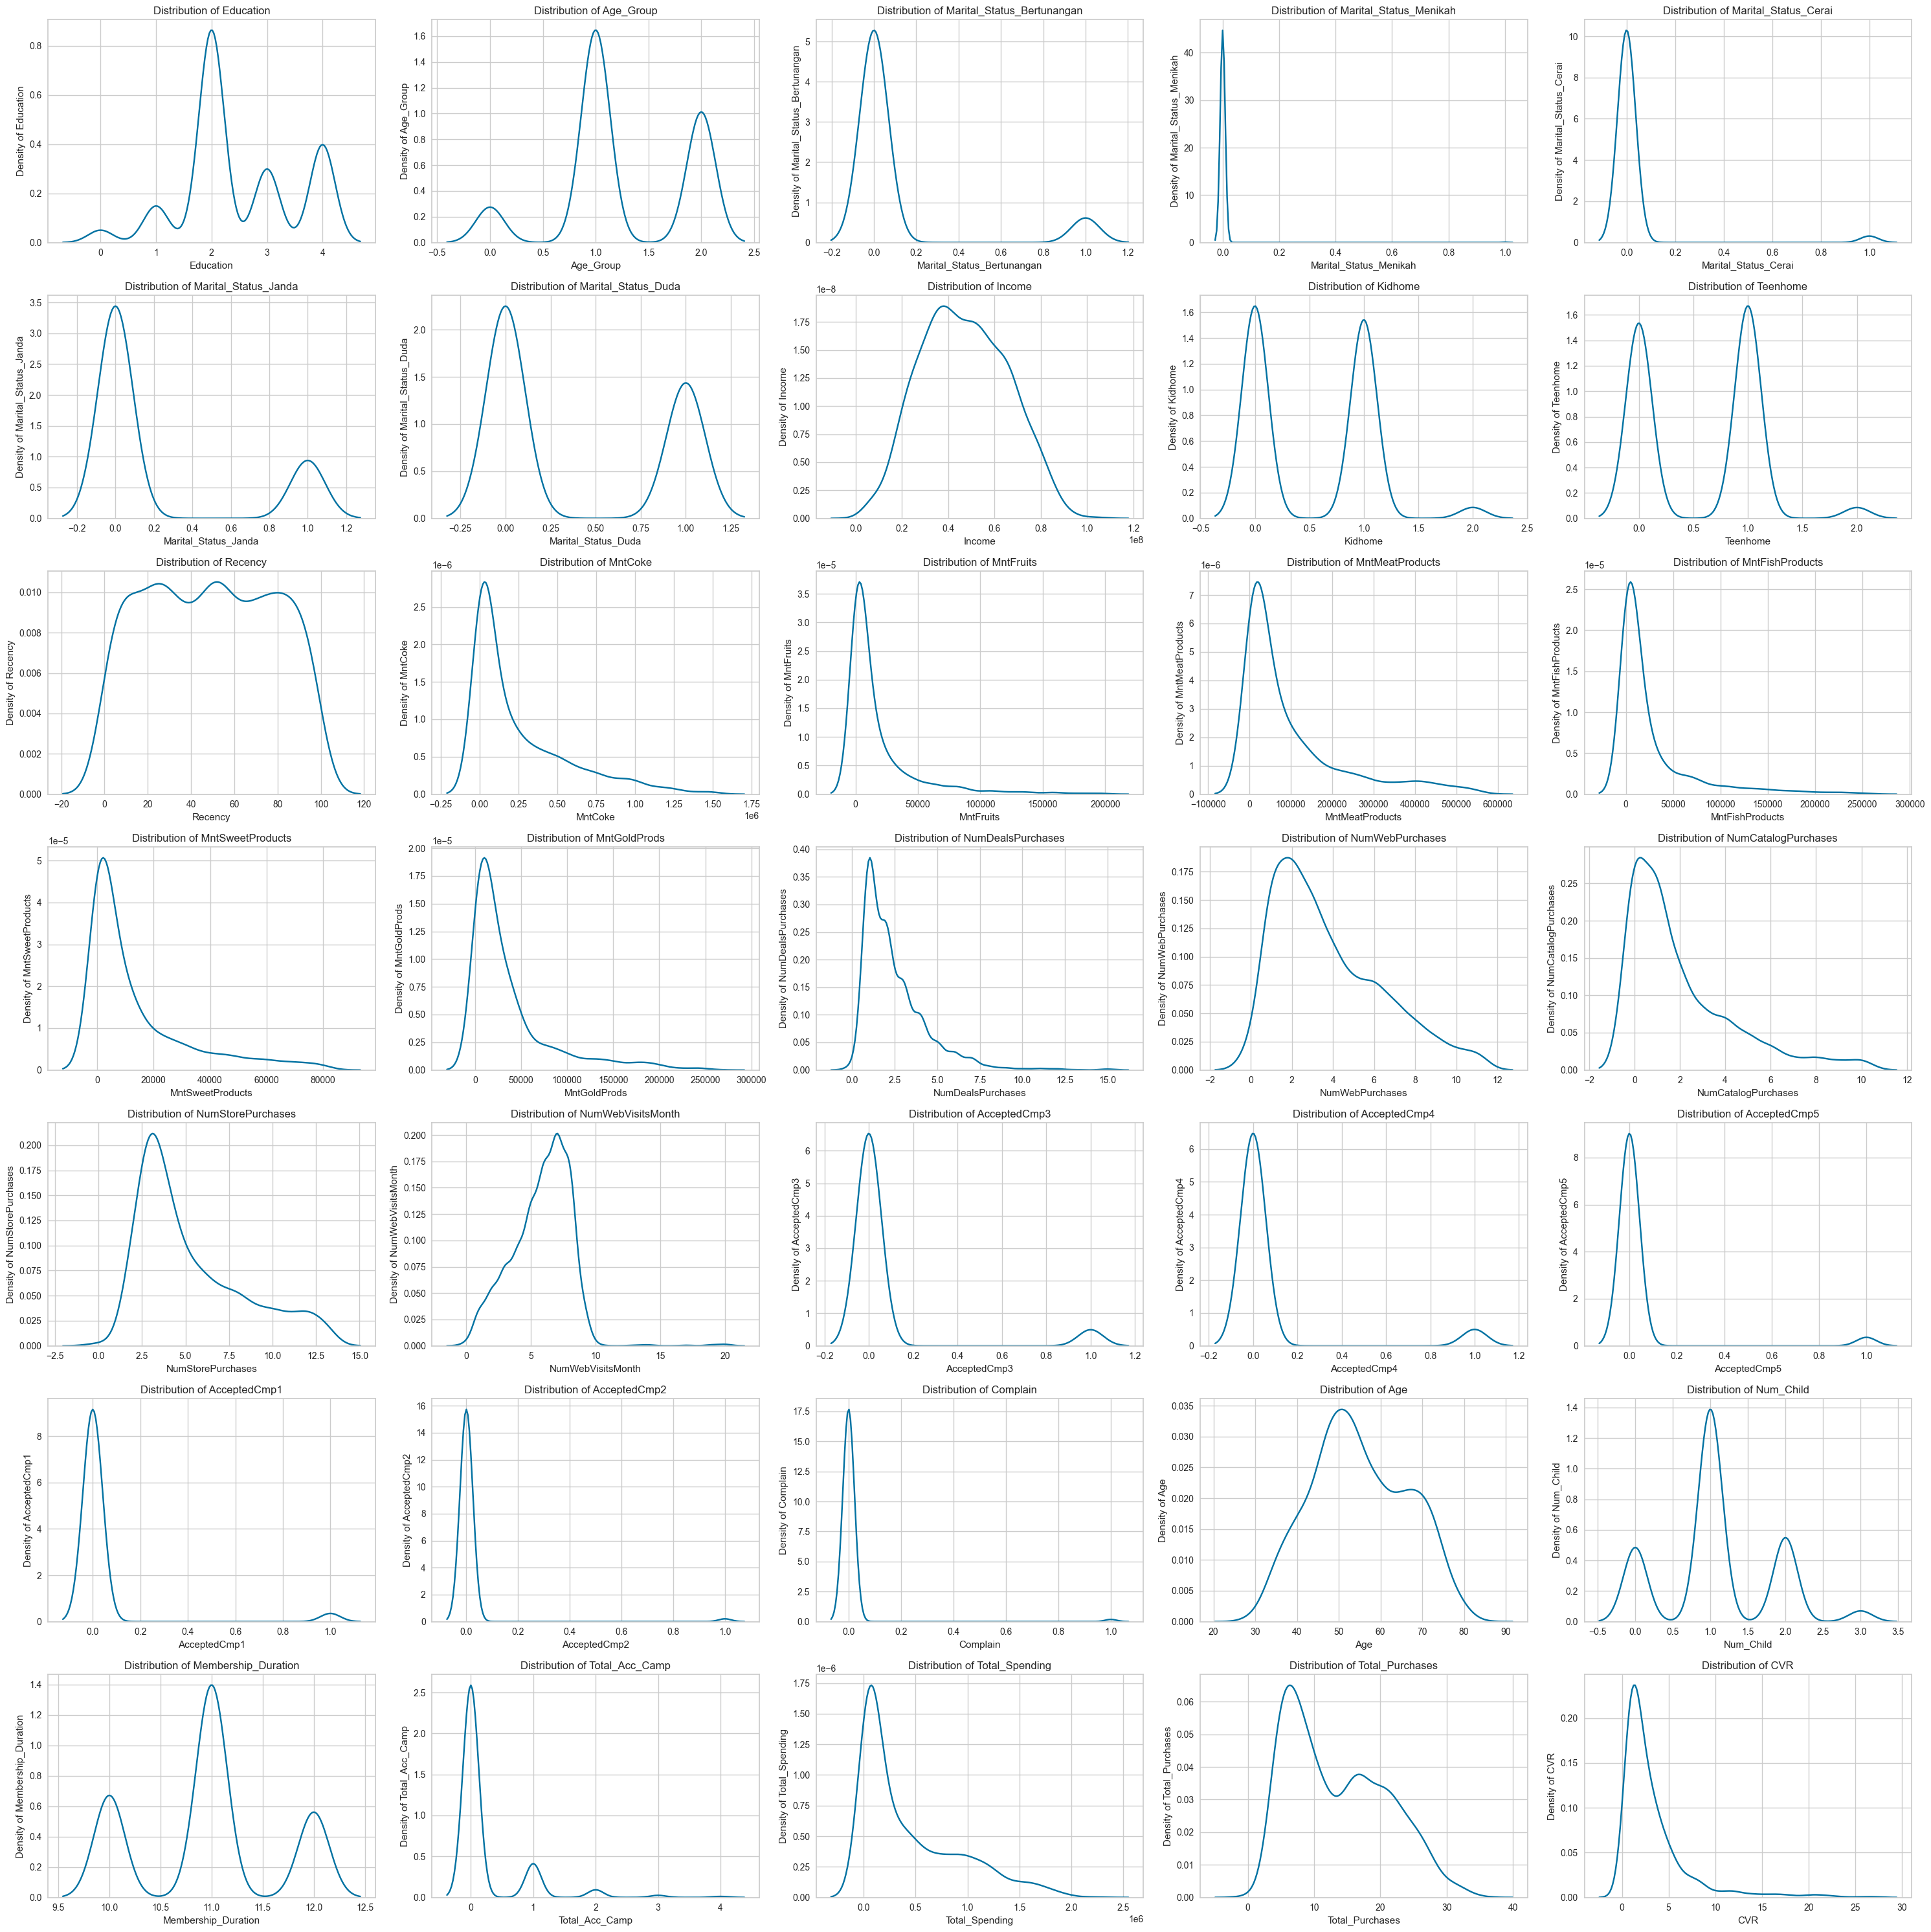

In [399]:
# Kdeplot before scaling
plot_dynamic_hisplots_kdeplots(df=df_preprocessed,
                               col_series=df_preprocessed.columns,
                               plot_type='kdeplot',
                               ncols=5,
                               figsize=(30, 30))

In [400]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# Encoding features based on distribution and characterization function
def scale_features(df):
    """
    Scale features using appropriate scaling methods based on their distributions.
    Applies log transformation to heavily skewed features before scaling.
    
    Parameters:
    df: Input DataFrame with features to be scaled
    
    Returns:
    DataFrame: Scaled features in a DataFrame with the same structure
    dict: Fitted scalers for future use
    """
    # Create copies to avoid modifying original data
    df_preprocessed = df.copy()
    
    # Initialize scalers
    robust_scaler = RobustScaler(quantile_range=(5, 95))
    standard_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    # Features that need log transformation (heavily skewed even after outlier handling)
    log_transform_features = [
        'MntCoke',
        'MntFruits',
        'MntMeatProducts',
        'MntFishProducts',
        'MntSweetProducts',
        'MntGoldProds',
        'Total_Spending',
        'CVR'
    ]
    
    # Other monetary features (highly skewed with long tails) that might not need log transform (if outliers handled) - RobustScaler
    skewed_outliers_features = []
    
    # Count features (discrete but representing actual quantities) - MinMaxScaler
    count_features = [
        'NumWebVisitsMonth',
        'NumDealsPurchases',
        'NumWebPurchases',
        'NumCatalogPurchases',
        'NumStorePurchases',
        'Total_Purchases'
    ]
    
    # Features with more normal-like distributions - StandardScaler
    standard_features = [
        'Income',
        'Age',
        'Recency',
        'Membership_Duration'  # Though multimodal, it represents actual time periods
    ]
    
    # Features to skip scaling:
    # Binary categorical (0/1):
    # - AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5
    # - Response
    # - Complain
    # Multi-modal categorical/ordinal/nominal:
    # - Marital_Status one-hot encoded columns (Scaling would distort their meaning as dummy variables)
    # - Education
    # - Age_Group
    # - Kidhome, Teenhome, Num_Child (Small discrete values 0,1,2,3 representing counts, scaling might unnecessarily distort their interpretability in the clustering process)

    # Apply log transformation (log1p to handle zeros)
    for feature in log_transform_features:
        if feature in df_preprocessed.columns:
            df_preprocessed[feature] = np.log1p(df_preprocessed[feature])

    # Scale log-transformed features
    if log_transform_features:
        # You might still want to scale after log transformation to standardize the range
        df_preprocessed[log_transform_features] = standard_scaler.fit_transform(df_preprocessed[log_transform_features])
    
    # Scale monetary features
    if skewed_outliers_features:
        df_preprocessed[skewed_outliers_features] = robust_scaler.fit_transform(df_preprocessed[skewed_outliers_features])
    
    # Scale count-based features
    if count_features:
        df_preprocessed[count_features] = minmax_scaler.fit_transform(df_preprocessed[count_features])
    
    # Scale normally distributed features
    if standard_features:
        df_preprocessed[standard_features] = standard_scaler.fit_transform(df_preprocessed[standard_features])
    
    # Store fitted scalers for future use
    scalers = {
        'robust': robust_scaler,
        'minmax': minmax_scaler,
        'standard': standard_scaler,
        'log_features': log_transform_features  # Store which features were log transforme
    }
    
    return df_preprocessed, scalers

In [401]:
# Scale features function implementation
df_preprocessed, scalers = scale_features(df_preprocessed)

# # To scale new data using specific scalers on specific columns (optional)
# new_data_scaled = pd.DataFrame(scalers['robust'].fit_transform(new_data[feature_series]), columns=feature_series)

In [402]:
# Check values in dataframe after scaling process
df_preprocessed

Education  Age_Group  Marital_Status_Bertunangan  \
0           2.0        2.0                         0.0   
1           2.0        1.0                         0.0   
2           2.0        1.0                         0.0   
3           4.0        1.0                         0.0   
4           3.0        1.0                         0.0   
...         ...        ...                         ...   
1856        2.0        1.0                         0.0   
1857        4.0        2.0                         0.0   
1858        2.0        1.0                         1.0   
1859        3.0        2.0                         0.0   
1860        4.0        2.0                         0.0   

      Marital_Status_Menikah  Marital_Status_Cerai  Marital_Status_Janda  \
0                        0.0                   0.0                   1.0   
1                        0.0                   0.0                   0.0   
2                        0.0                   0.0                   0.0   
3                        0.0                   0.0                   0.0   
4                        0.0                   0.0                   0.0   
...                      ...                   ...                   ...   
1856                     0.0                   0.0                   0.0   
1857                     0.0                   0.0                   0.0   
1858                     0.0                   0.0                   0.0   
1859                     0.0                   0.0                   0.0   
1860                     0.0                   0.0                   0.0   

      Marital_Status_Duda    Income  Kidhome  Teenhome   Recency   MntCoke  \
0                     0.0 -0.035126        1         1 -0.369001 -0.910039   
1                     0.0  1.326298        0         0 -0.783785  0.854362   
2                     0.0 -1.096400        1         0 -0.783785 -0.910039   
3                     1.0  0.608653        1         0  1.566660  0.419520   
4                     0.0  0.836015        0         1 -1.129439  0.950576   
...                   ...       ...      ...       ...       ...       ...   
1856                  1.0 -0.677505        1         0  1.117311 -1.536884   
1857                  0.0  0.916885        2         1  0.253176  0.831159   
1858                  0.0  0.537966        0         0  1.462964  1.219554   
1859                  0.0  1.198717        0         1 -1.405962  0.856622   
1860                  1.0  0.316423        1         1 -0.299870  0.070897   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0     -0.089697        -1.286292        -0.008007         -0.048988   
1      0.913238         0.784106         0.999728          0.730407   
2      0.267452        -0.469699         0.395760          0.232173   
3      0.879569         0.734249         0.778684          0.794761   
4      0.873503         0.608275        -1.915480          0.907901   
...         ...              ...              ...               ...   
1856   0.193319        -1.181745         0.267591          0.128384   
1857  -1.870553        -0.194677        -1.915480         -1.818177   
1858   0.907923         1.147484         0.687620          0.587110   
1859   0.786774         1.138041         0.917546          0.821740   
1860   0.193319         0.286695        -0.008007         -0.048988   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0        -0.425876           0.133333         0.090909                  0.1   
1         0.532627           0.066667         0.727273                  0.2   
2        -0.515673           0.133333         0.181818                  0.0   
3         0.025448           0.333333         0.454545                  0.3   
4        -0.008536           0.133333         0.545455                  0.4   
...            ...                ...              ...                  ...   
1856     -0.226168           0.066667         0.09090

In [403]:
# Check the mean and standard deviation for standardization features (should be mean 0 and std 1 after standardization)
df_preprocessed.describe().transpose()[['mean', 'std']]

mean       std
Education                   2.480924e+00  1.020903
Age_Group                   1.251478e+00  0.612727
Marital_Status_Bertunangan  1.037077e-01  0.304963
Marital_Status_Menikah      1.612037e-03  0.040129
Marital_Status_Cerai        2.955400e-02  0.169399
Marital_Status_Janda        2.144009e-01  0.410516
Marital_Status_Duda         3.895755e-01  0.487785
Income                     -1.756312e-16  1.000269
Kidhome                     5.222998e-01  0.548862
Teenhome                    5.593767e-01  0.546095
Recency                     1.221782e-16  1.000269
MntCoke                     1.236100e-16  1.000269
MntFruits                   1.909035e-18  1.000269
MntMeatProducts             1.374505e-16  1.000269
MntFishProducts            -3.818070e-18  1.000269
MntSweetProducts           -1.527228e-17  1.000269
MntGoldProds               -1.317234e-16  1.000269
NumDealsPurchases           1.643919e-01  0.124349
NumWebPurchases             3.442919e-01  0.238125
NumCatalogPurchases         2.002687e-01  0.232853
NumStorePurchases           4.084239e-01  0.235907
NumWebVisitsMonth           2.896830e-01  0.111712
AcceptedCmp3                7.039226e-02  0.255876
AcceptedCmp4                7.146695e-02  0.257672
AcceptedCmp5                3.815153e-02  0.191613
AcceptedCmp1                3.707684e-02  0.189001
AcceptedCmp2                1.289629e-02  0.112858
Complain                    1.020956e-02  0.100552
Age                        -1.622680e-16  1.000269
Num_Child                   1.081677e+00  0.721254
Membership_Duration         7.788862e-16  1.000269
Total_Acc_Camp              2.299839e-01  0.574347
Total_Spending              1.889944e-16  1.000269
Total_Purchases             3.875796e-01  0.211959
CVR                         5.459839e-16  1.000269

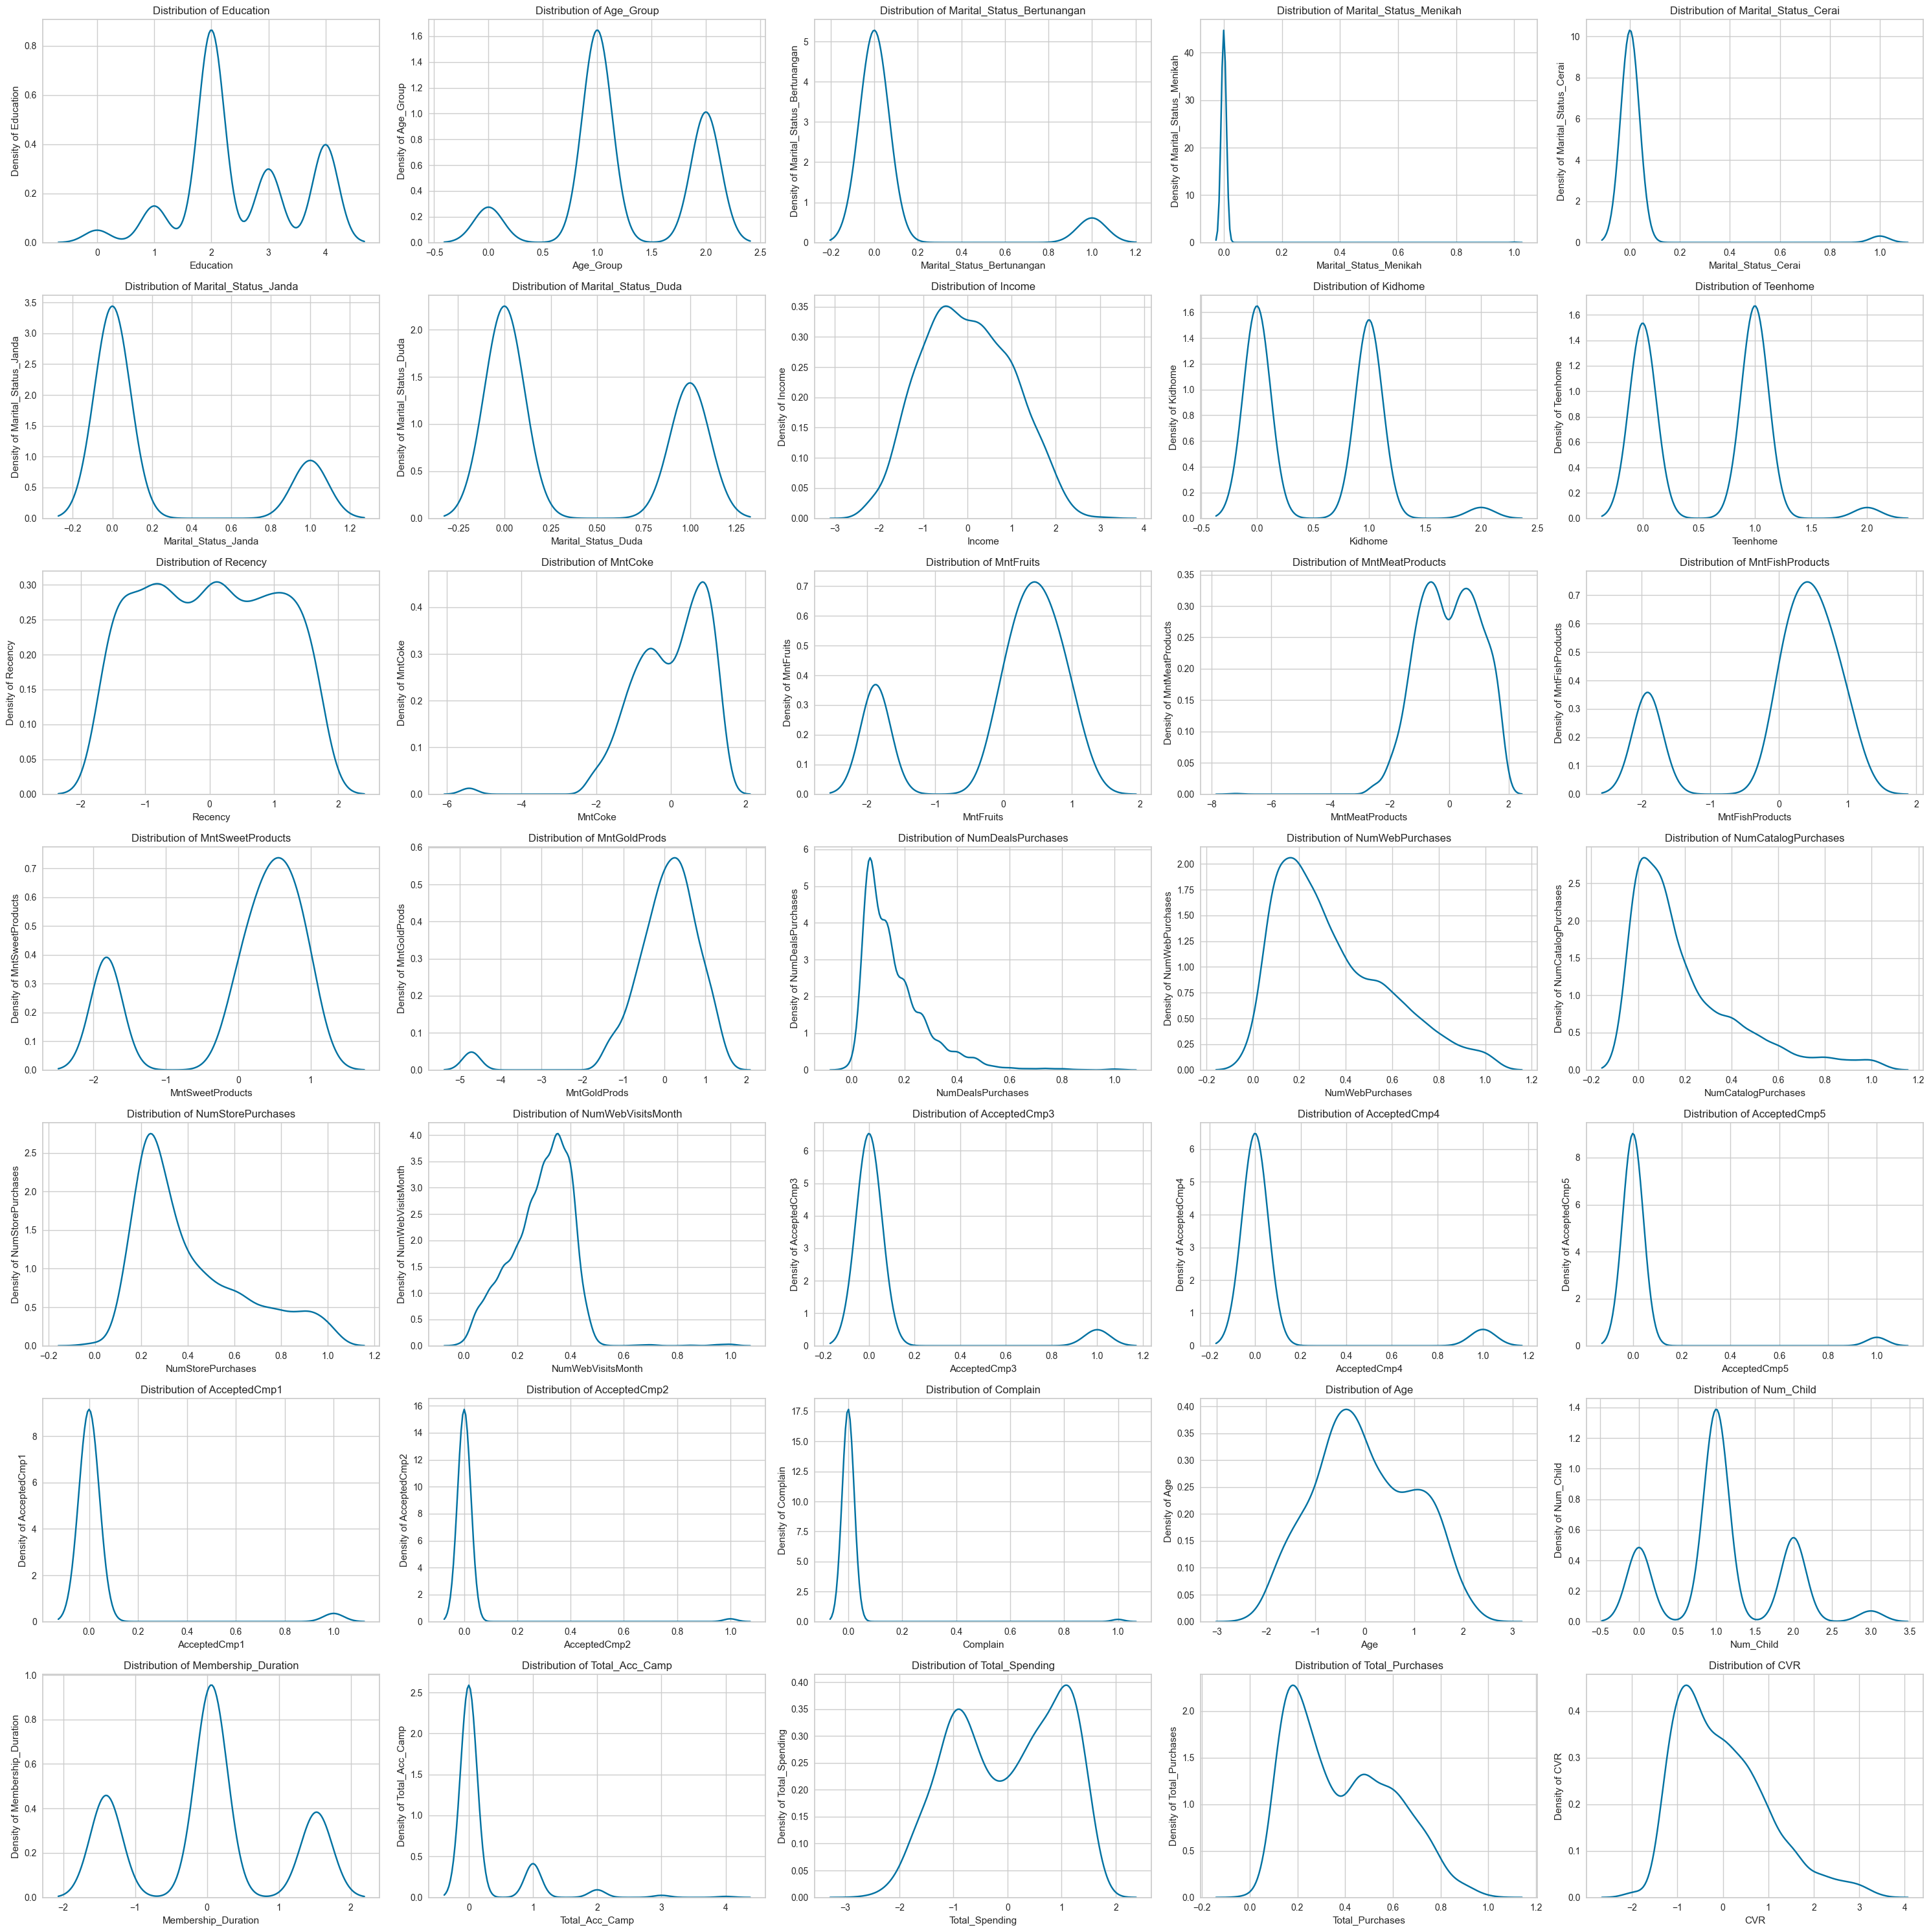

In [404]:
# Kdeplot before scaling
plot_dynamic_hisplots_kdeplots(df=df_preprocessed,
                               col_series=df_preprocessed.columns,
                               plot_type='kdeplot',
                               ncols=5,
                               figsize=(30, 30))

# **Task 3 : Clustering With K-means**

In [405]:
# Make copy of dataframe for modelling process
df_model = df_preprocessed.copy()

## PCA

Because we have so many features, we will need to reduce them without throwing information away using PCA.

In [406]:
from sklearn.decomposition import PCA

# First fit PCA without specifying n_components to see all variance ratios
pca_full = PCA()
pca_full.fit(df_model)

# Look at explained variance ratio for each component
print("Individual explained variance ratios:")
for i, ratio in enumerate(pca_full.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.3%}")

# Look at cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
print("\nCumulative explained variance:")
for i, cum_var in enumerate(cumulative_variance):
    print(f"First {i+1} PCs: {cum_var:.3%}")

Individual explained variance ratios:
PC1: 34.545%
PC2: 14.289%
PC3: 7.185%
PC4: 6.643%
PC5: 6.222%
PC6: 4.831%
PC7: 3.941%
PC8: 3.768%
PC9: 3.227%
PC10: 3.155%
PC11: 2.111%
PC12: 1.864%
PC13: 1.568%
PC14: 1.337%
PC15: 1.142%
PC16: 0.879%
PC17: 0.690%
PC18: 0.431%
PC19: 0.393%
PC20: 0.353%
PC21: 0.350%
PC22: 0.205%
PC23: 0.156%
PC24: 0.143%
PC25: 0.141%
PC26: 0.114%
PC27: 0.108%
PC28: 0.067%
PC29: 0.063%
PC30: 0.052%
PC31: 0.017%
PC32: 0.010%
PC33: 0.000%
PC34: 0.000%
PC35: 0.000%

Cumulative explained variance:
First 1 PCs: 34.545%
First 2 PCs: 48.834%
First 3 PCs: 56.019%
First 4 PCs: 62.662%
First 5 PCs: 68.884%
First 6 PCs: 73.714%
First 7 PCs: 77.655%
First 8 PCs: 81.423%
First 9 PCs: 84.651%
First 10 PCs: 87.806%
First 11 PCs: 89.917%
First 12 PCs: 91.781%
First 13 PCs: 93.349%
First 14 PCs: 94.686%
First 15 PCs: 95.828%
First 16 PCs: 96.707%
First 17 PCs: 97.397%
First 18 PCs: 97.828%
First 19 PCs: 98.221%
First 20 PCs: 98.574%
First 21 PCs: 98.924%
First 22 PCs: 99.129%
First 2

> Reminder on PCA usage:

- You can set n_components in different ways:

    - As an integer (e.g., n_components=2)
    - As a float between 0 and 1 (e.g., n_components=0.95) to keep enough components to explain that proportion of variance
    - Without specifying to see all components

- To check explained variance, use:

    - `pca.explained_variance_ratio_`: shows how much variance each component explains
    - `np.cumsum(pca.explained_variance_ratio_`: shows cumulative explained variance

- Common threshold guidelines:

    - 80-85%: Minimum recommended explained variance
    - 90%: Good threshold for most applications
    - 95%: Very conservative, might keep more components than needed

- When you use n_components=2, you're essentially projecting your 35-dimensional data onto 2 dimensions, but this doesn't mean you're keeping all the information. You're only keeping the amount of variance that those 2 principal components can explain. For example in this case we see :

    - PC1 explains 34.5% of variance
    - PC2 explains 14.2% of variance
    - Total: 48.3% of variance explained (can be seen from the cumulative/running total variance)
    - You've "lost" 51.3% of the information in your data

    This is why it's important to check the explained variance before deciding on the number of components. If 2 components only explain <50% of the variance, you might want to consider keeping more components to retain more information from your original data.

> Reminder on explained variance and cumulative variance definition :

- Explained Variance (Individual Variance):

    - Shows how much of the total variability in your data is explained by EACH principal component individually
    - It's like each PC's individual contribution to explaining the data's variation
    - Usually decreases as you go from PC1 to PCn (first component explains most variance, then second, etc.)

- Cumulative Variance:

    - The running total of explained variance as you add each component
    - Shows how much total variance is explained when you include all components up to that point
    - Always increases as you add more components
    - Helps you decide how many components to keep

- Why they're important:
    - Explained Variance helps you:
        - Identify which components are most important
        - Understand how much information each new component adds
        - Spot where additional components stop adding significant value

    - Cumulative Variance helps you:
        - Decide how many components to keep
        - Ensure you're retaining enough information overall
        - Choose a cutoff point

In [407]:
# Once we see the variance explained, we can choose n_components values

# # Either specify exact number:
# pca = PCA(n_components=2)

# or specify variance to preserve:
pca = PCA(n_components=0.85)  # Keep components that explain percentage of variance

# Transform data
data_pca = pca.fit_transform(df_model)
df_pca = pd.DataFrame(data_pca, columns=[f'PC {i+1}' for i in range(data_pca.shape[1])])

In [408]:
# Check the transformed dataframe
df_pca

PC 1      PC 2      PC 3      PC 4      PC 5      PC 6      PC 7  \
0     1.998119  0.582371 -0.923577  1.909844  1.055404 -0.385829  0.647674   
1    -2.768624 -0.852591  0.391715  0.274128  0.860939  0.079685 -0.631619   
2     1.856081 -1.487053  1.262360  0.932153  0.639819  0.047974  0.459691   
3    -1.451078 -0.343740  1.324797  1.164273 -1.834361  0.964662  1.212243   
4    -1.573924  0.868713  0.685917 -0.564256  0.897493 -0.105556  0.307083   
...        ...       ...       ...       ...       ...       ...       ...   
1856  2.452735 -1.439027 -0.584783  0.508699 -0.846178  0.413743 -0.077393   
1857  0.405990  4.689903 -0.104147  0.437139 -0.369177 -1.295054  0.992875   
1858 -2.344164 -1.031520  1.222687  1.124125 -1.645492 -0.423026 -0.561603   
1859 -3.149002  0.671314  0.327938  1.460923  1.712667 -0.129799  0.635106   
1860 -0.283504  1.346855 -1.560772 -1.070820  0.549940  1.155442  0.874119   

          PC 8      PC 9     PC 10  
0     0.130419 -0.170276 -0.048061  
1     0.096181  0.006308 -0.131514  
2    -0.112834 -0.314105 -0.134376  
3    -0.581691 -0.595022  0.102324  
4     0.318586  0.207156  2.188023  
...        ...       ...       ...  
1856 -0.277050 -0.159245 -0.013288  
1857  0.179696 -0.087761 -0.049119  
1858 -0.075890 -0.123979  0.216373  
1859 -0.346646 -0.231985 -0.147994  
1860 -0.205741 -0.459752  0.087984  

[1861 rows x 10 columns]

## Finding Optimal Cluster Using Elbow Method, Silhouette Score, Calinski-Harabasz Index (CH Index), and Davies-Bouldin Index (DB Index)

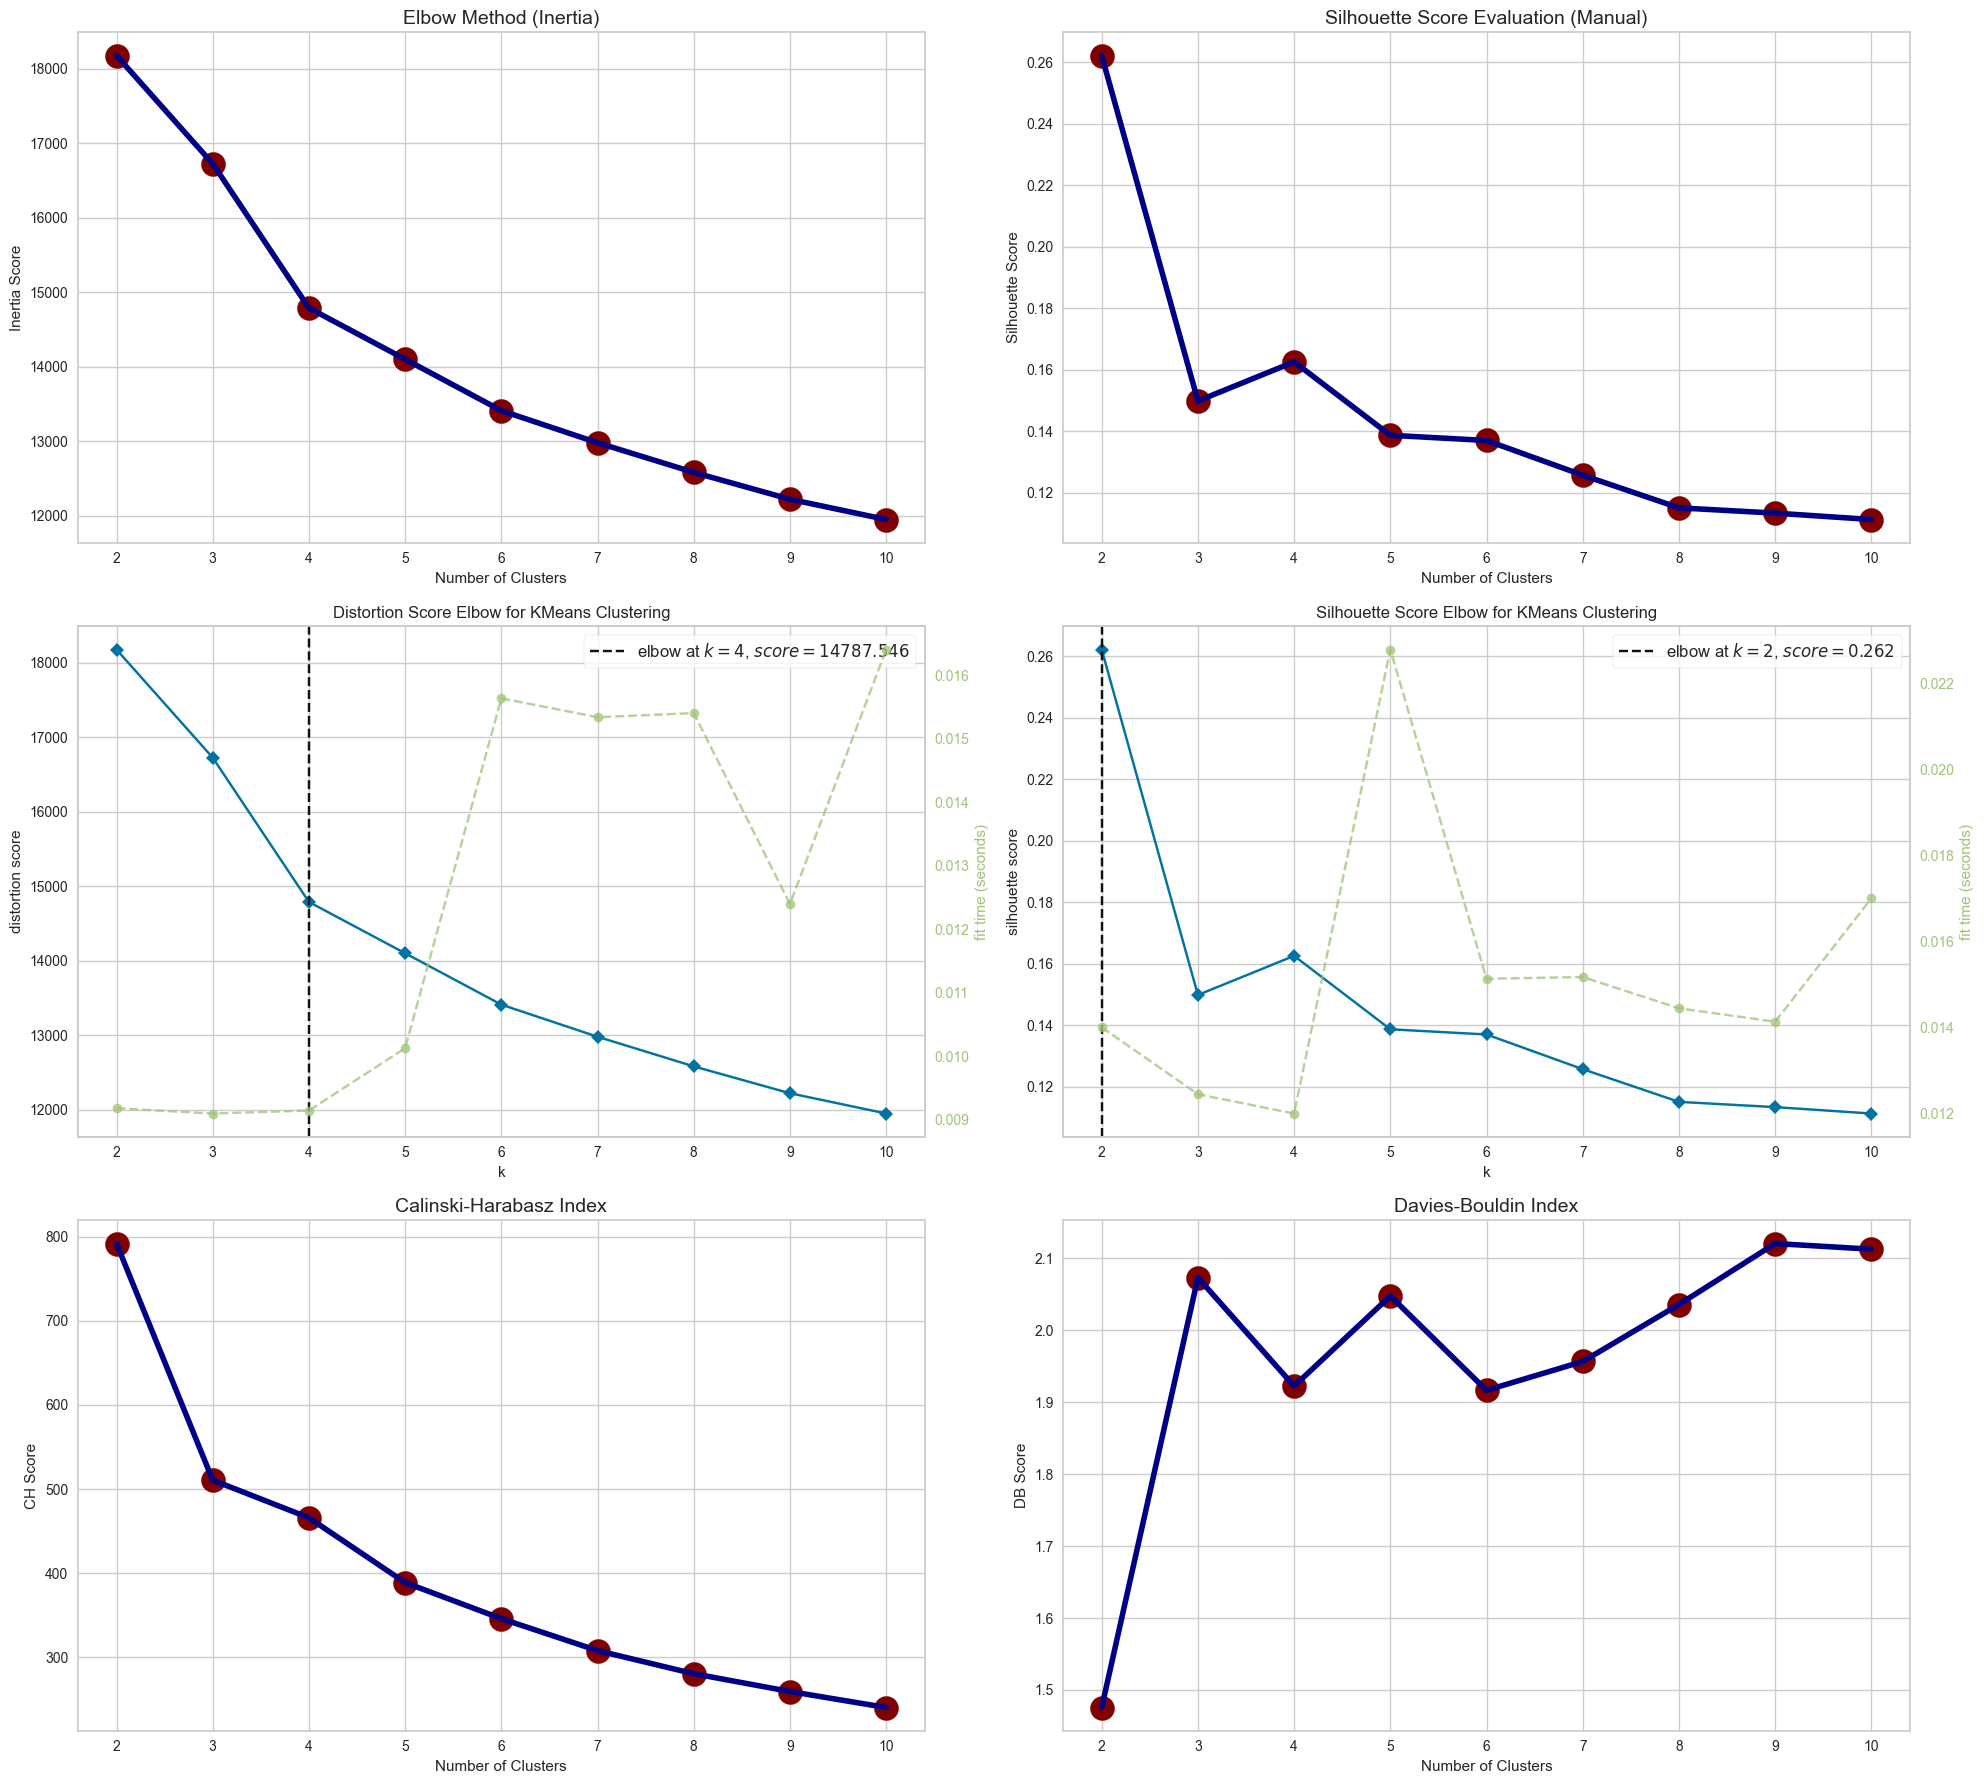


Manual Inertia scores for each k:
k=2: 18176.566
k=3: 16724.713
k=4: 14787.546
k=5: 14099.323
k=6: 13409.571
k=7: 12978.200
k=8: 12580.563
k=9: 12219.801
k=10: 11947.618

Manual Inertia reduction percentage for each k:
0     7.987501
1    11.582664
2     4.654068
3     4.892092
4     3.216895
5     3.063880
6     2.867614
7     2.227394
8          NaN
dtype: float64

Manual Silhouette scores for each k:
k=2: 0.262
k=3: 0.150
k=4: 0.163
k=5: 0.139
k=6: 0.137
k=7: 0.126
k=8: 0.115
k=9: 0.113
k=10: 0.111

Yellowbrick detected elbow points:
Distortion metric: k=4
Silhouette metric: k=2

Manual Calinski-Harabasz scores for each k:
k=2: 791.844
k=3: 510.706
k=4: 465.954
k=5: 388.975
k=6: 346.093
k=7: 308.107
k=8: 280.659
k=9: 259.525
k=10: 240.502

Manual Davies-Bouldin scores for each k:
k=2: 1.476
k=3: 2.073
k=4: 1.923
k=5: 2.048
k=6: 1.917
k=7: 1.957
k=8: 2.036
k=9: 2.121
k=10: 2.113


In [409]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer

# Create lists to store scores
inertia = []
silhouette_scores = []
ch_scores = []
db_scores = []

# Calculate inertia, silhouette, CH, and DB scores
for i in range(2, 11):  # Note: silhouette score needs at least 2 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)

    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df_pca, labels))
    ch_scores.append(calinski_harabasz_score(df_pca, labels))
    db_scores.append(davies_bouldin_score(df_pca, labels))

# Create a figure with 6 subplots (3x2)
fig = plt.figure(figsize=(20, 18))

# Plot 1: Elbow Method with Inertia (top-left)
plt.subplot(321)
plt.plot(range(2, 11), inertia, color='#000087', linewidth=4)
plt.scatter(range(2, 11), inertia, s=300, color='#800000')
plt.title('Elbow Method (Inertia)', fontsize=14)
plt.ylabel('Inertia Score')
plt.xlabel('Number of Clusters')

# Plot 2: Manual Silhouette Scores (top-right)
plt.subplot(322)
plt.plot(range(2, 11), silhouette_scores, color='#000087', linewidth=4)
plt.scatter(range(2, 11), silhouette_scores, s=300, color='#800000')
plt.title('Silhouette Score Evaluation (Manual)', fontsize=14)
plt.ylabel('Silhouette Score')
plt.xlabel('Number of Clusters')

# Plot 3: Yellowbrick KElbow Visualizer with Distortion (middle-left)
plt.subplot(323)
model_distortion = KMeans(random_state=42)
visualizer_distortion = KElbowVisualizer(model_distortion, k=(2,11),
                                         metric='distortion',
                                         timings=True,
                                         locate_elbow=True)
visualizer_distortion.fit(df_pca)
visualizer_distortion.finalize()

# Plot 4: Yellowbrick KElbow Visualizer with Silhouette (middle-right)
plt.subplot(324)
model_silhouette = KMeans(random_state=42)
visualizer_silhouette = KElbowVisualizer(model_silhouette, k=(2,11),
                                         metric='silhouette',
                                         timings=True,
                                         locate_elbow=True)
visualizer_silhouette.fit(df_pca)
visualizer_silhouette.finalize()

# Plot 5: Calinski-Harabasz Index (bottom-left)
plt.subplot(325)
plt.plot(range(2, 11), ch_scores, color='#000087', linewidth=4)
plt.scatter(range(2, 11), ch_scores, s=300, color='#800000')
plt.title('Calinski-Harabasz Index', fontsize=14)
plt.ylabel('CH Score')
plt.xlabel('Number of Clusters')

# Plot 6: Davies-Bouldin Index (bottom-right)
plt.subplot(326)
plt.plot(range(2, 11), db_scores, color='#000087', linewidth=4)
plt.scatter(range(2, 11), db_scores, s=300, color='#800000')
plt.title('Davies-Bouldin Index', fontsize=14)
plt.ylabel('DB Score')
plt.xlabel('Number of Clusters')

plt.tight_layout()
plt.show()

# Print the manual inertia score
print("\nManual Inertia scores for each k:")
for k, score in enumerate(inertia, 2):
    print(f"k={k}: {score:.3f}")

# Inertia reduction by cluster in percentage
print("\nManual Inertia reduction percentage for each k:")
print((pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100)

# Print the manual Silhouette scores
print("\nManual Silhouette scores for each k:")
for k, score in enumerate(silhouette_scores, 2):
    print(f"k={k}: {score:.3f}")

# Print detected elbow for Yellowbrick inertia(distortion) and Silhouette scores
print(f"\nYellowbrick detected elbow points:")
print(f"Distortion metric: k={visualizer_distortion.elbow_value_}")
print(f"Silhouette metric: k={visualizer_silhouette.elbow_value_}")

# Print the manual Calinski-Harabasz scores
print("\nManual Calinski-Harabasz scores for each k:")
for k, score in enumerate(ch_scores, 2):
    print(f"k={k}: {score:.3f}")

# Print the manual Davies-Bouldin scores
print("\nManual Davies-Bouldin scores for each k:")
for k, score in enumerate(db_scores, 2):
    print(f"k={k}: {score:.3f}")

> **Reminder on Elbow method and Silhouette Scores :**

**Elbow Method:**
1. Definition:
   - Measures the total within-cluster sum of squares (WCSS) or inertia
   - Calculates the distance between data points and their cluster centroid
   - Shows how compact the clusters are, , with lower values indicating tighter, more cohesive clusters.

2. How it works:
   - As k increases, the inertia score always decreases
   - Initially, adding clusters gives large reductions in inertia
   - At some point, adding more clusters gives diminishing returns, where the rate of decrease in distortion begins to slow down
   - This point of diminishing returns looks like an "elbow" in the plot

3. How to determine optimal k:

   The rationale behind the Elbow Method is that as you increase the number of clusters, the distortion score tends to decrease because the centroids are closer to individual data points. However, beyond a certain point, adding more clusters may only marginally reduce the distortion score as the improvement in compactness diminishes. The "elbow" point represents the trade-off between minimizing distortion and avoiding overly complex models.

   - Look for the "elbow" point where the line starts to level off
   - This point represents where adding more clusters doesn't significantly improve the model
   - If the line decreases smoothly with no clear elbow, might need other methods

4. It is applied **before** running the final clustering, as the goal is to find the "elbow" or inflection point in the plot of inertia vs. number of clusters.

**Silhouette Score:**
1. Definition:
   - Measures how similar a point is to its own cluster compared to other clusters
   - Ranges from -1 to 1
   - Combines both cohesion (within-cluster) and separation (between-cluster) measures

2. How it works:
   - Score close to 1: Points are well clustered
   - Score around 0: Points are on the border between clusters
   - Score close to -1: Points might be assigned to wrong cluster

3. How to determine optimal k:
   - Look for the highest silhouette score
   - Consider local peaks if they align with other methods
   - Be cautious of very high scores with very few clusters (might be oversimplified)

4. It is calculated **before** the final clustering, as the goal is to find the number of clusters that maximizes the average silhouette score across all data points.

**Key Differences:**
```
Elbow Method                         | Silhouette Score
-------------------------------------|----------------------------------------
Measures cluster compactness         | Measures both compactness and separation
Always decreases with more clusters  | Can increase or decrease with more clusters
Looks for point of diminishing       | Looks for highest score or significant
returns                              | local peaks
Simpler to calculate                 | More computationally intensive
May have unclear elbow point         | Gives clear numeric score for comparison
```

**Best Practice for Using Both:**
1. Start with Elbow Method:
   - Get initial range of potential k values
   - Identify where diminishing returns start

2. Use Silhouette Score to refine:
   - Within the range identified by elbow method
   - Choose k with highest silhouette score
   - Consider local peaks if they make more sense for your data

3. Example decision process:
```python
# If you see this pattern:
# Elbow shows bend at k=4
# Silhouette scores:
# k=2: 0.65
# k=3: 0.55
# k=4: 0.52
# k=5: 0.48

# Decision making:
- Elbow suggests k=4 (diminishing returns after)
- Silhouette highest at k=2
- Might choose k=4 if:
  * Need more detailed clusters
  * Domain knowledge suggests more groups
- Might choose k=2 if:
  * Simpler model preferred
  * Very clear separation needed
```

**Remember: The final decision often depends on:**
- Your specific needs
- Domain knowledge
- Balance between model complexity and performance
- Agreement between different evaluation methods, if there's disagreement between methods, you can investigate why and make an informed decision

**Also important additional information about inertia value :**

The absolute values of inertia scores are not directly comparable between different preprocessing steps or different datasets - what's important is the relative change and pattern of the scores. Here's why:

1. What matters in Elbow Method:
- The PATTERN of decrease
- Where the rate of decrease slows down significantly
- The relative change between consecutive k values
- NOT the absolute values themselves

2. Why inertia values can be different:
- Preprocessing steps (scaling, normalization)
- Number of features
- Size of dataset
- Range of your data values

Let's analyze your two cases:
```python
# Your current scores
k=2: 18176 → k=3: 16724 (decrease of ~1452)
k=3: 16724 → k=4: 14787 (decrease of ~1937)
k=4: 14787 → k=5: 14099 (decrease of ~688)  # Notable slowdown here
k=5: 14099 → k=6: 13409 (decrease of ~690)
k=6: 13409 → k=7: 12978 (decrease of ~431)

# Your previous scores
k=2: 9500 → k=10: 2200 (different scale but same concept applies)
```

What to look for:
✅ Rate of change between k values
✅ Point where decrease slows down significantly
✅ Relative improvements rather than absolute values

Think of it like this:
```
Good interpretation:
"The decrease in inertia slows down significantly after k=4"

Wrong interpretation:
"The inertia score of 18176 is too high, so this is a bad result"
```

So in your case:
- The sharp decrease stops around k=4
- After k=4, the decreases become much smaller
- This suggests k=4 might be a good choice
- The fact that the values are higher than your previous preprocessing doesn't mean the clustering is worse

Remember: Always look at inertia scores in conjunction with other metrics (like silhouette score) for a more robust decision.

-------------------------------------------------------------------------------------------------------------------------------------------

> **Reminder on Calinski-Harabasz Index (CH Index) and the Davies-Bouldin Index (DB Index) :**

1. Calinski-Harabasz Index (CH Index):
   - The Calinski-Harabasz Index, also known as the variance ratio criterion, is a cluster evaluation metric that evaluates the goodness of a clustering solution.
   - The CH Index compares the between-cluster variance to the within-cluster variance, with the goal of finding the clustering that maximizes the between-cluster variance and minimizes the within-cluster variance.
   - The CH Index is calculated as:
     ```
     CH = (B / (K - 1)) / (W / (n - K))
     ```
     where:
     - `B` is the between-cluster variance
     - `W` is the within-cluster variance
     - `K` is the number of clusters
     - `n` is the total number of data points
   - The CH Index value ranges from 1 to infinity, with higher values indicating better cluster separation.
   - To find the optimal number of clusters, you can calculate the CH Index for different values of `K` and choose the value of `K` that maximizes the CH Index.

2. Davies-Bouldin Index (DB Index):
   - The Davies-Bouldin Index is another cluster evaluation metric that measures the similarity of clusters. It aims to find the clustering that minimizes the maximum intra-cluster distance divided by the inter-cluster distance.
   - The DB Index is calculated as:
     ```
     DB = (1 / K) * Σ (max(Rij))
     ```
     where:
     - `K` is the number of clusters
     - `Rij` is the ratio of the sum of the within-cluster distances of the `i`-th and `j`-th clusters to the between-cluster distance of the `i`-th and `j`-th clusters
   - The DB Index value ranges from 0 to infinity, with lower values indicating better cluster separation.
   - To find the optimal number of clusters, you can calculate the DB Index for different values of `K` and choose the value of `K` that minimizes the DB Index.

   -------------------------------------------------------------------------------------------------------------------------------------------

> **Based on that, for this case we will choose the amount of cluster to be 4. Here's why:**

1. Elbow Method:
    - There's a clear "elbow" at k=4 
    - After 4 clusters, the inertia score continues to decrease but at a much slower rate
    - The curve starts to level off after this point, suggesting diminishing returns from adding more clusters

2. Silhouette Score:
    - There's a local peak at k=4 (around 0.16)
    - After k=4, the silhouette scores generally decrease, indicating that adding more clusters doesn't improve the cluster quality
    - While k=2 has the highest silhouette score (around 0.26), using only 2 clusters might be too simplistic and miss important patterns in your data

The decision for k=4 is a balanced choice because:
- It represents a good trade-off between model complexity (number of clusters) and performance
- It captures the point where adding more clusters starts giving diminishing returns
- It aligns with a local peak in the silhouette score, suggesting well-defined clusters

## Clustering Process Using K-means

In [410]:
# Fit using 4 cluster
kmeans = KMeans(n_clusters=4, random_state = 42)
kmeans.fit(df_pca.values)

KMeans(n_clusters=4, random_state=42)

In [411]:
# Assign the cluster to our original dataframe and scaled dataframe
df_pca['Clusters'] = kmeans.labels_
df_filtered_outliers['Clusters'] = kmeans.labels_

In [412]:
# Check the original dataframe with assigned cluster for each data
df_filtered_outliers.sample(5)

ID  Year_Birth Education Marital_Status      Income  Kidhome  \
1584   4608        1987        S1          Cerai  81361000.0        0   
479   10581        1977        S1        Menikah  41124000.0        1   
1833   5866        1974        S1    Bertunangan  48186000.0        1   
304    9491        1984        S1    Bertunangan  23976000.0        1   
2158   5186        1955        S3        Menikah  58482000.0        0   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
1584         0  2014-02-25       18   163000      23000           424000   
479          0  2012-10-31       41   281000       7000            84000   
1833         0  2014-03-20       39    97000       3000            66000   
304          0  2013-12-27       68    14000       1000            21000   
2158         1  2014-03-12       59   576000       7000           115000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1584            27000             65000         76000                  1   
479             15000                 0        119000                  7   
1833            12000              7000         34000                  3   
304              2000              3000         25000                  3   
2158            19000              7000          7000                  2   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1584                3                   10                 13   
479                 7                    3                  4   
1833                4                    1                  4   
304                 3                    1                  3   
2158                7                    4                  9   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1584                  1             0             0             0   
479                   8             0             0             0   
1833                  7             0             0             0   
304                   7             0             0             0   
2158                  6             0             1             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
1584             0             0         0              3         11   
479              0             0         0              3         11   
1833             0             0         0              3         11   
304              0             0         0              3         11   
2158             0             0         0              3         11   

      Response  Age     Age_Group  Num_Child  Membership_Duration  \
1584         1   37   Young Adult          0                   10   
479          0   47  Middle Adult          1                   12   
1833         0   50  Middle Adult          1                   10   
304          0   40  Middle Adult          1                   11   
2158         0   69  Senior Adult          1                   10   

      Total_Acc_Camp  Total_Spending  Total_Purchases    CVR  Clusters  
1584               0          778000               27  27.00         1  
479                0          506000               21   2.62         2  
1833               0          219000               12   1.71         2  
304                0           66000               10   1.43         0  
2158               1          731000               22   3.67         1

Text(0.5, 1.0, 'Cluster Segmentation')

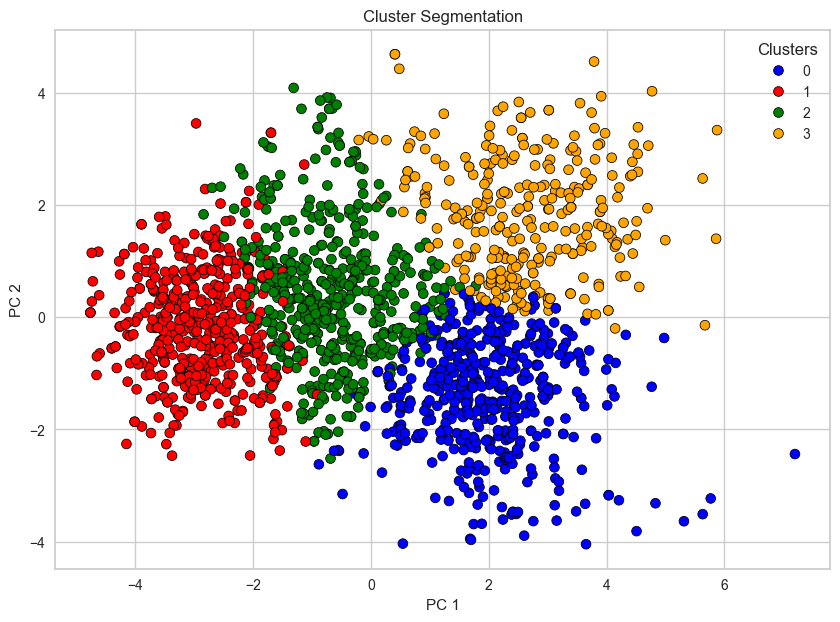

In [413]:
# Segmentation visualization (4 cluster)
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=df_pca, x='PC 1', y='PC 2',
                edgecolor='black',
                hue='Clusters',
                palette=['blue','red','green','orange'])
plt.title('Cluster Segmentation')

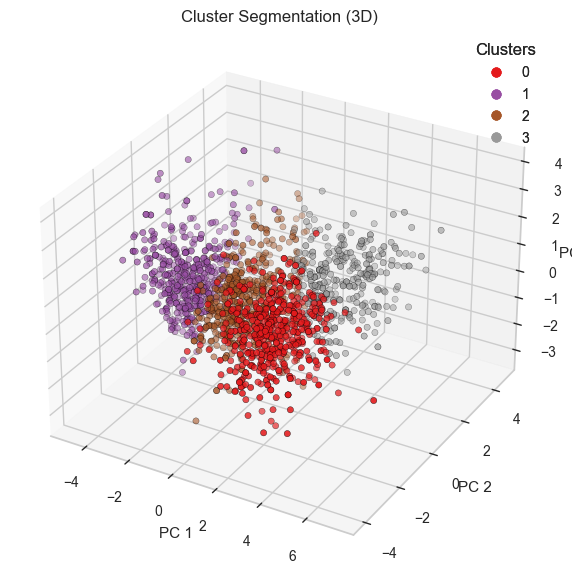

In [414]:
# Experiment with 3D visualization (hard to see the segmentation better use 2D)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the 3D scatter plot
scatter = ax.scatter(
    df_pca['PC 1'], 
    df_pca['PC 2'], 
    df_pca['PC 3'], 
    c=df_pca['Clusters'], 
    edgecolor='black', 
    cmap=plt.get_cmap('Set1')
)

# Adding color legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Adding plot labels
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('Cluster Segmentation (3D)')

plt.show()

# **Task 4 : Customer Personality Analysis For Marketing Retargeting**

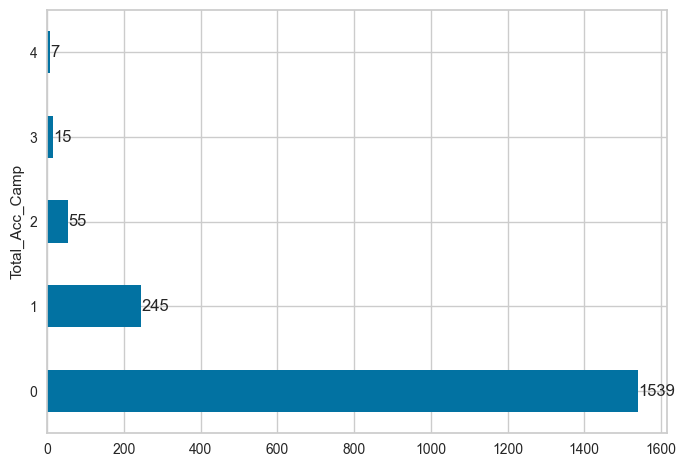

In [415]:
# Re-check campaign distribution
ax = df_filtered_outliers['Total_Acc_Camp'].value_counts().plot(kind='barh')

# Add labels to each bar
for bar_position, bar_value in enumerate(df_filtered_outliers['Total_Acc_Camp'].value_counts()):
    ax.text(bar_value + 0.5, bar_position, str(bar_value), va='center')

> As we already know, the current situation is that most of the customer are unresponsive to the previous campaigns since every single campaign were just blasted out to every single customer without tailor for specific customer, which is why in this project by understanding the our customer personality and spending behaviour on our products we can strategize better for future campaigns.

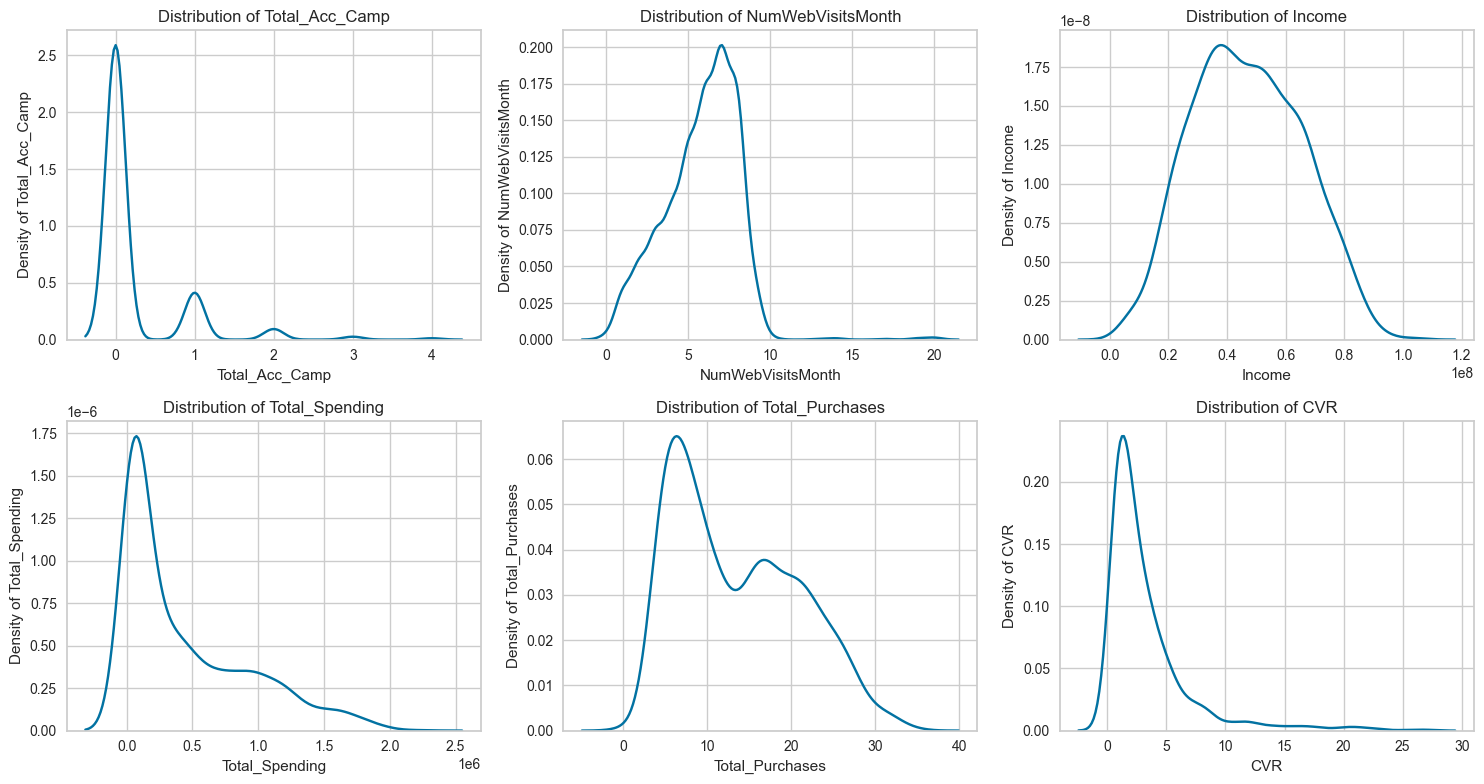

In [416]:
# Re-check the distribution of columns to choose better representative statistic for cluster analysis
summary_feature_exc_cluster = ['Total_Acc_Camp', 'NumWebVisitsMonth', 'Income', 'Total_Spending', 'Total_Purchases', 'CVR']
summary_feature = ['Total_Acc_Camp', 'NumWebVisitsMonth', 'Income', 'Total_Spending', 'Total_Purchases', 'CVR', 'Clusters']

plot_dynamic_hisplots_kdeplots(df=df_filtered_outliers, col_series=summary_feature_exc_cluster, plot_type='kdeplot', ncols=3, figsize=(15, 8))

> - We can use additional columns but in this analysis I think we should just focus on 5-6 main features for comparison, especially those that are highly relevant to the customer behavior and spending patterns we are trying to capture. Adding more could just make us more confused in reaching the conclusions since we have to connect all of the features values.

> - Also the feature used are chosen based on the final result of experiment with other features to detect whether there are significant differences or not for each cluster (ex : `Age` and `Recency` column are not included because there are almost no difference in each cluster)

In [417]:
# See original dataframe grouped with cluster and aggregated by sum, mean and median based on the context of each feature
agg_funcs = {
    'Total_Acc_Camp': 'sum',
    'NumWebVisitsMonth': 'sum',
    'Income': 'mean',
    'Total_Purchases': 'mean', # there is not much difference between the mean and the median so i think we will just use the mean later
    'Total_Spending': ['mean', 'median'],
    'CVR': ['mean', 'median', 'count']
}

result = round(df_filtered_outliers[summary_feature].groupby('Clusters').agg(agg_funcs), 2)
result.columns = ['_'.join(col).strip() for col in result.columns.values]

# Rename the count column for clarity
result.rename(columns={'CVR_count' : 'Cluster Count'}, inplace=True)

# Calculate percentage of total for each cluster count
result['Cluster Percentage'] = round((result['Cluster Count'] / result['Cluster Count'].sum()) * 100, 2)

# Display the result
display(result)

Total_Acc_Camp_sum  NumWebVisitsMonth_sum  Income_mean  \
Clusters                                                           
0                         39                   3528  27973144.10   
1                        234                   1981  68380602.77   
2                        115                   3331  49589041.67   
3                         40                   1942  39399283.87   

          Total_Purchases_mean  Total_Spending_mean  Total_Spending_median  \
Clusters                                                                     
0                         7.11             70268.86                57000.0   
1                        21.24           1046559.29              1000000.0   
2                        16.20            436130.68               366000.0   
3                         7.33             78287.10                45500.0   

          CVR_mean  CVR_median  Cluster Count  Cluster Percentage  
Clusters                                                           
0             1.12         1.0            517               27.78  
1             7.27         5.5            506               27.19  
2             2.77         2.5            528               28.37  
3             1.27         1.0            310               16.66

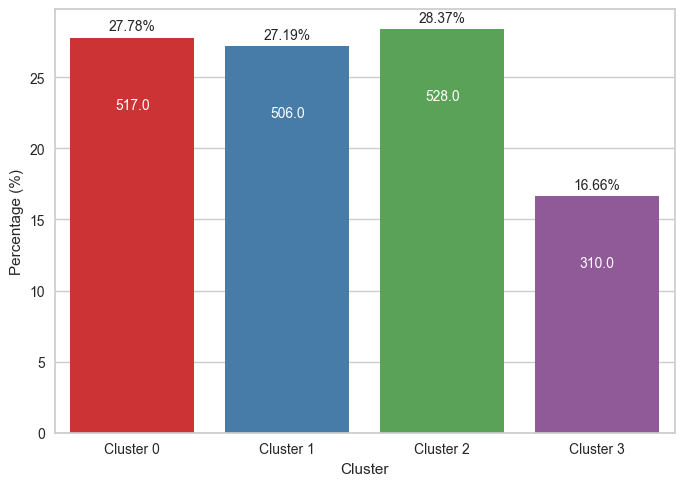

In [418]:
# Another way to visualize count and percentage of each clusters (beside just using table)
df_cluster_interpret = df_filtered_outliers[summary_feature]
cluster_amount = df_cluster_interpret['Clusters'].value_counts().reset_index()
cluster_amount.columns = ['Cluster', 'Count']
cluster_amount['Percentage (%)'] = round((cluster_amount['Count']/len(df_cluster_interpret))*100, 2)
cluster_amount = cluster_amount.sort_values(by=['Cluster']).reset_index(drop=True)
cluster_amount

ax = sns.barplot(data = cluster_amount, y='Percentage (%)', x='Cluster', palette='Set1')

# Add annotations to each bar for percentage
for bar_position, bar_value in enumerate(cluster_amount['Percentage (%)']):
    ax.text(bar_position, bar_value + 0.5, f'{bar_value}%', ha='center', fontsize=10)

# Add annotations to each bar for count
for bar_position, bar_value in cluster_amount.iterrows():
    ax.text(bar_position, bar_value['Percentage (%)'] - 5, f'{bar_value["Count"]}', ha='center', fontsize=10, color='white')

plt.xticks([0, 1, 2, 3], ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

In [419]:
# (Optional) Save the cluster summary statistics
result.to_excel("cluster_summary_statistics.xlsx")

In [420]:
# Create analysis function for cluster focusing visualization
def create_comprehensive_cluster_analysis(df, summary_features, cluster_col='Clusters'):
    """
    Create comprehensive cluster analysis with both normalized and original scale visualizations
    Parameters:
    -----------
    df : pandas DataFrame
        Input DataFrame containing the cluster data
    summary_features : list
        List of features to analyze
    cluster_col : str, default='Clusters'
        Name of the column containing cluster labels
    
    Returns:
    --------
    result : pandas DataFrame
        Original scale aggregated metrics
    normalized_data : pandas DataFrame
        Normalized scale aggregated metrics
    """
    # 1. Calculate aggregations for heatmap 
    agg_funcs = {
        'Total_Acc_Camp': 'sum',
        'NumWebVisitsMonth': 'sum',
        'Income': 'mean',
        'Total_Purchases': 'mean',
        'Total_Spending': ['mean', 'median'],
        'CVR': ['mean', 'median']
    }
    
    result = df[summary_features].groupby(cluster_col).agg(agg_funcs)
    result.columns = ['_'.join(col).strip() for col in result.columns.values]
    
    # 2. Create normalized version of data for heatmap and radar chart
    scaler = MinMaxScaler()
    normalized_data = pd.DataFrame(
        scaler.fit_transform(result),
        columns=result.columns,
        index=result.index
    )
    
    # Define consistent colors matching the original cluster colors
    cluster_colors = ['blue', 'red', 'green', 'orange']
    
    # 3. Create normalized heatmap
    plt.figure(figsize=(13, 6))
    sns.heatmap(normalized_data, 
                annot=normalized_data.round(2),
                fmt='.2f',
                cmap='YlOrRd', # 'RdYlBu_r' if want change to for blue-red colormap but using 'YlOrRd' better
                center=0.5,
                cbar_kws={'label': 'Normalized Values'})
    plt.title('Cluster Characteristics Heatmap (Normalized)')
    plt.ylabel('Cluster')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # 4. Create normalized radar charts for both mean and median (can only select 1 metric for the each visualization)
    radar_metrics = {
        'Total_Acc_Camp': ['mean', 'median'],
        'NumWebVisitsMonth': ['mean', 'median'],
        'Income': ['mean', 'median'],
        'Total_Purchases': ['mean', 'median'],
        'Total_Spending': ['mean', 'median'],
        'CVR': ['mean', 'median']
    }

    # Calculate both mean and median
    radar_data = df[list(radar_metrics.keys()) + [cluster_col]].groupby(cluster_col).agg(radar_metrics)
    radar_data.columns = ['_'.join(col).strip() for col in radar_data.columns.values]

    # Separate mean and median metrics
    mean_cols = [col for col in radar_data.columns if 'mean' in col]
    median_cols = [col for col in radar_data.columns if 'median' in col]

    # Create normalized versions for both
    mean_normalized = pd.DataFrame(
        scaler.fit_transform(radar_data[mean_cols]),
        columns=[col.replace('_mean', '') for col in mean_cols],
        index=radar_data.index
    )

    median_normalized = pd.DataFrame(
        scaler.fit_transform(radar_data[median_cols]),
        columns=[col.replace('_median', '') for col in median_cols],
        index=radar_data.index
    )

    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(projection='polar'))

    # Function to create radar chart
    def plot_radar(data, ax, title):
        labels = data.columns
        num_vars = len(labels)
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
        angles += angles[:1]  # Complete the circle
        
        for idx, cluster in enumerate(data.index):
            values = data.loc[cluster].values.tolist()
            values += values[:1]  # Complete the circle
            ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster}', 
                    color=cluster_colors[idx])
            ax.fill(angles, values, alpha=0.25, color=cluster_colors[idx])
        
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels)
        ax.set_ylim(0, 1)
        ax.set_title(title, pad=18)  # Increase pad value to create more space

    # Plot both radar charts
    plot_radar(mean_normalized, ax1, 'Cluster Characteristics - Mean (Normalized)')
    plot_radar(median_normalized, ax2, 'Cluster Characteristics - Median (Normalized)')

    # Add a single legend for both plots
    plt.legend(bbox_to_anchor=(1.2, 1.0))
    plt.suptitle('Cluster Characteristics Comparison: Mean vs Median', y=1.05)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # This leaves more space at the top
    plt.show()
    
    # 5. Create bar plots with original values
    fig, ax = plt.subplots(2, 4, figsize=(24, 12))
    ax = ax.ravel()
    
    for idx, col in enumerate(result.columns):
        sns.barplot(data=result.reset_index(), 
                   x='Clusters', 
                   y=col, 
                   ax=ax[idx],
                   palette=cluster_colors)
        ax[idx].set_title(f'{col} by Cluster')
        ax[idx].tick_params(axis='x', rotation=0)
        
        # Add value labels on top of bars
        for bar_position, bar_value in enumerate(result[col]):
            ax[idx].text(bar_position, bar_value, f'{bar_value:.2f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # 6. Create boxplots with original values
    fig, ax = plt.subplots(2, 3, figsize=(18, 12))
    ax = ax.ravel()
    
    for idx, feature in enumerate(summary_features[:-1]):  # Excluding Clusters column
        # # Convert Clusters to string type to ensure proper categorical mapping
        df_plot = df.copy()
        df_plot[cluster_col] = df_plot[cluster_col].astype(str)
        
        # Ensure the cluster column is treated as categorical with proper order
        df_plot[cluster_col] = pd.Categorical(df_plot[cluster_col], 
                                            categories=['0', '1', '2', '3'],
                                            ordered=True)
        
        sns.boxenplot(data=df_plot, 
                     x='Clusters',
                     y=feature,
                     ax=ax[idx],
                     palette=cluster_colors)
        
        ax[idx].set_title(f'{feature} Distribution by Cluster')
        ax[idx].tick_params(axis='x', rotation=0)
        ax[idx].set_xlabel('Cluster')
    
    plt.tight_layout()
    plt.show()
    
    return result, normalized_data

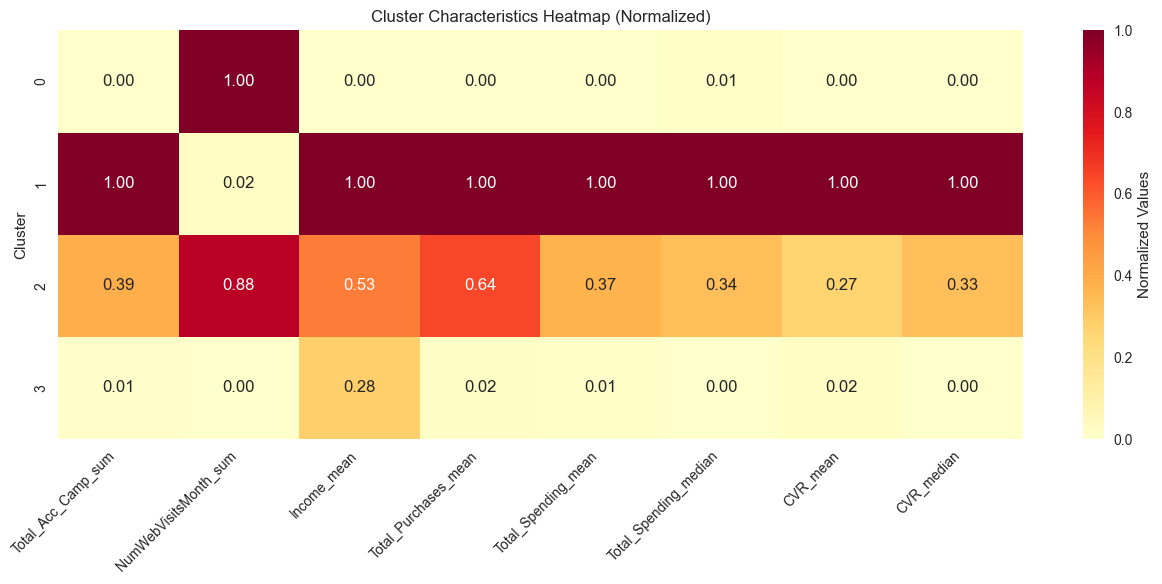

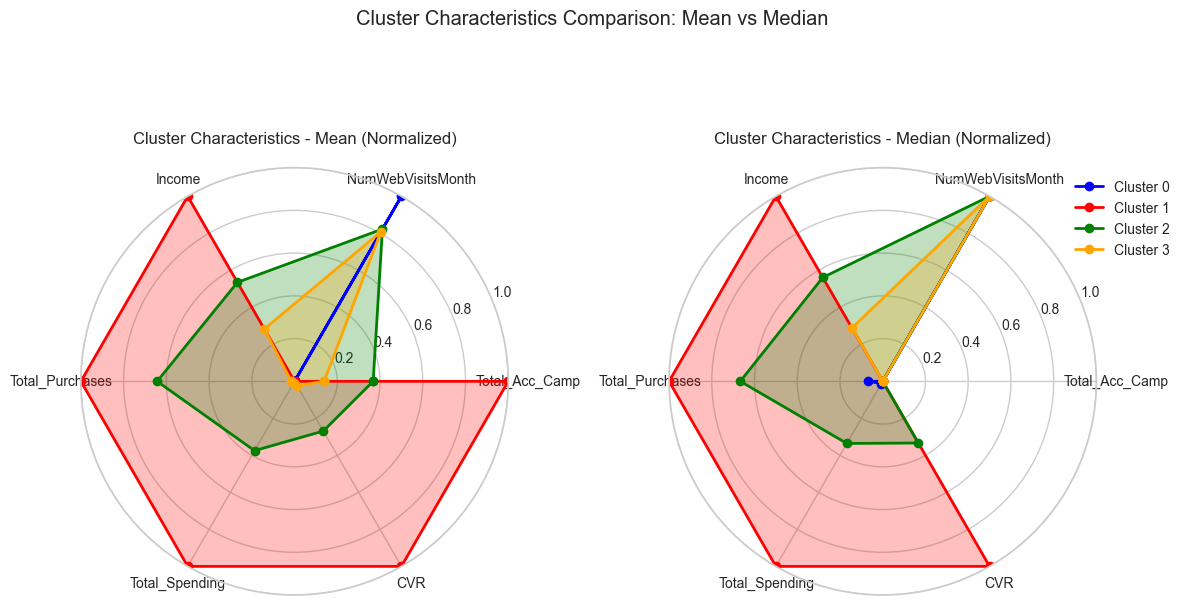

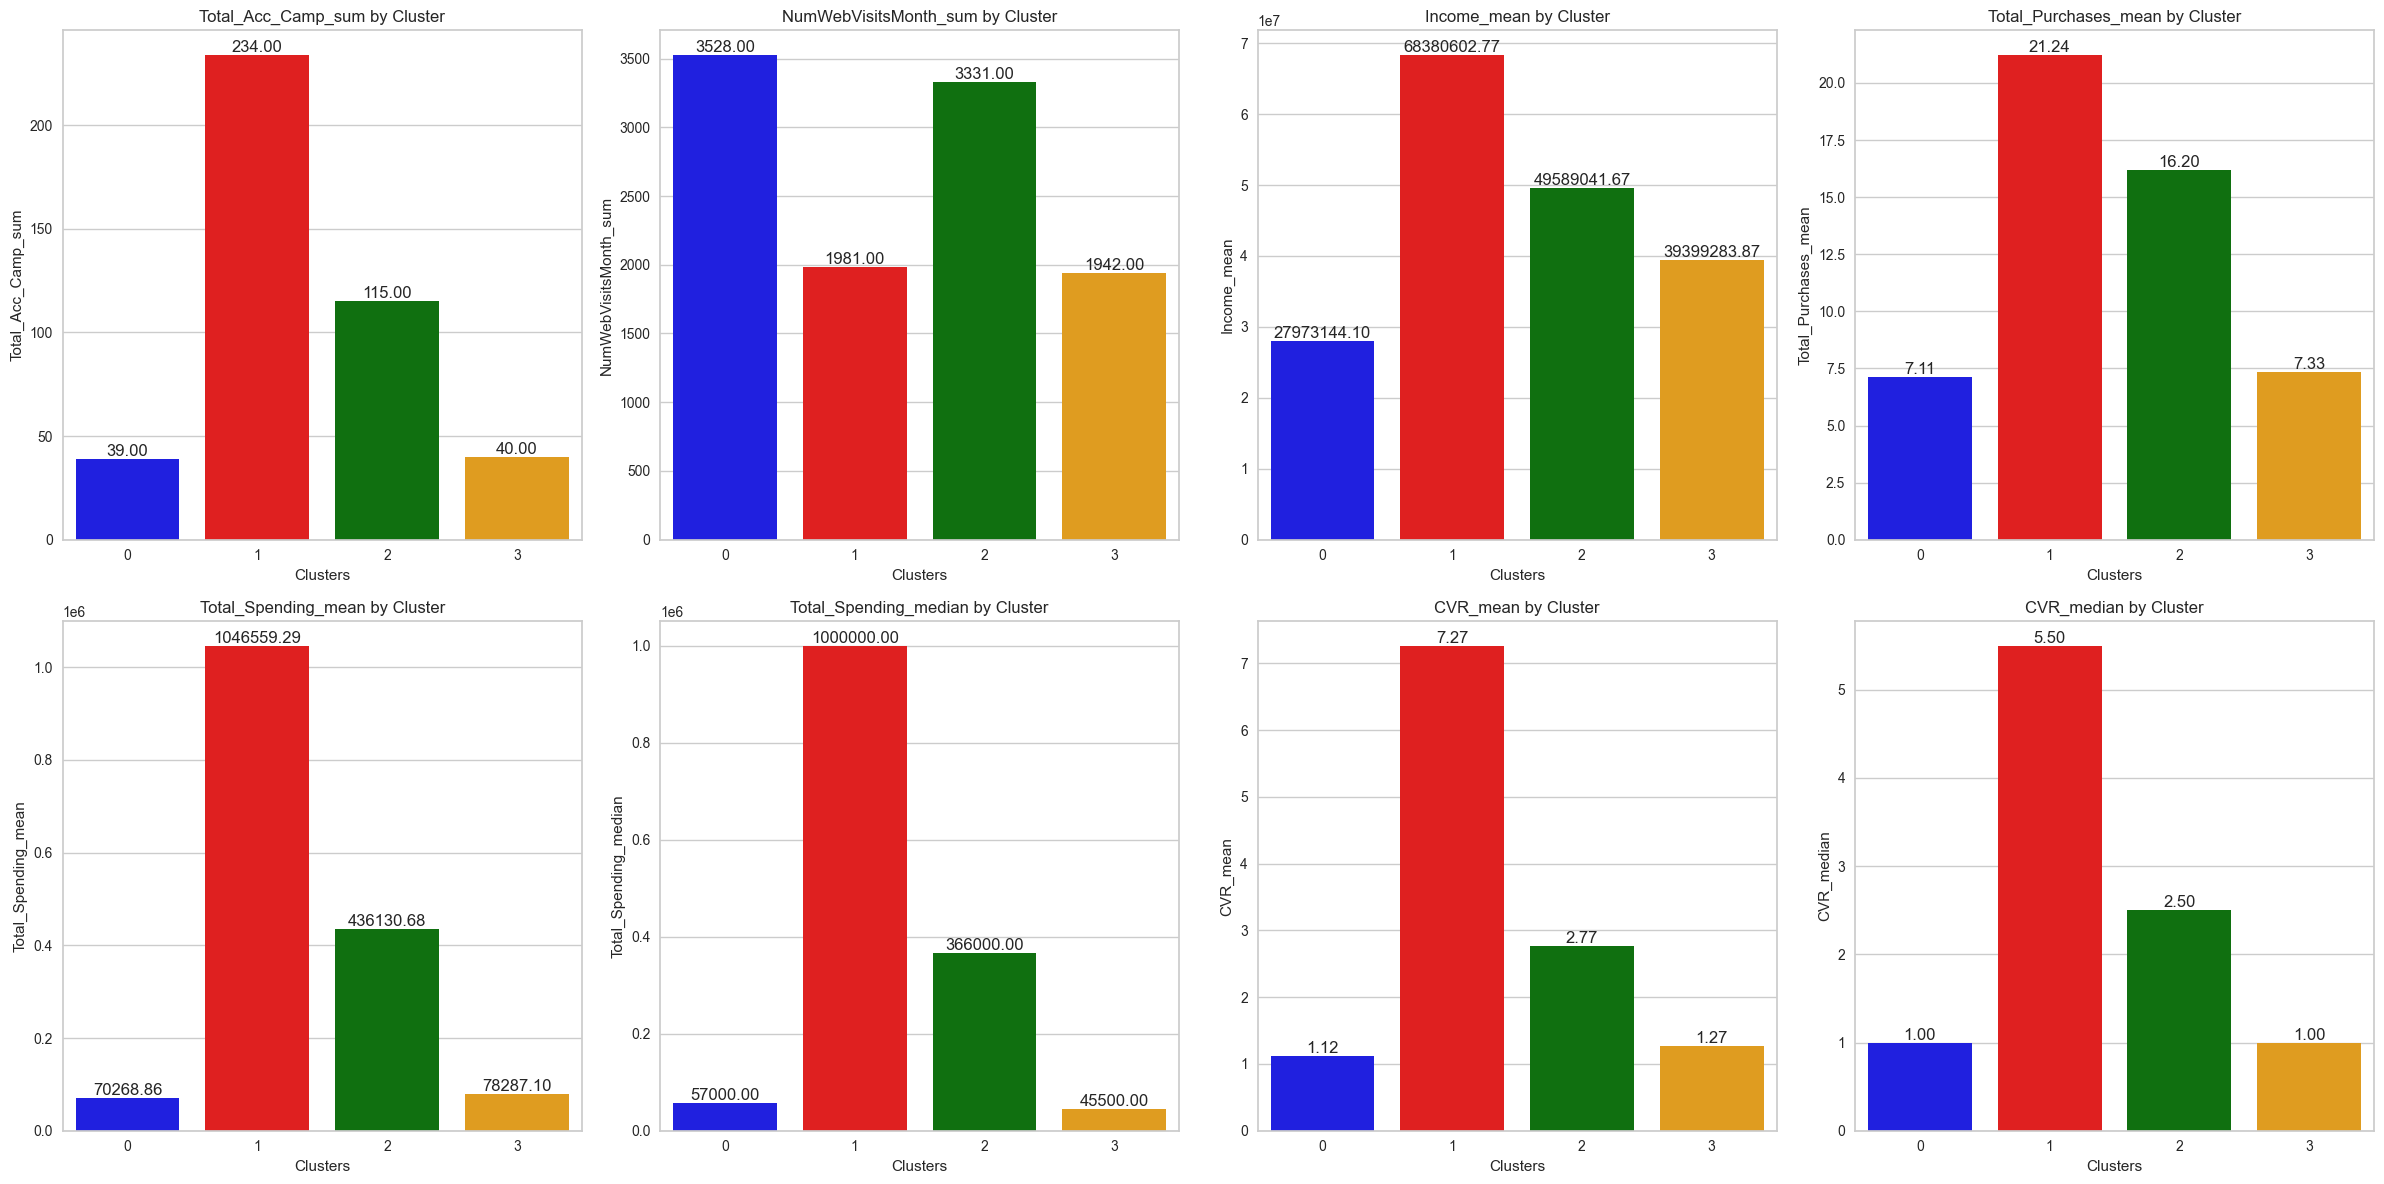

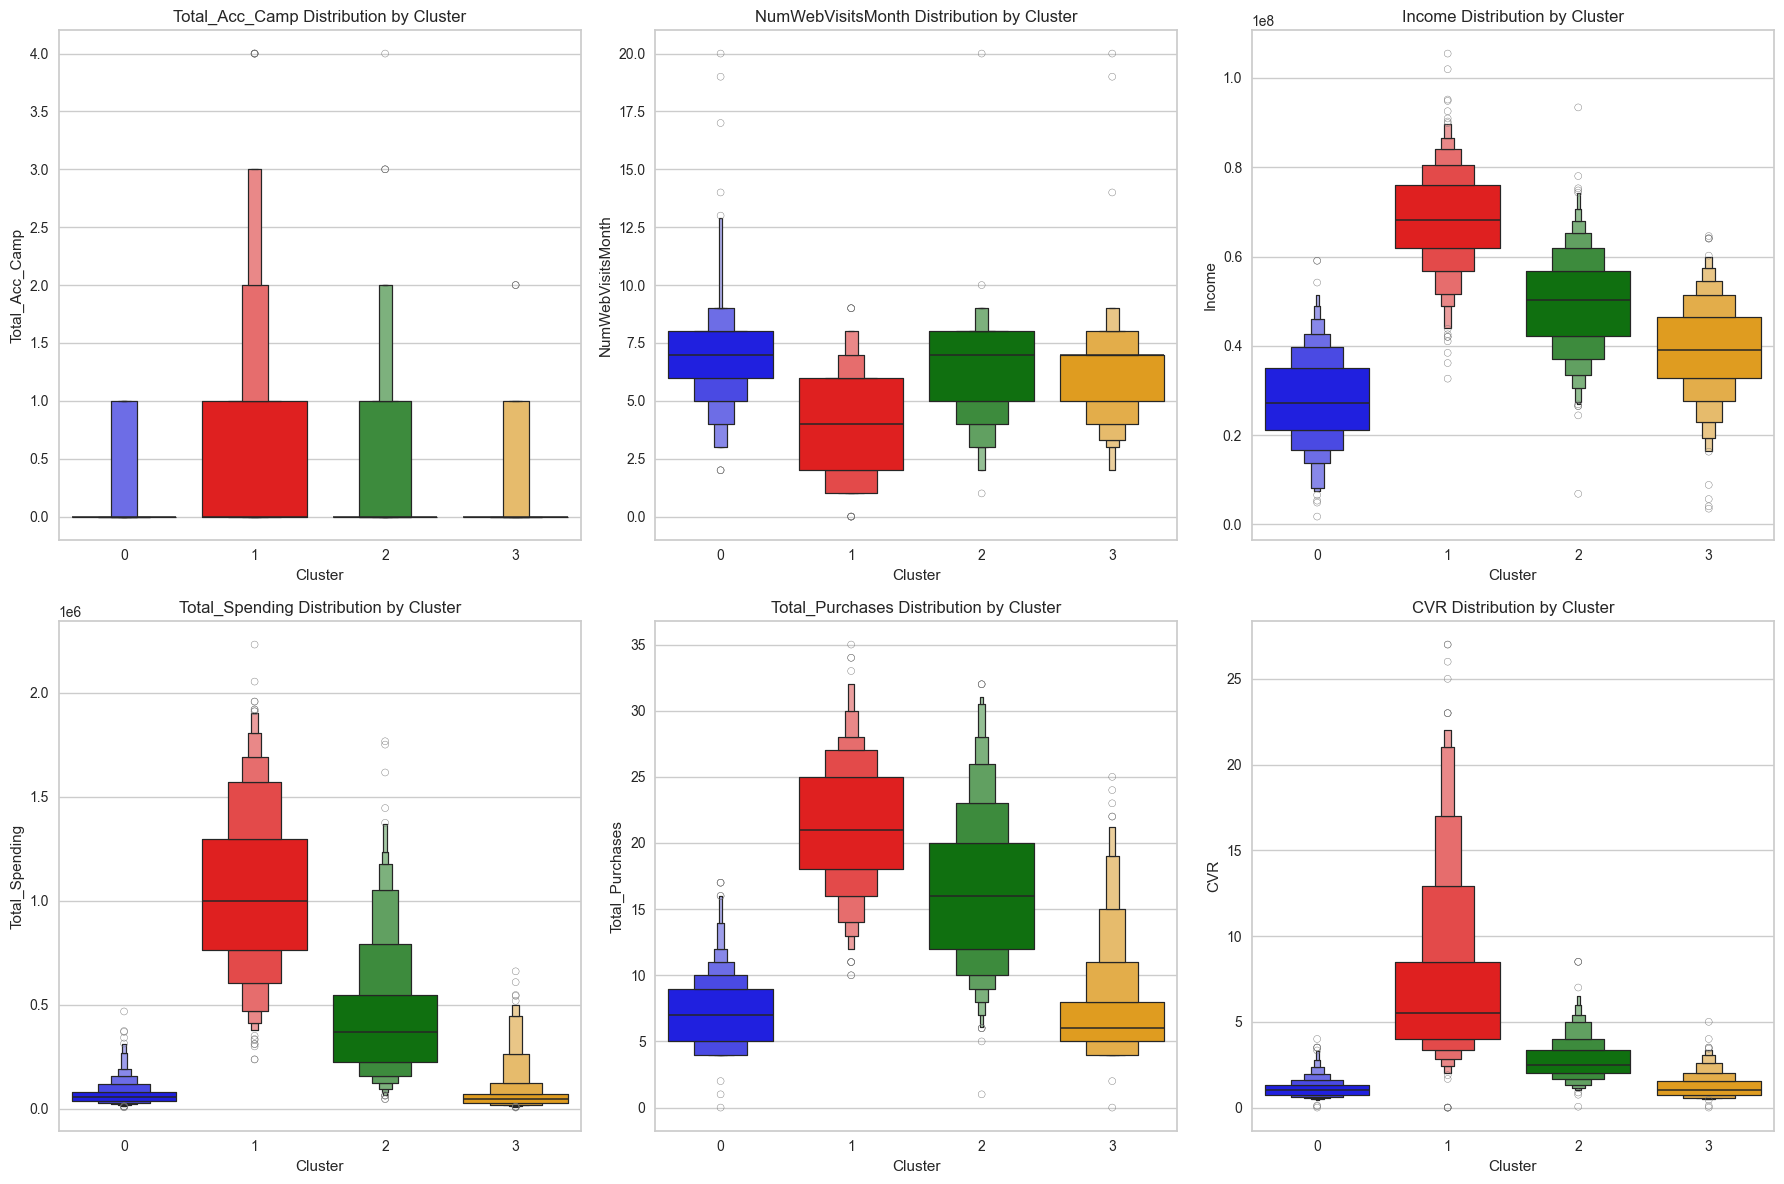

In [421]:
# Cluster analysis based on visualization implementation
result, normalized_data = create_comprehensive_cluster_analysis(df_filtered_outliers, summary_feature)

## Cluster Interpretation

Based on the summary statistics, the customer segmentation can be interpreted like this:

- **Cluster 0 (27.78% of customers):**
    - Low campaign acceptance (39 responses)
    - Highest web visits (3,528 per month)
    - Low income (Rp. 27,973,144 annually)
    - Low purchasing frequency (7.11 purchases on average)
    - Low spending (mean Rp. 70,268.86)
    - Low CVR (1.12 mean, 1.0 median)

- **Cluster 1 (27.19% of customers):**
    - Highest campaign acceptance (234 responses)
    - Lowest web visits (1,981 per month)
    - Highest income (Rp. 68,360,602 annually)
    - Highest purchasing frequency (21.24 purchases on average)
    - Highest spending (mean Rp. 1,046,559.29)
    - Highest CVR (7.27 mean, 5.5 median)

- **Cluster 2 (28.37% of customers):**
    - Moderate campaign acceptance (115 responses)
    - High web visits (3,331 per month)
    - High income (Rp. 49,589,041 annually)
    - High purchasing frequency (16.2 purchases on average)
    - Moderate spending (mean Rp. 436,130.68)
    - Moderate CVR (2.77 mean, 2.5 median)

- **Cluster 3 (16.66% of customers):**
    - Low campaign acceptance (40 responses)
    - Low web visits (1,942 per month)
    - Low-moderate income (Rp. 39,399,283 annually)
    - Low purchasing frequency (7.33 purchases on average)
    - Low spending (mean Rp. 78,287.1)
    - Low CVR (1.27 mean, 1.0 median)

Based on these revised characteristics, more appropriate labels would be:

- **Cluster 0: High-Browse Low-Convert Customers** (27.78%)
- **Cluster 1: Premium Engaged Customers** (27.19%)
- **Cluster 2: Mid-Tier Active Customers** (28.37%)
- **Cluster 3: Low-Engagement Customers** (16.66%)


**Major Findings :**

- **Cluster 0 (High-Browse Low-Convert)** represents a significant portion (27.78%) of customers who show the highest website visit distribution but minimal campaign engagement. Despite their active browsing behavior, they demonstrate consistently low distributions in campaign acceptance, spending, and CVR (around 1-2%). Their income distribution is among the lowest, which may explain their limited purchasing power. This presents a clear opportunity for the company to better understand why these frequent browsers rarely convert and develop strategies to capture this substantial segment's potential.

- **Cluster 1 (Premium Engaged Customers)** emerges as the highest-value segment (27.19%) with exceptional performance metrics. The boxplots reveal this cluster has the highest distributions in campaign acceptance, income levels, total spending, and CVR (ranging from 5-15% with outliers reaching above 20%). Interestingly, despite having the lowest web visit frequency, their strong engagement with campaigns and high conversion rates make them the most valuable customer segment. This suggests highly effective campaign targeting and relevance for this high-income group, indicating potential for even greater returns through personalized premium offerings.

- **Cluster 2 (Mid-Tier Active Customers)** shows promising balanced behavior across metrics (28.37% of customers). The boxplots indicate high web visit distributions, moderate campaign acceptance, and steady CVR (around 2-3%). Their income distribution sits comfortably in the middle range, resulting in consistent purchase frequency and spending patterns, though not as high as Cluster 1. As the largest segment, this group presents a significant opportunity for upward migration through targeted engagement strategies.

- **Cluster 3 (Low-Engagement Customers)** is the smallest segment (16.66%) showing consistently low performance across all metrics. The boxplots demonstrate low distributions in web visits, campaign acceptance, and CVR (similar to Cluster 0), despite having a slightly higher income distribution than Cluster 0. Their limited engagement across all touchpoints suggests a need for re-engagement strategies or potential evaluation of their fit with the company's target market.

These major findings suggest the following strategic priorities that will be described in detail in the next section:
- Develop targeted conversion strategies for Cluster 0's high-browsing audience
- Maintain and enhance the successful premium engagement model for Cluster 1
- Create upgrade paths and targeted campaigns to elevate Cluster 2's spending levels
- Evaluate the cost-effectiveness of maintaining Cluster 3 or develop specific re-engagement strategies for this segment

## Business Recommendation

Based on the characteristics that we have explored for each cluster, specific business recommendations for each cluster are:

**Cluster 0: High-Browse Low-Convert (27.78%)**
1. **Friction Point Analysis & Resolution**
<br>Given their high website visits but low conversion, conduct detailed user journey analysis to identify and eliminate conversion barriers. This may include implementing A/B testing on landing pages, optimizing the checkout process, and analyzing exit points to understand abandonment reasons.

2. **Value-Based Pricing Strategy**
<br>Develop entry-level product offerings or payment plans that align with their lower income level. Consider introducing tiered pricing, starter packages, or special promotions that make products more accessible while maintaining value perception.

**Cluster 1: Premium Engaged Customers (27.19%)**
1. **Premium Experience Enhancement**
<br>Develop an exclusive shopping experience for this high-value segment. This could include priority customer service, early access to new products, and VIP events, leveraging their high income and strong buying intent.

2. **Advanced Personalization**
<br>Implement sophisticated personalization strategies using their robust purchase history and campaign response data. Create predictive models to anticipate their needs and preferences, enabling proactive product recommendations and tailored campaign messaging.

**Cluster 2: Mid-Tier Active Customers (28.37%)**
1. **Strategic Upgrade Path**
<br>Design a clear pathway to migrate these customers toward premium spending levels. Implement a tiered rewards program that incentivizes increased purchase frequency and spending, with visible benefits at each tier.

2. **Engagement Optimization**
<br>Leverage their moderate campaign responsiveness and high browsing behavior to create more targeted engagement strategies. Use behavioral data to optimize campaign timing and messaging, focusing on their demonstrated interests and purchase patterns.

**Cluster 3: Low-Engagement Customers (16.66%)**
1. **Re-engagement Campaign**
<br>Launch a focused re-engagement program targeting this segment's specific pain points. This could include conducting surveys to understand their low engagement, offering win-back promotions, and creating simplified pathways to purchase.

2. **Customer Journey Evaluation**
<br>Analyze the full customer journey for this segment to identify where and why engagement drops off. Consider implementing triggered communications at key touchpoints and simplified conversion paths to reduce barriers to purchase.

**Cross-Cluster Initiatives:**
1. **Segmented Marketing Automation**
<br>Develop automated marketing workflows tailored to each cluster's characteristics, ensuring messaging and offers align with their browsing patterns, income levels, and historical response rates.

2. **Data-Driven Personalization**
<br>Implement a robust personalization engine that adapts content, pricing, and promotions based on cluster membership and individual behavior patterns, with specific focus on moving customers up the value chain.

These recommendations are now better aligned with the distinct characteristics of each cluster and their relative sizes in the customer base, with particular attention to the high-browse but low-convert nature of Cluster 0 and the premium potential of Cluster 1.

# **Potential Further Project Development**

As for the potential for further development of this project is to use machine learning to predict which customers will accept the next campaign based on the categorization of the number of campaigns that have been accepted before so that companies can reduce marketing costs by targeting marketing only to customers who have a tendency to be interested in company campaigns.